# Projet 2 : Analysez des données de systèmes éducatifs

## Introduction

Le but de ce notebook est de réaliser une Pré-Analyse ayant pour objectifs :<br>
- La validation de la qualité du jeu de données (données manquantes et doublons)<br>
- La description du contenu du jeu de données<br>
- La sélection des informations paraissant pertinentes pour répondre au projet d'expansion à l'international de l'entreprise<br>
- La détermination des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde<br>

Le notebook est organisé de la manière suivante :<br>
- L'analyse fichier par fichier :
    - Pour chaque fichier :
        - Importation et Nettoyage
        - Qualité (Valeurs manquantes & Doublons)
        - Description du contenu
        - Variables pertinentes pour répondre à la problématique
- Le résumé de l'ensemble des fichiers
- Les ordres de grandeurs des indicateurs statistiques (pays & régions)

### Sommaire <a name="0"></a> :
- [A - L'analyse fichier par fichier](#A)
    - [A.1 - EdStatsCountry.csv](#A.1)
    - [A.2 - EdStatsCountry-Series.csv](#A.2)
    - [A.3 - EdStatsData.csv](#A.3)
    - [A.4 - EdStatsFootNote.csv](#A.4)
    - [A.5 - EdStatsSeries.csv](#A.5)
- [B - Synthèse des fichers](#B)
    - [B.1 - Jointures sur "Country Code"](#B.1)
    - [B.2 - Jointures sur "Series Code"/"Indicator Code"](#B.2)
- [C - Présélection des indicateurs](#C)
    - [C.1 - Indicateurs Généraux](#C.1)
    - [C.2 - Indicateurs "Éducation"](#C.2)
- [D - Affinage des indicateurs & sélection des pays](#D)
- [E - Projections](#E)

## Importation des bibliothèques Python

In [1]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

## Contrôle des versions des bibliothèques importées

In [2]:
sns.__version__

'0.11.0'

In [3]:
pd.__version__

'1.1.3'

In [4]:
msno.__version__

'0.4.2'

In [5]:
np.__version__

'1.19.2'

## Importation des fichiers .csv

In [6]:
dataCountry = pd.read_csv("Data/EdStatsCountry.csv")
dataCS = pd.read_csv("Data/EdStatsCountry-Series.csv") 
data = pd.read_csv("Data/EdStatsData.csv")
dataFN = pd.read_csv("Data/EdStatsFootNote.csv")
dataSeries = pd.read_csv("Data/EdStatsSeries.csv")

##  A - L'analyse fichier par fichier  <a name="A"></a>
### A.1 - EdStatsCountry.csv  <a name="A.1"></a>
#### Observation du fichier importé & Nettoyage

In [7]:
dataCountry

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,2008,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,NaN,NaN,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,2007,NaN,Value added at producer prices (VAP),IDA,NaN,Country uses the 1993 System of National Accou...,1990–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2

On remarque la présence d'une colonne "Unnamed: 31" qui ne contient que des *NaN* de plus cette colonne n'existe pas quand on ouvre le fichier .csv via un éditeur de texte. Cette colonne à été rajoutée lors de l'importation nous allons donc la supprimer.

In [8]:
del dataCountry['Unnamed: 31']

#### Recherche de doublons

In [9]:
dataCountry.shape #Affichage de la taille du fichier (nb_lignes, nb_colonnes)

(241, 31)

Le fichier brut contient 241 lignes, individus, et 31 colonnes, variables.
Pour vérifier la présence de doublons nous allons alors supprimer les doublons puis recalculer la taille du fichier pour voir si des lignes ont été supprimées :

In [10]:
dataCountry.drop_duplicates(keep = 'first', inplace =True)
dataCountry.shape

(241, 31)

On remarques que la taille du fichier est la même, le fichier ne présente donc pas de doublons.
#### Présence de données manquantes 
Pour rendre compte de la présence de données manquantes nous allons construire un tableau récapitulatif qui contiendra :
- en ligne : les variables du fichier
- en colonne : 
    - le nombre total de données manquantes 
    - le % d'individus présentant des données manquantes

In [11]:
countryEffNul = dataCountry.isnull().sum() #Le tableau du nombre total de données manquantes par variables

countryTabNul = pd.DataFrame(countryEffNul, columns=["Nb Null"]) #création du dataframe en reprenant le tableau précédement crée
countryTabNul["% Null"] = countryTabNul["Nb Null"]/len(dataCountry)*100 #ajout d'une colonne qui calcul le % de données manquantes
countryTabNul.sort_values(by = 'Nb Null', ascending = False) #classement décroissant du dataframe suivant le nombre de données manquantes

,Nb Null,% Null
National accounts reference year,209,86.721992
Alternative conversion factor,194,80.497925
Other groups,183,75.933610
Latest industrial data,134,55.601660
Vital registration complete,130,53.941909
External debt Reporting status,117,48.547718
Latest household survey,100,41.493776
Latest agricultural census,99,41.078838
Lending category,97,40.248963
Special Notes,96,39.834025


On remarque ici la présence non-négligeable de données manquantes dans ce fichier : au minimum 26 soit 10,78% des données pour "Currency Unit" & "System of National Accounts" et jusqu'à 209 soit 86,72% pour "National accounts reference year"
Seul les variables d'identification des pays sont complètes à l'exception de "WB-2 code" et "2-alpha code" pour lesquels il manque respectivement 1 et 3 informations, qui plus est ces informations sont facultatives dans notre cas car on va pouvoir identifier le pays avec le "Country Code".<br>
##### Visualisation des données manquantes
Matrice :

<AxesSubplot:>

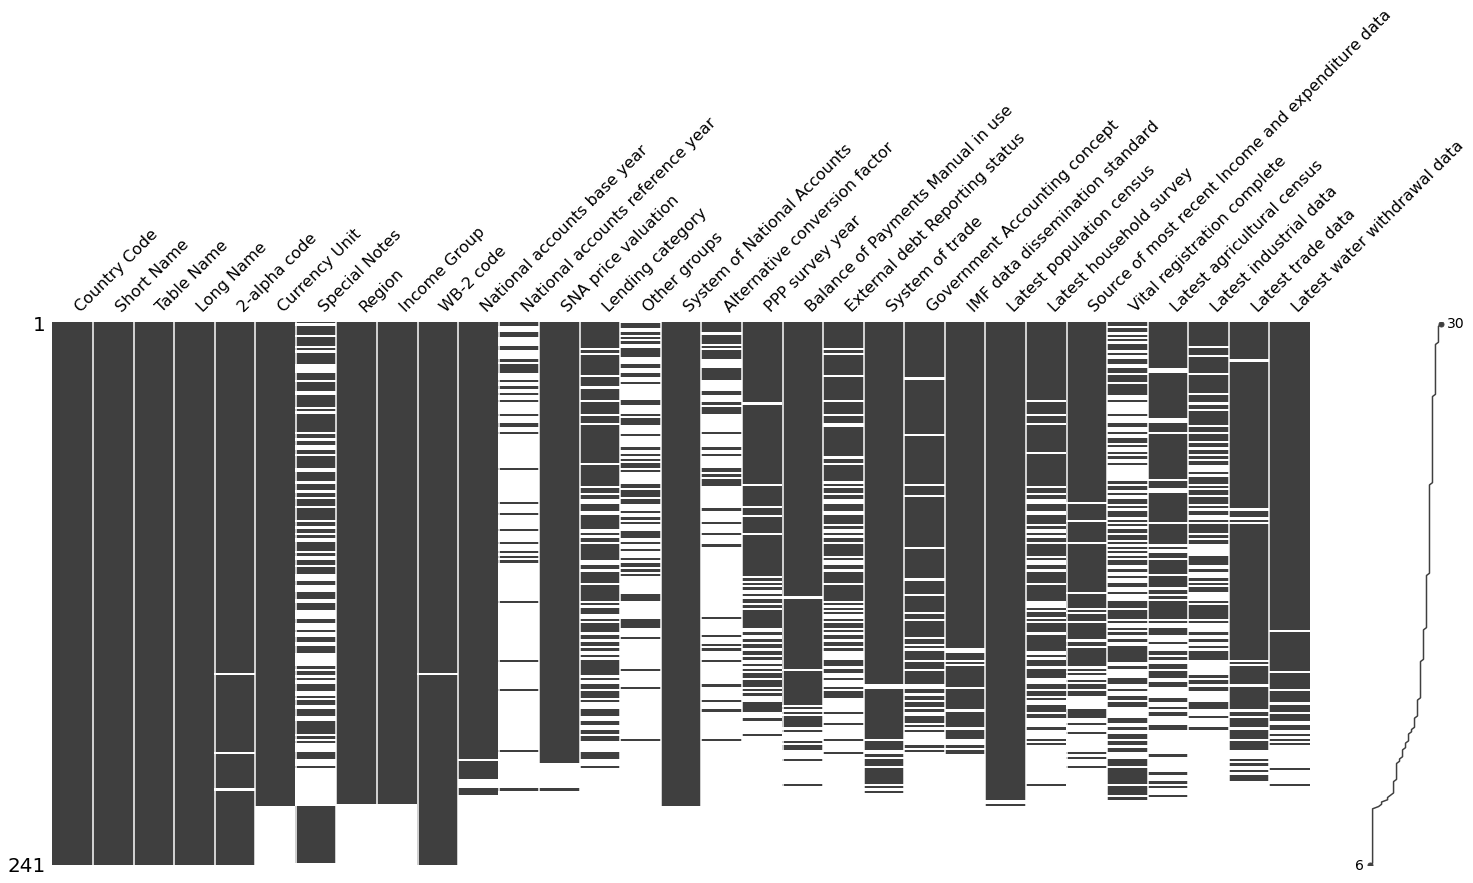

In [12]:
sorted_dataCountry = msno.nullity_sort(dataCountry, sort = 'descending') #on classe les données de dataCountry des lignes les plus complètes au moins complètes
msno.matrix(sorted_dataCountry)

Diagramme en barre :

<AxesSubplot:>

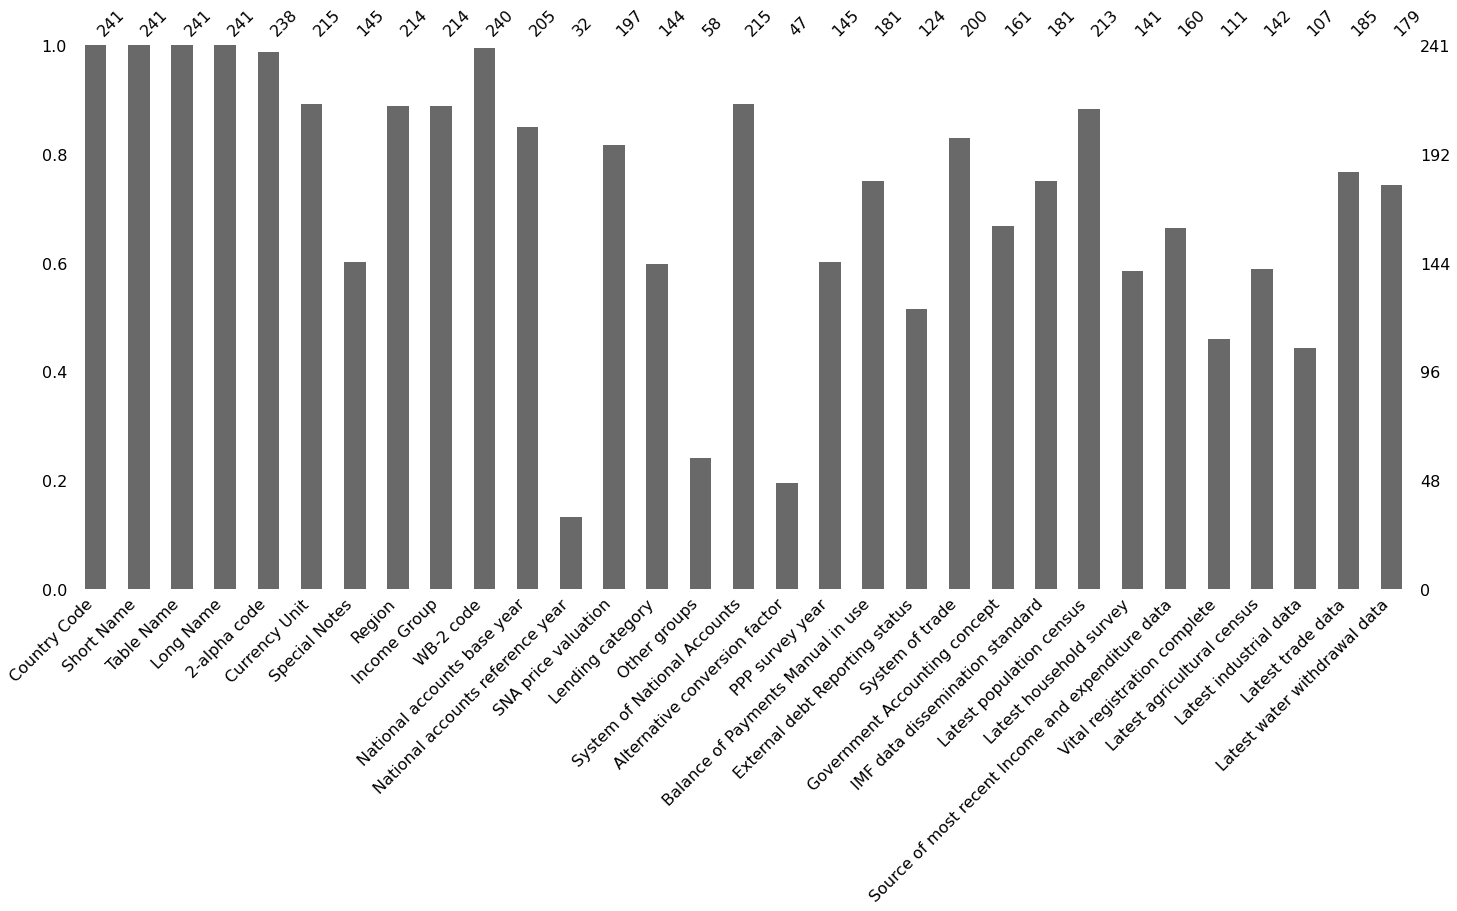

In [13]:
msno.bar(dataCountry)

#### Description du contenu du fichier
Comme nous avons pu le voir dans l'importation, le fichier contient 241 individus et 31 variables.
Les variables observées sont les suivantes :

In [14]:
dataCountry.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')

In [197]:
pd.concat([dataCountry.describe(include='all'), dataCountry.dtypes.to_frame(name='type').T])

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
count,241,241,241,241,238,215,145,214,214,240,205,32,197,144,58,215,47,145,181,124,200,161,181,213,141,160,111,142,107,185,179
unique,241,241,241,241,238,152,131,7,5,240,43,11,2,3,2,3,32,3,1,3,2,2,2,27,60,75,2,35,11,13,20
top,LSO,Belize,Belize,Belize,BD,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,BD,2005,2005,Value added at basic prices (VAB),IBRD,HIPC,Country uses the 1993 System of National Accou...,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,2010,2012,2000
freq,1,1,1,1,1,23,6,57,55,1,34,11,163,67,40,165,8,98,181,107,106,95,110,59,10,15,110,36,42,135,40
type,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object


A première vue, le fichier semble contenir des informations générales sur des pays.<br>
Nous allons donc analyser chaque variable pour en comprendre sa signification.
##### Country Code :
A première vue cette variable semble être une variable *Qualitative nominale*, nous allons donc l'analyser afin de vérifier cette hypothèse. Aussi, ce code à 3 lettres semble être le code *alpha-3* que l'on retrouves dans [la norme ISO 3166-1](https://fr.wikipedia.org/wiki/ISO_3166-1#Table_de_codage) servant comme norme internationale pour l'identification des pays <br>
Regardons le nombre de modalités que cette variable prends :

In [15]:
countryCcEff = dataCountry["Country Code"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryCcModa = countryCcEff.index #on récupères les modalités que prends la variable

tabCountryCc = pd.DataFrame(countryCcModa, columns = ["Country Code"]) #on crée un DataFrame avec toutes les modalités de la variable
tabCountryCc["n"] = countryCcEff.values #On ajoute une colonne au DataFrame contenant le nombre d'occurence de la modalité
tabCountryCc["f"] = tabCountryCc["n"]/len(countryCcEff) #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryCc

,Country Code,n,f
0,LSO,1,0.004149
1,TJK,1,0.004149
2,PHL,1,0.004149
3,GNQ,1,0.004149
4,MNE,1,0.004149
...,...,...,...
236,UKR,1,0.004149
237,LMC,1,0.004149
238,JAM,1,0.004149
239,XKX,1,0.004149


On remarque donc que cette variable présente 241 modalités, soit le même nombre de lignes que le fichier initial. "Country Code" est donc bien une variable *Qualitative nominale* avec 241 modalités, qui renvoie à un code d'identification des pays.
##### Short Name :
A première vue cette variable semble être une variable *Qualitative nominale*, nous allons donc l'analyser afin de vérifier cette hypothèse. <br>
Regardons le nombre de modalités que cette variable prends :

In [16]:
countrySnEff = dataCountry["Short Name"].value_counts() #on comptes le nombre de valeurs dans la colonne
countrySnModa = countrySnEff.index #on récupères les modalités que prends la variable

tabCountrySn = pd.DataFrame(countrySnModa, columns = ["Short Name"]) #on crée un DataFrame avec toutes les modalités de la variable
tabCountrySn["n"] = countrySnEff.values #On ajoute une colonne au DataFrame contenant le nombre d'occurence de la modalité
tabCountrySn["f"] = tabCountrySn["n"]/len(countrySnEff) #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountrySn

,Short Name,n,f
0,Belize,1,0.004149
1,Kiribati,1,0.004149
2,Yemen,1,0.004149
3,French Polynesia,1,0.004149
4,Middle East & North Africa (developing only),1,0.004149
...,...,...,...
236,Equatorial Guinea,1,0.004149
237,Lebanon,1,0.004149
238,Switzerland,1,0.004149
239,East Asia & Pacific (developing only),1,0.004149


On remarque donc que cette variable présente 241 modalités, soit le même nombre de lignes que le fichier initial. "Short Name" est donc bien une variable *Qualitative nominale* avec 241 modalités. Il y a donc autant de modalités que pour la variable "Country Code", "Short Name" semble donc être le nom, court, de 241 pays
##### Table Name :
A première vue cette variable semble être une variable *Qualitative nominale*, nous allons donc l'analyser afin de vérifier cette hypothèse. <br>
Regardons le nombre de modalités que cette variable prends :

In [17]:
countryTnEff = dataCountry["Table Name"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryTnModa = countryTnEff.index #on récupères les modalités que prends la variable

tabCountryTn = pd.DataFrame(countryTnModa, columns = ["Table Name"]) #on crée un DataFrame avec toutes les modalités de la variable
tabCountryTn["n"] = countryTnEff.values #On ajoute une colonne au DataFrame contenant le nombre d'occurence de la modalité
tabCountryTn["f"] = tabCountryTn["n"]/len(countryTnEff) #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryTn

,Table Name,n,f
0,Belize,1,0.004149
1,Kiribati,1,0.004149
2,Zambia,1,0.004149
3,French Polynesia,1,0.004149
4,Palau,1,0.004149
...,...,...,...
236,Switzerland,1,0.004149
237,Haiti,1,0.004149
238,Gabon,1,0.004149
239,"Micronesia, Fed. Sts.",1,0.004149


On remarque donc que cette variable présente 241 modalités. Il y a donc autant de modalités que pour la variable "Country Code" et "Short Name". A première vue on ne voit pas de différences avec la variable "Short Name", on va donc chercher à voir les différences,s'il y en a, entre "Table Name" et "Short Name" :

In [18]:
TabCompSnTn = pd.DataFrame(dataCountry["Short Name"])#On créer un DataFrame à partir de la colonne "Short Name"
TabCompSnTn["Table Name"] = dataCountry["Table Name"] #on rajoute la colonne "Table Name" au DataFrame
TabCompSnTn["Compare"] = dataCountry["Short Name"].eq(dataCountry["Table Name"]) #on rajoute une colonne qui est le résultat de la comparaison entre les 2 colonnes précédentes

TabCompSnTn[TabCompSnTn["Compare"]==False] #on filtre le DataFrame pour afficher uniquement les lignes ou le résultat de la comparaison est "False"

,Short Name,Table Name,Compare
21,The Bahamas,"Bahamas, The",False
29,Brunei,Brunei Darussalam,False
40,Dem. Rep. Congo,"Congo, Dem. Rep.",False
41,Congo,"Congo, Rep.",False
57,East Asia & Pacific (developing only),East Asia & Pacific,False
59,Europe & Central Asia (developing only),Europe & Central Asia,False
62,Egypt,"Egypt, Arab Rep.",False
73,Micronesia,"Micronesia, Fed. Sts.",False
80,The Gambia,"Gambia, The",False
100,Iran,"Iran, Islamic Rep.",False


In [19]:
len(TabCompSnTn[TabCompSnTn["Compare"]==False])

20

Il en ressort que 20 pays n'ont pas le même "Short Name" et "Table Name".
##### Long Name :
A première vue cette variable semble être une variable *Qualitative nominale*, nous allons donc l'analyser afin de vérifier cette hypothèse. <br>
Regardons le nombre de modalités que cette variable prends :

In [20]:
countryLnEff = dataCountry["Long Name"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryLnModa = countryLnEff.index #on récupères les modalités que prends la variable

tabCountryLn = pd.DataFrame(countryLnModa, columns = ["Long Name"]) #on crée un DataFrame avec toutes les modalités de la variable
tabCountryLn["n"] = countryLnEff.values #On ajoute une colonne au DataFrame contenant le nombre d'occurence de la modalité
tabCountryLn["f"] = tabCountryLn["n"]/len(countryLnEff) #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryLn

,Long Name,n,f
0,Belize,1,0.004149
1,Islamic Republic of Mauritania,1,0.004149
2,Sultanate of Oman,1,0.004149
3,Republic of Vanuatu,1,0.004149
4,Republic of Nicaragua,1,0.004149
...,...,...,...
236,Republic of Burundi,1,0.004149
237,Republic of Chad,1,0.004149
238,Kingdom of Spain,1,0.004149
239,Curaçao,1,0.004149


241 modalités, soit le même nombre de lignes que le fichier initial. "Long Name" est donc bien une variable *Qualitative nominale* avec 241 modalités. Il y a donc autant de modalités que pour la variable "Country Code","Short Name" et "Table Name". Cette variable semble donc contenir le nom complet de 241 pays
##### 2-alpha code :
De part son nom et les premières observations faites dans le fichier cette variable semble être un code d'identification des pays, de la même manière que "Country Code". De plus, en recherchant sur Internet le *2-alpha code* est défini par la [Norme ISO 3166-1 alpha-2](https://fr.wikipedia.org/wiki/ISO_3166-1_alpha-2). *2-alpha code* semble donc être une *variable qualitative nominale*. Pour valider cette hypothèse regardons les modalités que prends cette variable :

In [21]:
country2aEff = dataCountry["2-alpha code"].value_counts() #on comptes le nombre de valeurs dans la colonne
country2aModa = country2aEff.index #on récupères les modalités que prends la variable

tabCountry2a = pd.DataFrame(country2aModa, columns = ["2-alpha code"]) #on crée un DataFrame avec toutes les modalités de la variable
tabCountry2a["n"] = country2aEff.values #On ajoute une colonne au DataFrame contenant le nombre d'occurence de la modalité
tabCountry2a["f"] = tabCountry2a["n"]/len(country2aEff) #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountry2a

,2-alpha code,n,f
0,BD,1,0.004202
1,XQ,1,0.004202
2,AR,1,0.004202
3,HK,1,0.004202
4,NL,1,0.004202
...,...,...,...
233,CV,1,0.004202
234,TO,1,0.004202
235,AL,1,0.004202
236,ZG,1,0.004202


On remarque que cette variable présente 238 modalités, en effet, nous avons vu précédemment que cette variable contient 3 données manquantes. Cherchons quels sont les pays qui n'ont pas de *2-alpha code* renseigné :

In [22]:
TabComp2aLn = pd.DataFrame(dataCountry["Long Name"])#On créer un DataFrame à partir de la colonne "Long Name"
TabComp2aLn["Country Code"] = dataCountry["Country Code"]
TabComp2aLn["2-alpha code"] = dataCountry["2-alpha code"] #on rajoute la colonne "2-aplha code" au DataFrame

TabComp2aLn[TabComp2aLn["2-alpha code"].isnull()] #on filtre le DataFrame pour afficher uniquement les lignes ou il y a des NaN pour '2-alpha code'

,Long Name,Country Code,2-alpha code
35,Channel Islands,CHI,NaN
158,Republic of Namibia,NAM,NaN
236,Republic of Kosovo,XKX,NaN


On pourrait modifier manuellement les valeurs manquantes en faisant des recherches, hors vu qu'il s'agit d'un code d'identification et que nous avons déjà une variable d'identification sans valeurs manquantes, nous ne nous servirons pas de cette variable, on ne modifie donc pas les valeurs.
##### Currency Unit :
Cette variable semble renseigner sur la devise monétaire du pays, c'est donc une variable *qualitative nominale*. Regardons les modalités de cette variable :

In [23]:
countryCuEff = dataCountry["Currency Unit"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryCuModa = countryCuEff.index #on récupères les modalités que prends la variable

tabCountryCu = pd.DataFrame(countryCuModa, columns = ["Currency Unit"]) #on crée un DataFrame avec toutes les modalités de la variable
tabCountryCu["n"] = countryCuEff.values #On ajoute une colonne au DataFrame contenant le nombre d'occurence de la modalité
tabCountryCu["f"] = tabCountryCu["n"]/len(countryCuEff) #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryCu

,Currency Unit,n,f
0,Euro,23,0.151316
1,CFA franc,14,0.092105
2,U.S. dollar,14,0.092105
3,East Caribbean dollar,6,0.039474
4,Australian dollar,3,0.019737
5,Pound sterling,3,0.019737
6,Danish krone,3,0.019737
7,Swiss franc,2,0.013158
8,CFP franc,2,0.013158
9,Israeli new shekel,2,0.013158


On remarque que cette variables présente 152 modalités différentes. On observe aussi que plusieurs pays semblent partager la même devise. Lors de l'analyse des données manquantes nous avons pu voir que cette variable présentait 26 données manquantes, nous allons donc chercher les pays qui n'ont pas de 'Currency Unit' de renseignée :

In [24]:
TabCompCuLn = pd.DataFrame(dataCountry["Long Name"])#On créer un DataFrame à partir de la colonne "Long Name"
TabCompCuLn["Country Code"] = dataCountry["Country Code"]
TabCompCuLn["Currency Unit"] = dataCountry["Currency Unit"] #on rajoute la colonne "2-aplha code" au DataFrame

TabCompCuLnNaN = TabCompCuLn[TabCompCuLn["Currency Unit"].isnull()] 
TabCompCuLnNaN

,Long Name,Country Code,Currency Unit
5,Arab World,ARB,NaN
57,East Asia & Pacific (developing only),EAP,NaN
58,East Asia & Pacific (all income levels),EAS,NaN
59,Europe & Central Asia (developing only),ECA,NaN
60,Europe & Central Asia (all income levels),ECS,NaN
63,Euro area,EMU,NaN
68,European Union,EUU,NaN
89,High income,HIC,NaN
92,Heavily indebted poor countries (HIPC),HPC,NaN
116,Latin America & Caribbean (developing only),LAC,NaN


In [25]:
len(TabCompCuLn[TabCompCuLn["Currency Unit"].isnull()])

26

On retrouve bien les 26 pays. On remarque que les pays ayant une donnée manquante à "Currency Unit" ne sont pas des pays en tant que tels. Certains noms ont l'air de faire référence à un regroupement de pays,sur une zone géographique,  comme :
- Arab World
- Euro Area
- European Union
- North America
- South Asia
- World
Mais aussi un regroupement selon des revenus :
- High Income
- Low Income
- Middle East & North Africa (all income levels)
- etc..

Le fichier n'est pas uniquement composé de pays en tant que tels mais aussi de regroupement de pays suivant certains critères, ce qui pourrait expliquer l'absence de "Currency Unit", en effet les pays d'un regroupement ne partage pas forcément la même devise.
##### Special Notes :
Cette variable semble nous donner des informations particulières sur les individus. C'est donc une variable *qualitative nominale*. Regardons les modalités qu'elle prend :

In [26]:
countrySnotesEff = dataCountry["Special Notes"].value_counts() #on comptes le nombre de valeurs dans la colonne
countrySnotesModa = countrySnotesEff.index #on récupères les modalités que prends la variable

tabCountrySnotes = pd.DataFrame(countrySnotesModa, columns = ["Special Notes"]) #on crée un DataFrame avec toutes les modalités de la variable
tabCountrySnotes["n"] = countrySnotesEff.values #On ajoute une colonne au DataFrame contenant le nombre d'occurence de la modalité
tabCountrySnotes["f"] = tabCountrySnotes["n"]/len(countrySnotesEff) #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountrySnotes

,Special Notes,n,f
0,April 2012 database update: Based on official ...,6,0.045802
1,Fiscal year end: March 31; reporting period fo...,4,0.030534
2,Fiscal year end: June 30; reporting period for...,3,0.022901
3,Fiscal year end: September 30; reporting perio...,2,0.015267
4,"April 2013 database update: Based on IMF data,...",2,0.015267
5,Fiscal year end: March 31; reporting period fo...,2,0.015267
6,Fiscal year end: June 30; reporting period for...,2,0.015267
7,"Based on official government statistics, value...",1,0.007634
8,April 2012 database update: Based on data from...,1,0.007634
9,"Based on official government statistics, natio...",1,0.007634


Cette variable présente 131 modalités dont quelques-unes partagées par plusieurs individus. De plus, cette variable présente 96 données manquantes (voir partie sur les données manquantes). Cette variable semble renseigner différentes informations sur des méthodes de calcul, les périodes prises en compte pour certains calculs, les sources de ces données...
##### Region :
De par son nom, cette variable semble nous renseigner sur la région géographique des individus. Cette variable semble donc être une *variable qualitative nominale*. Nous allons donc regarder de plus près les modalités :

In [27]:
countryRegEff = dataCountry["Region"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryRegModa = countryRegEff.index #on récupères les modalités que prends la variable

tabCountryReg = pd.DataFrame(countryRegModa, columns = ["Region"]) #on crée un DataFrame avec toutes les modalités de la variable
tabCountryReg["n"] = countryRegEff.values #On ajoute une colonne au DataFrame contenant le nombre d'occurence de la modalité
tabCountryReg["f"] = tabCountryReg["n"]/tabCountryReg["n"].sum()
tabCountryReg

,Region,n,f
0,Europe & Central Asia,57,0.266355
1,Sub-Saharan Africa,48,0.224299
2,Latin America & Caribbean,41,0.191589
3,East Asia & Pacific,36,0.168224
4,Middle East & North Africa,21,0.098131
5,South Asia,8,0.037383
6,North America,3,0.014019


Visualisation de la répartition des pays par région :

Text(0.5, 1.0, 'Répartition des pays par Région')

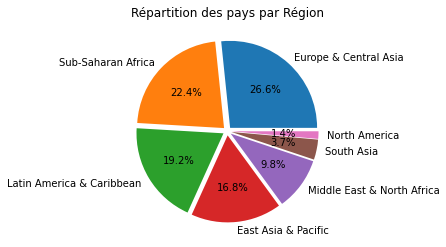

In [28]:
plt.pie(tabCountryReg["n"], labels=tabCountryReg["Region"], explode=[0.05]*7, normalize = True, autopct="%.1f%%")
plt.title("Répartition des pays par Région")

La variable présente donc 7 modalités, qui semblent bien nous renseigner sur la zone géographique de chaque individu. Elle présente aussi 27 données manquantes, regardons pour quels individus :

In [29]:
TabCompRegLn = pd.DataFrame(dataCountry["Long Name"])
TabCompRegLn["Country Code"] = dataCountry["Country Code"]
TabCompRegLn["Region"] = dataCountry["Region"] 

TabCompRegLnNaN = TabCompRegLn[TabCompRegLn["Region"].isnull()] 
TabCompRegLnNaN

,Long Name,Country Code,Region
5,Arab World,ARB,NaN
57,East Asia & Pacific (developing only),EAP,NaN
58,East Asia & Pacific (all income levels),EAS,NaN
59,Europe & Central Asia (developing only),ECA,NaN
60,Europe & Central Asia (all income levels),ECS,NaN
63,Euro area,EMU,NaN
68,European Union,EUU,NaN
78,Gibraltar,GIB,NaN
89,High income,HIC,NaN
92,Heavily indebted poor countries (HIPC),HPC,NaN


##### Income Group :  <a name="IncomeGroup"></a>
Le nom de la variable semble faire référence à un groupement selon le revenus de l'individu. Elle semble donc être une variable *qualitative ordinale*, en effet on pourrait établir un classement selon le revenu de l'individu du plus ou moins riche par exemple. Vérifions notre hypothèse :

In [30]:
countryIncEff = dataCountry["Income Group"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryIncModa = countryIncEff.index #on récupères les modalités que prends la variable

tabCountryInc = pd.DataFrame(countryIncModa, columns = ["Income Group"]) #on crée un DataFrame avec toutes les modalités de la variable
tabCountryInc["n"] = countryIncEff.values #On ajoute une colonne au DataFrame contenant le nombre d'occurence de la modalité
tabCountryInc["f"] = tabCountryInc["n"]/tabCountryInc["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryInc

,Income Group,n,f
0,Upper middle income,55,0.257009
1,Lower middle income,50,0.233645
2,High income: nonOECD,44,0.205607
3,Low income,34,0.158879
4,High income: OECD,31,0.144860


Text(0.5, 1.0, 'Répartition des pays par Income Group')

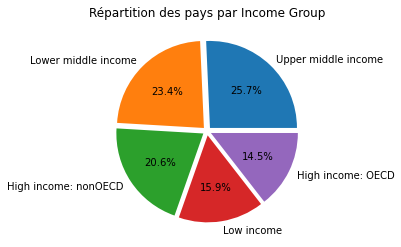

In [31]:
plt.pie(tabCountryInc["n"], labels=tabCountryInc["Income Group"], explode=[0.05]*5, normalize = True, autopct="%.1f%%")
plt.title("Répartition des pays par Income Group")

La variable présente 5 modalités. On peut les classer du plus "faible" revenus au plus "fort" :
1. Low Income
2. Lower middle income
3. Upper middle income
4. High Income: nonOECD & High income: OECD : ces modalités ne peuvent être ordonnées entre-elles : en effet le niveau de revenus est le même "High Income" mais la variable nous renseigne aussi sur le fait que l'individu soit membre, ou non, de l'OCDE (Organisation de Coopération et de Développement Economiques). On pourrait supprimer cette information si on avait une variable OECD/nonOECD  afin de ne faire qu'une seule modalité "High Income"<br>
La variable présente 27 données manquantes comme 'Region', regardons les individus concernés :

In [32]:
TabCompIncLn = pd.DataFrame(dataCountry["Long Name"])
TabCompIncLn["Country Code"] = dataCountry["Country Code"]
TabCompIncLn["Income Group"] = dataCountry["Income Group"] 

TabCompIncLnNaN = TabCompIncLn[TabCompIncLn["Income Group"].isnull()] 
TabCompIncLnNaN

,Long Name,Country Code,Income Group
5,Arab World,ARB,NaN
57,East Asia & Pacific (developing only),EAP,NaN
58,East Asia & Pacific (all income levels),EAS,NaN
59,Europe & Central Asia (developing only),ECA,NaN
60,Europe & Central Asia (all income levels),ECS,NaN
63,Euro area,EMU,NaN
68,European Union,EUU,NaN
78,Gibraltar,GIB,NaN
89,High income,HIC,NaN
92,Heavily indebted poor countries (HIPC),HPC,NaN


Les données manquantes semblent correspondre aux mêmes individus que pour "Region" vérifions cela :

In [33]:
TabCompRegInc = pd.DataFrame(TabCompIncLnNaN["Long Name"])

TabCompRegInc["Compare"] = TabCompRegLnNaN["Country Code"].eq(TabCompIncLnNaN["Country Code"])

TabCompRegInc[TabCompRegInc["Compare"]==False]

,Long Name,Compare


Les individus présentant des données manquantes pour "Region" sont donc les mêmes qui présentes des données manquantes pour "Income Group". Ce qui semble normal vu que, comme l'on a vu précédemment, la majorité de ces individus sont des groupement de Pays, hors la classe de revenu est pour un pays unique.
##### WB-2 code :
Cette variable semble être identique à *2-aplha code*. En effet WB renvoie à "World Bank" et 2 au nombre de caractères constituant le code d'identification. Ce serait donc une variable *qualitative nominale*, regardons plus en détails :

In [34]:
countryWbEff = dataCountry["WB-2 code"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryWbModa = countryWbEff.index #on récupères les modalités que prends la variable

tabCountryWb = pd.DataFrame(countryWbModa, columns = ["WB-2 code"]) 
tabCountryWb["n"] = countryWbEff.values 
tabCountryWb["f"] = tabCountryWb["n"]/tabCountryWb["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryWb

,WB-2 code,n,f
0,BD,1,0.004167
1,PW,1,0.004167
2,AR,1,0.004167
3,HK,1,0.004167
4,NL,1,0.004167
...,...,...,...
235,TO,1,0.004167
236,AL,1,0.004167
237,ZG,1,0.004167
238,KY,1,0.004167


La variable présente 240 modalités et 1 donnée manquante. Comme pour la variable *2-alpha code* ont pourrait rechercher et corriger, si possible, la valeur manquante, sauf qu'on a déjà *Country Code* qui va nous permettre d'identifier les individus.
##### National accounts base year :
D'après le site de la [World Bank](https://datacatalog.worldbank.org/national-accounts-base-year#:~:text=National%20accounts%20base%20year%20is,economic%20structure%20and%20relative%20prices.) cette variable nous renseigne sur l'année de base qui à servie pour le calcul des "prix constant" des comptes nationaux des pays. Cette variable semble donc être une variable *qualitative ordinale*, observons ses différentes modalités :

In [35]:
countryNabyEff = dataCountry["National accounts base year"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryNabyModa = countryNabyEff.index #on récupères les modalités que prends la variable

tabCountryNaby = pd.DataFrame(countryNabyModa, columns = ["National accounts base year"]) 
tabCountryNaby["n"] = countryNabyEff.values 
tabCountryNaby["f"] = tabCountryNaby["n"]/tabCountryNaby["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryNaby

,National accounts base year,n,f
0,2005,34,0.165854
1,Original chained constant price data are resca...,28,0.136585
2,2000,25,0.121951
3,2006,19,0.092683
4,1990,11,0.053659
5,2007,9,0.043902
6,2004,8,0.039024
7,2010,6,0.029268
8,2003,5,0.024390
9,1999,4,0.019512


In [36]:
tabCountryNaby["n"].sum()

205

Cette variable présente donc 42 modalités différentes pour 205 individus et 36 données manquantes. A la vue des différentes modalités cette variable *qualitative* est plutôt de type *nominale* car on ne peut ordonner ces modalités. En effet, on retrouve dans ces modalités des types différents.
##### National accounts reference year :
Cette variable nous renseigne sur l'année de référence utilisée pour le calcul des comptes nationaux. A première vue, comme pour *National accounts base year* cette variable semble être une variable *qualitative ordinale*, vérifions cette hypothèse :

In [37]:
countryNaryEff = dataCountry["National accounts reference year"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryNaryModa = countryNaryEff.index #on récupères les modalités que prends la variable

tabCountryNary = pd.DataFrame(countryNaryModa, columns = ["National accounts reference year"]) 
tabCountryNary["n"] = countryNaryEff.values 
tabCountryNary["f"] = tabCountryNary["n"]/tabCountryNary["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryNary

,National accounts reference year,n,f
0,2005.0,11,0.34375
1,1996.0,6,0.18750
2,2000.0,5,0.15625
3,2002.0,2,0.06250
4,2012.0,2,0.06250
5,2001.0,1,0.03125
6,2007.0,1,0.03125
7,1995.0,1,0.03125
8,1997.0,1,0.03125
9,1987.0,1,0.03125


Elle présente 11 modalités et 209 données manquantes, c'est la variable présentant le plus de données manquantes du fichier. Les modalités étant des années nous confirmes donc que cette variable est bien *qualitative ordinale*, seulement on remarque la présence d'un "." et d'un "0" ce qui montre que les données dans la colonne semblent être de type "float", nous allons donc corriger cela.

In [38]:
dataCountry.dtypes['National accounts reference year'] #on recherche le type de données de la colonne

dtype('float64')

In [39]:
dataCountry['National accounts reference year'] = pd.to_datetime(dataCountry['National accounts reference year'], format='%Y')
dataCountry['National accounts reference year'] = dataCountry['National accounts reference year'].dt.strftime('%Y')

In [40]:
countryNaryEff = dataCountry["National accounts reference year"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryNaryModa = countryNaryEff.index #on récupères les modalités que prends la variable

tabCountryNary = pd.DataFrame(countryNaryModa, columns = ["National accounts reference year"]) 
tabCountryNary["n"] = countryNaryEff.values 
tabCountryNary["f"] = tabCountryNary["n"]/tabCountryNary["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryNary

,National accounts reference year,n,f
0,2005,11,0.34375
1,1996,6,0.18750
2,2000,5,0.15625
3,2002,2,0.06250
4,2012,2,0.06250
5,2007,1,0.03125
6,1995,1,0.03125
7,1987,1,0.03125
8,2003,1,0.03125
9,2001,1,0.03125


##### SNA price valuation :
Cette variable, de par son nom, semble nous renseigner sur la méthode d'évaluation des montants pour le calcul du SNA (System National Accounts). Cette variable semble donc être une variable *qualitative nominale*, vérifions cela ainsi que ses modalités :

In [41]:
countrySnapvEff = dataCountry["SNA price valuation"].value_counts() #on comptes le nombre de valeurs dans la colonne
countrySnapvModa = countrySnapvEff.index #on récupères les modalités que prends la variable

tabCountrySnapv = pd.DataFrame(countrySnapvModa, columns = ["SNA price valuation"]) 
tabCountrySnapv["n"] = countrySnapvEff.values 
tabCountrySnapv["f"] = tabCountrySnapv["n"]/tabCountrySnapv["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountrySnapv

,SNA price valuation,n,f
0,Value added at basic prices (VAB),163,0.827411
1,Value added at producer prices (VAP),34,0.172589


On observe 2 modalités pour la variable, ainsi que 44 données manquantes : 
- Value added at basic prices (VAB) : 163 individus
- Value added at producer prices (VAP) : 34 individus

Après quelques recherches voici la différence entre les 2 méthodes d'évaluation [Source](http://www.arthapedia.in/index.php%3Ftitle%3DGross_Value_Added_(GVA)_at_basic_prices_and_GVA_at_Factor_Costs) :
- VAB (Basic price) : Montant que doit recevoir le producteur par l'acheteur **-** *toutes taxes* **+** *subventions*
- VAP (Producer price) : Montant que doit recevoir le producteur par l'acheteur **-** *TVA*

##### Lending category :
On peut traduire littéralement cette variable par "Catégorie de prêt". On s'attend donc à avoir une variable *qualitative nominale* : 

In [42]:
countryLcEff = dataCountry["Lending category"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryLcModa = countryLcEff.index #on récupères les modalités que prends la variable

tabCountryLc = pd.DataFrame(countryLcModa, columns = ["Lending category"]) 
tabCountryLc["n"] = countryLcEff.values 
tabCountryLc["f"] = tabCountryLc["n"]/tabCountryLc["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryLc

,Lending category,n,f
0,IBRD,67,0.465278
1,IDA,59,0.409722
2,Blend,18,0.125000


Text(0.5, 1.0, 'Répartition des pays par Lending category')

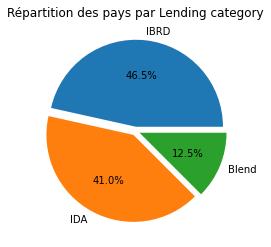

In [43]:
plt.pie(tabCountryLc["n"], labels=tabCountryLc["Lending category"], explode=[0.05]*3, normalize = True, autopct="%.1f%%")
plt.title("Répartition des pays par Lending category")

On observe 3 modalités pour la variable, et 97 données manquantes: 
- IBRD : 67 individus
- IDA : 59 individus
- Blend : 18 individus

D'après le [site de la Banque Mondiale](https://datahelpdesk.worldbank.org/knowledgebase/articles/378834-how-does-the-world-bank-classify-countries), les pays sont divisés en pays :
- **IDA**(International Development Association) : Pays avec un faible revenu par habitant et qui n'ont pas la capacité financière d'emprunter auprès de la BIRD (Banque internationale pour la reconstruction et le développement. 
- **IBRD** (International Bank for Reconstruction and Development) : Pays ayant emprunter auprès de la IBRD
- **Blend**, traduire par "Mixtes" : Eligibles aux prêts de l'IDA mais également éligibles aux prêts de la BIRD car ils sont financièrement solvables. 

##### Other groups :
Semble nous donner des informations complémentaires sur d'éventuels 'Autres groupes'. Elle semble être une variable *qualitative nominale* :

In [44]:
countryOgEff = dataCountry["Other groups"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryOgModa = countryOgEff.index #on récupères les modalités que prends la variable

tabCountryOg = pd.DataFrame(countryOgModa, columns = ["Other groups"]) 
tabCountryOg["n"] = countryOgEff.values 
tabCountryOg["f"] = tabCountryOg["n"]/tabCountryOg["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryOg

,Other groups,n,f
0,HIPC,40,0.689655
1,Euro area,18,0.310345


La variable présente 2 modalités et 183 données manquantes : 
- **HIPC** (Heavily Indebted Poor Country) soit Pays pauvres très endettés : [Plus d'informations](https://www.worldbank.org/en/topic/debt/brief/hipc)
- **Euro area** (Zone euro) 

##### System of National Accounts :
Indications sur le système des comptes nationaux. Variable *qualitative nominale*

In [45]:
countrySnaEff = dataCountry["System of National Accounts"].value_counts() #on comptes le nombre de valeurs dans la colonne
countrySnaModa = countrySnaEff.index #on récupères les modalités que prends la variable

tabCountrySna = pd.DataFrame(countrySnaModa, columns = ["System of National Accounts"]) 
tabCountrySna["n"] = countrySnaEff.values 
tabCountrySna["f"] = tabCountrySna["n"]/tabCountrySna["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountrySna

,System of National Accounts,n,f
0,Country uses the 1993 System of National Accou...,165,0.767442
1,Country uses the 1968 System of National Accou...,42,0.195349
2,Country uses the 2008 System of National Accou...,8,0.037209


3 modalités, 26 données manquantes : 
- Country uses the 1993 System of National Accounts
- Country uses the 1968 System of National Accounts
- Country uses the 2008 System of National Accounts

Le SNA est un ensemble de standard de recommandations convenues au niveau international sur la manière de compiler les mesures de l'activité économique. L'ONU élabore des manuels de comptabilité nationale afin de fournir un soutien méthodologique pour ces calculs ([Source](https://unstats.un.org/unsd/nationalaccount/sna.asp).)<br>
L'ONU a délivré différentes recommandations en 1968, 1993 et 2008. Cette variable nous renseigne donc sur la méthode de calcul utilisée par le pays.
##### Alternative conversion factor :
Que l'on peut traduire en "Facteur de conversion alternatif", on s'attend donc à avoir une variable *quantitative continue*. Sauf qu'en regardant les données on se rends compte que l'on est en présence de d'années voir de périodes, regardons les valeurs que prend cette variable :

In [46]:
countryAcfEff = dataCountry["Alternative conversion factor"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryAcfModa = countryAcfEff.index #on récupères les modalités que prends la variable

tabCountryAcf = pd.DataFrame(countryAcfModa, columns = ["Alternative conversion factor"]) 
tabCountryAcf["n"] = countryAcfEff.values 
tabCountryAcf["f"] = tabCountryAcf["n"]/tabCountryAcf["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryAcf

,Alternative conversion factor,n,f
0,1990–95,8,0.170213
1,1987–95,5,0.106383
2,1993,3,0.063830
3,1991,2,0.042553
4,1992–95,2,0.042553
5,1965–84,1,0.021277
6,1978–93,1,0.021277
7,1977–90,1,0.021277
8,"1978–89, 1991–92",1,0.021277
9,1990–96,1,0.021277


La variable prend 32 valeurs différentes et présente 194 données manquantes. En recherchant sur le site de la World Bank je n'ai pas trouvé l'intitulé exact de la variable. J'ai uniquement trouvé le [DEC alternative conversion factor (LCU per US dollar)](https://data.worldbank.org/indicator/PA.NUS.ATLS) qui correspond au taux de change annuel officiel indiqué dans les statistiques financières internationales du FMI, il est exprimé en unités de monnaie locale par dollar américain ([Source](https://www.indexmundi.com/facts/indicators/PA.NUS.ATLS)).
Il ne correspond donc pas au contenu de cette variable.
##### PPP survey year :
Peut être traduite en "Année de l'enquête PPP". On s'attend donc à avoir des années, donc une variable *qualitative ordinale* :

In [47]:
countryPppEff = dataCountry["PPP survey year"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryPppModa = countryPppEff.index #on récupères les modalités que prends la variable

tabCountryPpp = pd.DataFrame(countryPppModa, columns = ["PPP survey year"]) 
tabCountryPpp["n"] = countryPppEff.values 
tabCountryPpp["f"] = tabCountryPpp["n"]/tabCountryPpp["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryPpp

,PPP survey year,n,f
0,2005,98,0.675862
1,Rolling,37,0.255172
2,2011,10,0.068966


On observe ici 3 modalités et 96 données manquantes : 
- 2005 : 98 individus
- Rolling : 37 individus
- 2011 : 10 individus

PPP pour Purchasing Power Parity correspond à la Parité de Pouvoir d'Achat. C'est une théorie économique qui compare les différentes monnaies de pays via l'approche du "panier de biens" : 2 pays sont en équilibre si le "panier de biens" à le même prix, en prenant en compte les taux de change. ([Source](https://www.investopedia.com/updates/purchasing-power-parity-ppp/)). 
Pour la modalité "Rolling", ou "Continue", fait référence à la nouvelle méthodologie d'enquête mise en oeuvre à partir de 2017. Elle consiste à répartir la collecte des données, sur les prix, sur une période autour de l'année de référence. ([Source](https://www.worldbank.org/en/programs/icp/brief/ra01)). On pourrait donc considérer la variable comme étant *qualitative ordinale* vu que "Rolling" corresponds au années $\ge$ 2017 :
1. 2005
2. 2011
3. Rolling

##### Balance of Payments Manual in use :
Que l'on peut traduire par "Manuel de l'équilibre des paiements en cours ", semble nous renseigner sur la nature d'un texte de référence pour le calcul de l'équilibre des paiements. Il semblerait qu'elle soit de type *qualitative nominale* :

In [48]:
countryBpmEff = dataCountry["Balance of Payments Manual in use"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryBpmModa = countryBpmEff.index #on récupères les modalités que prends la variable

tabCountryBpm = pd.DataFrame(countryBpmModa, columns = ["Balance of Payments Manual in use"]) 
tabCountryBpm["n"] = countryBpmEff.values 
tabCountryBpm["f"] = tabCountryBpm["n"]/tabCountryBpm["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryBpm

,Balance of Payments Manual in use,n,f
0,"IMF Balance of Payments Manual, 6th edition.",181,1.0


La variable présente 1 seule modalité pour 181 individus et 60 données manquantes. D'après le [Site de la World Bank](https://datacatalog.worldbank.org/balance-payments-manual-use), le "Balance of Payments Manual" sert de norme internationale pour la compilation des statistiques de la balance des paiements. Il y a 6 éditions, la dernière en date à été publiée en 2013, c'est donc celle que l'on retrouve ici.
##### External debt Reporting status :
Soit "Situation des rapports sur la dette extérieure" nous renseigne sur le types de données utilisées pour calculer la dette extérieure pour la dernière série. Cette variable est censée comporter 3 modalités :
- Actual : Données déclarées (réelles)
- Preliminary : Données préliminaires comportant un élément d'estimation
- Estimate : Données issues d'estimations

Vérifions donc cette hypothèse :

In [49]:
countryEdrsEff = dataCountry["External debt Reporting status"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryEdrsModa = countryEdrsEff.index #on récupères les modalités que prends la variable

tabCountryEdrs = pd.DataFrame(countryEdrsModa, columns = ["External debt Reporting status"]) 
tabCountryEdrs["n"] = countryEdrsEff.values 
tabCountryEdrs["f"] = tabCountryEdrs["n"]/tabCountryEdrs["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryEdrs

,External debt Reporting status,n,f
0,Actual,107,0.862903
1,Estimate,11,0.088710
2,Preliminary,6,0.048387


La variable présente donc bien les modalités que l'on attendait et 117 valeurs manquantes.
La très grande majorité (86%) des individus, en excluant les valeurs manquantes, ont une dette extérieure qui est basée sur des données réelles. 
##### System of trade :
Traduire par "Système Commercial", [Eurostat](https://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:General_and_special_trade_systems) nous explique qu'il existe 2 approches, liées aux procédures douanières, pour mesurer le commerce international de marchandises :
- Le système général : Concept large prenant en qui comprend les entrepôts douaniers, tous les types de zones franches, les zones de libre circulation.
- le système spécial : Concept plus précis, qui exclut les entrepôts douaniers, les zones franches. Il prend en compte uniquement les importations et les exportations de la zone de libre échange. Il existe une définition plus souple qui prend en compte les zones franches industrielles.

On s'attend donc à ce que cette variable soit de type *qualitative nominale* avec au moins 2 modalités :
- système général
- système spécial

Plus de détails sur la méthode de calcul sur [ce site : 5.6, 5.7, 5.8, 5.9](https://www.elibrary.imf.org/view/IMF069/20846-9781484312759/20846-9781484312759/ch05.xml?language=en&redirect=true)
On peut aussi s'attendre à trouver une modalité "système spécial assoupli", regardons les modalités :

In [50]:
countrySotEff = dataCountry["System of trade"].value_counts() #on comptes le nombre de valeurs dans la colonne
countrySotModa = countrySotEff.index #on récupères les modalités que prends la variable

tabCountrySot = pd.DataFrame(countrySotModa, columns = ["System of trade"]) 
tabCountrySot["n"] = countrySotEff.values 
tabCountrySot["f"] = tabCountrySot["n"]/tabCountrySot["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountrySot

,System of trade,n,f
0,General trade system,106,0.53
1,Special trade system,94,0.47


On retrouve donc les 2 modalités auxquelles on s'attendait et 41 données manquantes.
##### Government Accounting concept :
Ou "Concept de comptabilité gouvernemental", on s'attends donc à avoir une variable *qualitative nominale* : 

In [51]:
countryGacEff = dataCountry["Government Accounting concept"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryGacModa = countryGacEff.index #on récupères les modalités que prends la variable

tabCountryGac = pd.DataFrame(countryGacModa, columns = ["Government Accounting concept"]) 
tabCountryGac["n"] = countryGacEff.values 
tabCountryGac["f"] = tabCountryGac["n"]/tabCountryGac["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryGac

,Government Accounting concept,n,f
0,Consolidated central government,95,0.590062
1,Budgetary central government,66,0.409938


On observe 2 modalités et 80 données manquantes. 
[Le site de la World Bank](https://datacatalog.worldbank.org/government-finance-accounting) nous détaille cette variable. En résumé, les "Consolidated" sont plus exhaustif que les "Budgetary".
##### IMF data dissemination standard :
Soit "Norme FMI de diffusion des données", FMI pour Fond Monétaire International. On attend donc que cette variable nous renseigne sur le standard, la norme, utilisé par les pays pour la diffusion de leurs données économiques et financières. La variable doit donc être une variable *qualitative nominale* :

In [52]:
countryImfEff = dataCountry["IMF data dissemination standard"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryImfModa = countryImfEff.index #on récupères les modalités que prends la variable

tabCountryImf = pd.DataFrame(countryImfModa, columns = ["IMF data dissemination standard"]) 
tabCountryImf["n"] = countryImfEff.values 
tabCountryImf["f"] = tabCountryImf["n"]/tabCountryImf["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryImf

,IMF data dissemination standard,n,f
0,General Data Dissemination System (GDDS),110,0.607735
1,Special Data Dissemination Standard (SDDS),71,0.392265


On observe 2 modalités et 60 données manquantes, voici les explications des modalités :
- GDSS ([Source](https://repository.uneca.org/handle/10855/2311)) : Conçu par le FMI pour améliorer la qualité des données économiques, financières et socio-démographiques des pays membres. 
- SDSS ([Site World Bank](https://datacatalog.worldbank.org/special-data-dissemination-standard)) : Établie par le FMI pour les pays membres qui ont ou pourraient avoir un accès aux marchés financiers internationaux, pour les guider dans la diffusion de leur données économiques et financières au public.
##### Latest population census :
Pour "Dernier recensement de la population", à priori on s'attend à avoir soit : 
- Une variable *quantitative continue* si cette variable fait référence à la taille de la population lors du dernier recensement
- Une variable *qualitative ordinale* si cette variable fait référence à l'année du dernier recensement
Vérifions nos hypothèses en regardant les valeurs que prend cette variable :

In [53]:
countryLpcEff = dataCountry["Latest population census"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryLpcModa = countryLpcEff.index #on récupères les modalités que prends la variable

tabCountryLpc = pd.DataFrame(countryLpcModa, columns = ["Latest population census"]) 
tabCountryLpc["n"] = countryLpcEff.values 
tabCountryLpc["f"] = tabCountryLpc["n"]/tabCountryLpc["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryLpc

,Latest population census,n,f
0,2011,59,0.276995
1,2010,49,0.230047
2,2012,18,0.084507
3,2009,14,0.065728
4,2008,9,0.042254
5,2007,9,0.042254
6,2006,8,0.037559
7,2013,8,0.037559
8,2004,7,0.032864
9,2002,5,0.023474


On remarque que nous sommes en présence d'années, on en déduit donc que la variable nous renseigne donc sur l'année du dernier recensement effectué. On remarque aussi la présence de 4 modalités avec des informations complémentaires. On notera aussi la présence de 28 données manquantes.
##### Latest household survey :
Pour "Dernière enquêtes des ménages", doit nous renseigner, de la même manière que "Latest population census" sur l'année ou à été effectué la dernière enquêtes auprès des ménages, vérifions cela :

In [54]:
countryLhsEff = dataCountry["Latest household survey"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryLhsModa = countryLhsEff.index #on récupères les modalités que prends la variable

tabCountryLhs = pd.DataFrame(countryLhsModa, columns = ["Latest household survey"]) 
tabCountryLhs["n"] = countryLhsEff.values 
tabCountryLhs["f"] = tabCountryLhs["n"]/tabCountryLhs["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryLhs

,Latest household survey,n,f
0,"World Health Survey (WHS), 2003",10,0.070922
1,"Multiple Indicator Cluster Survey (MICS), 2012",10,0.070922
2,"Demographic and Health Survey (DHS), 2013",10,0.070922
3,"Multiple Indicator Cluster Survey (MICS), 2010",9,0.063830
4,"Multiple Indicator Cluster Survey (MICS), 2011",9,0.063830
5,"Demographic and Health Survey (DHS), 2012",8,0.056738
6,"Demographic and Health Survey (DHS), 2011",6,0.042553
7,"Demographic and Health Survey (DHS), 2009",4,0.028369
8,"Demographic and Health Survey (DHS), 2011/12",4,0.028369
9,"Multiple Indicator Cluster Survey (MICS), 2011/12",4,0.028369


On observes que la variable présente 60 modalités et 100 données manquantes. On remarques que l'on retrouves une année mais des informations complémentaires sur le nom de l'enquête, nous sommes donc en présence d'une variable *qualitative nominale*.
##### Source of most recent Income and expenditure data :
Soit "Source de données les plus récentes sur les revenus et les dépenses", on s'attends donc à avoir un nom de source de données, donc une variable *qualitative nominale* :

In [55]:
countrySieEff = dataCountry["Source of most recent Income and expenditure data"].value_counts() #on comptes le nombre de valeurs dans la colonne
countrySieModa = countrySieEff.index #on récupères les modalités que prends la variable

tabCountrySie = pd.DataFrame(countrySieModa, columns = ["Source of most recent Income and expenditure data"]) 
tabCountrySie["n"] = countrySieEff.values 
tabCountrySie["f"] = tabCountrySie["n"]/tabCountrySie["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountrySie

,Source of most recent Income and expenditure data,n,f
0,"Integrated household survey (IHS), 2012",15,0.09375
1,"Integrated household survey (IHS), 2011",9,0.05625
2,"Integrated household survey (IHS), 2010",9,0.05625
3,"Expenditure survey/budget survey (ES/BS), 2012",7,0.04375
4,"Integrated household survey (IHS), 2008",7,0.04375
5,"Integrated household survey (IHS), 2000",6,0.03750
6,"Expenditure survey/budget survey (ES/BS), 2009",5,0.03125
7,"Income survey (IS), 2000",4,0.02500
8,"Expenditure survey/budget survey (ES/BS), 2011",4,0.02500
9,"Expenditure survey/budget survey (ES/BS), 2010",4,0.02500


On observe 75 modalités pour cette variable et 81 données manquantes. De la même manière que pour "Latest household survey", on retrouve le nom de la source, de l'enquête, ainsi que son année de réalisation.
##### Vital registration complete :
[Ce site](https://www.measureevaluation.org/his-strengthening-resource-center/resources/completeness-of-vital-registration-births-and-deaths) nous renseigne sur la l'exhaustivité des enregistrements des événements "vitaux". <br>
Pour simplifier, "Vital registration" est un registre dans lequel les événements "vitaux" (naissances et décès) sont notés. "Complete" nous informe sur le fait que le registre est complet ou incomplet. On s'attends à trouver ici 2 modalités Oui et Non (Yes, No), elle semble donc être une variable *qualitative binaire* :

In [56]:
countryVrcEff = dataCountry["Vital registration complete"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryVrcModa = countryVrcEff.index #on récupères les modalités que prends la variable

tabCountryVrc = pd.DataFrame(countryVrcModa, columns = ["Vital registration complete"]) 
tabCountryVrc["n"] = countryVrcEff.values 
tabCountryVrc["f"] = tabCountryVrc["n"]/tabCountryVrc["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryVrc

,Vital registration complete,n,f
0,Yes,110,0.990991
1,Yes. Vital registration for Guernsey and Jersey.,1,0.009009


On observe bien 2 modalités et 130 données manquantes. Seulement les 2 modalités observés font référence à "Yes", une nous donne des renseignements sur l'étendue du registre (Ici Guernsey & Jersey font référence aux 2 îles constituant "Channels Islands".
##### Latest agricultural census :
Pour "dernier recensement agricole" va certainement nous renseigner sur l'année du dernier recensement effectué. Comme pour "Latest population census" on s'attends aussi à avoir des informations complémentaires dans certaines modalités. Cette variable semble donc être une variable *qualitative nominale* : 

In [57]:
countryLacEff = dataCountry["Latest agricultural census"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryLacModa = countryLacEff.index #on récupères les modalités que prends la variable

tabCountryLac = pd.DataFrame(countryLacModa, columns = ["Latest agricultural census"]) 
tabCountryLac["n"] = countryLacEff.values 
tabCountryLac["f"] = tabCountryLac["n"]/tabCountryLac["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryLac

,Latest agricultural census,n,f
0,2010,36,0.253521
1,2007,16,0.112676
2,2013,13,0.091549
3,2012,10,0.070423
4,2011,9,0.063380
5,2014,7,0.049296
6,2009,5,0.035211
7,2008,5,0.035211
8,2013/ 2014,4,0.028169
9,2015,3,0.021127


On observe 35 modalités et 99 données manquantes. On retrouve bien ce à quoi on s'attendait, des années, voire même des périodes, ainsi que des informations complémentaires.
##### Latest industrial data :
Pour "dernières données industrielles", on s'attend à avoir des années ou des années + des informations complémentaires. La variable doit donc être de type *qualitative ordinale*, si l'on à que des années, *nominale* sinon :

In [58]:
countryLidEff = dataCountry["Latest industrial data"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryLidModa = countryLidEff.index #on récupères les modalités que prends la variable

tabCountryLid = pd.DataFrame(countryLidModa, columns = ["Latest industrial data"]) 
tabCountryLid["n"] = countryLidEff.values 
tabCountryLid["f"] = tabCountryLid["n"]/tabCountryLid["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryLid

,Latest industrial data,n,f
0,2010.0,42,0.392523
1,2009.0,27,0.252336
2,2008.0,11,0.102804
3,2006.0,8,0.074766
4,2007.0,6,0.056075
5,2002.0,4,0.037383
6,2001.0,3,0.028037
7,2003.0,2,0.018692
8,2000.0,2,0.018692
9,2005.0,1,0.009346


On observe ici 11 modalités qui sont toutes des années, et 134 données manquantes. Nous sommes donc bien en présence d'une variable *qualitative ordinale*, seulement la présence d'un ".0" nous informe que la colonne à été traitée comme comme s' il s'agissait d'un float. Nous allons donc corriger cela, comme pour la variable "National accounts reference year" :

In [59]:
dataCountry['Latest industrial data'] = pd.to_datetime(dataCountry['Latest industrial data'], format='%Y')
dataCountry['Latest industrial data'] = dataCountry['Latest industrial data'].dt.strftime('%Y')

In [60]:
countryLidEff = dataCountry["Latest industrial data"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryLidModa = countryLidEff.index #on récupères les modalités que prends la variable

tabCountryLid = pd.DataFrame(countryLidModa, columns = ["Latest industrial data"]) 
tabCountryLid["n"] = countryLidEff.values 
tabCountryLid["f"] = tabCountryLid["n"]/tabCountryLid["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryLid

,Latest industrial data,n,f
0,2010,42,0.392523
1,2009,27,0.252336
2,2008,11,0.102804
3,2006,8,0.074766
4,2007,6,0.056075
5,2002,4,0.037383
6,2001,3,0.028037
7,2003,2,0.018692
8,2000,2,0.018692
9,2005,1,0.009346


##### Latest trade data :
Pour "dernières données commerciales", même raisonnement que pour la variable précédente :

In [61]:
countryLtdEff = dataCountry["Latest trade data"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryLtdModa = countryLtdEff.index #on récupères les modalités que prends la variable

tabCountryLtd = pd.DataFrame(countryLtdModa, columns = ["Latest trade data"]) 
tabCountryLtd["n"] = countryLtdEff.values 
tabCountryLtd["f"] = tabCountryLtd["n"]/tabCountryLtd["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryLtd

,Latest trade data,n,f
0,2012.0,135,0.729730
1,2011.0,19,0.102703
2,2009.0,7,0.037838
3,2010.0,7,0.037838
4,2008.0,4,0.021622
5,2007.0,3,0.016216
6,2005.0,2,0.010811
7,2006.0,2,0.010811
8,2000.0,2,0.010811
9,1995.0,1,0.005405


On observe ici 13 modalités et 56 données manquantes. Comme pour la variable précédente il s'agit d'une variable *qualitative ordinale* . Il faut aussi corriger le type de données pour remplacer les floats par des date :

In [62]:
dataCountry['Latest trade data'] = pd.to_datetime(dataCountry['Latest trade data'], format='%Y')
dataCountry['Latest trade data'] = dataCountry['Latest trade data'].dt.strftime('%Y')

##### Latest water withdrawal data :
Soit "Dernières données de prélèvements d'eau",[le site de l'OCDE](https://www.oecd-ilibrary.org/environment/water-withdrawals/indicator/english_17729979-en#) nous précise que ça concerne les prélèvements d'eau douce. Comme pour les variables précédentes on s'attends à avoir une année de renseignée soit une variable *qualitative ordinale* :

In [63]:
countryLwwEff = dataCountry["Latest water withdrawal data"].value_counts() #on comptes le nombre de valeurs dans la colonne
countryLwwModa = countryLwwEff.index #on récupères les modalités que prends la variable

tabCountryLww = pd.DataFrame(countryLwwModa, columns = ["Latest water withdrawal data"]) 
tabCountryLww["n"] = countryLwwEff.values 
tabCountryLww["f"] = tabCountryLww["n"]/tabCountryLww["n"].sum() #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
tabCountryLww

,Latest water withdrawal data,n,f
0,2000,40,0.223464
1,2005,40,0.223464
2,2007,18,0.100559
3,2002,16,0.089385
4,2009,12,0.067039
5,2001,10,0.055866
6,2006,10,0.055866
7,2003,6,0.033520
8,2004,6,0.033520
9,2008,6,0.033520


On observe 20 modalités et 62 données manquantes. Les modalités sont constituées d'années uniquement sauf "2005. Includes South Sudan" qui nous informes de la zone géographique prise en compte pour le calcul.
##### Résumé du contenu du fichier :
Ce fichier contient donc des informations générales sur les pays du monde. 
### A.2 - EdStatsCountry-Series.csv <a name="A.2"></a> 
#### Observation du fichier importé & Nettoyage

In [64]:
dataCS

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


On remarque la présence d'une colonne "Unnamed: 3" qui ne contient que des *NaN* (comme pour le fichier Country.csv)<br>
*Suppression de la colonne "Unnamed: 3" :*

In [65]:
del dataCS['Unnamed: 3']

#### Recherche de doublons
On recherche les doublons de la même manière que pour le fichier Country.csv

In [66]:
dataCS.shape

(613, 3)

613 lignes pour 3 colonnes

In [67]:
dataCS.drop_duplicates(keep = 'first', inplace =True)
dataCS.shape

(613, 3)

613 lignes pour 3 colonnes, pas de différences donc pas de doublons dans ce fichier
#### Présence de données manquantes 
De la même manière que pour le fichier Country.csv

In [68]:
csEffNul = dataCS.isnull().sum() #Le tableau du nombre total de données manquantes par variables

csTabNul = pd.DataFrame(csEffNul, columns=["Nb Null"]) #création du dataframe en reprenant le tableau précédement crée
csTabNul["% Null"] = csTabNul["Nb Null"]/len(dataCS)*100 #ajout d'une colonne qui calcul le % de données manquantes
csTabNul.sort_values(by = 'Nb Null', ascending = False) #classement décroissant du dataframe suivant le nombre de données manquantes

,Nb Null,% Null
CountryCode,0,0.0
SeriesCode,0,0.0
DESCRIPTION,0,0.0


On remarque ici l'absence de données manquantes, les représentations graphiques ne sont donc pas nécessaires.
#### Description du contenu du fichier

In [198]:
pd.concat([dataCS.describe(include='all'), dataCS.dtypes.to_frame(name='type').T])

,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,MDA,SP.POP.GROW,Data sources : United Nations World Population...
freq,18,211,154
type,object,object,object


Comme nous avons pu le voir dans l'importation, le fichier contient 613 observations de 3 variables :
- "CountryCode" : Le code du pays concerné, identique au "CountryCode" que l'on retrouves dans le fichier "Country.csv"
- "SeriesCode" 
- "DESCRIPTION" 

Nous allons pour mieux comprendre le fichier analyser les variables : 
##### CountryCode :
On s'attend ici à avoir un code de pays similaire à "Country Code" du fichier précédent "EdStatsCountry.csv", cette variable doit être *qualitative nominale*. On va donc chercher les modalités de cette variable pour connaître le nombre de pays de ce fichier :

In [69]:
csCcEff = dataCS["CountryCode"].value_counts() 
csCcModa = csCcEff.index 

tabCsCc = pd.DataFrame(csCcModa, columns = ["CountryCode"]) 
tabCsCc["n"] = csCcEff.values 
tabCsCc["f"] = tabCsCc["n"]/tabCsCc["n"].sum() 
tabCsCc

,CountryCode,n,f
0,MDA,18,0.029364
1,GEO,18,0.029364
2,MAR,12,0.019576
3,MUS,12,0.019576
4,TZA,12,0.019576
...,...,...,...
206,DEU,2,0.003263
207,BWA,2,0.003263
208,PRY,2,0.003263
209,COD,2,0.003263


On observe donc 211 modalités soit 211 pays dans ce fichier. De plus, on remarque que ces modalités sont > 1, ce qui signifie que l'on a plusieurs individus pour chaque pays.
##### SeriesCode :
Cette variable semble nous renseigner un code, soit une variable *qualitative nominale*, regardons donc les modalités :

In [70]:
csScEff = dataCS["SeriesCode"].value_counts() 
csScModa = csScEff.index 

tabCsSc = pd.DataFrame(csScModa, columns = ["SeriesCode"]) 
tabCsSc["n"] = csScEff.values 
tabCsSc["f"] = tabCsSc["n"]/tabCsSc["n"].sum() 
tabCsSc

,SeriesCode,n,f
0,SP.POP.GROW,211,0.344209
1,SP.POP.TOTL,211,0.344209
2,NY.GDP.PCAP.PP.CD,19,0.030995
3,NY.GDP.PCAP.PP.KD,19,0.030995
4,NY.GNP.PCAP.PP.CD,19,0.030995
5,NY.GDP.MKTP.PP.CD,14,0.022838
6,NY.GNP.MKTP.PP.CD,14,0.022838
7,NY.GDP.MKTP.PP.KD,14,0.022838
8,SP.POP.TOTL.FE.ZS,13,0.021207
9,SP.POP.0014.TO.ZS,13,0.021207


On observe donc 21 modalités pour cette variable, dont 2 "SP.POP.TOTL" et "SP.POP.GROW" qui sont observées 211 fois c'est à dire pour chaque pays.
##### DESCRIPTION :
On s'attend à trouver une description, soit une variable *qualitative nominale*. On va donc chercher les différentes modalités de cette variable :

In [71]:
csDescEff = dataCS["DESCRIPTION"].value_counts() 
csDescModa = csDescEff.index 

tabCsDesc = pd.DataFrame(csDescModa, columns = ["DESCRIPTION"]) 
tabCsDesc["n"] = csDescEff.values 
tabCsDesc["f"] = tabCsDesc["n"]/tabCsDesc["n"].sum() 
tabCsDesc

,DESCRIPTION,n,f
0,Data sources : United Nations World Population...,154,0.251223
1,Data sources: United Nations World Population ...,137,0.223491
2,Estimates are based on regression.,84,0.137031
3,Data sources : Eurostat,54,0.088091
4,Derived using ratio of age group from WPP and ...,24,0.039152
5,Excludes Transnistria.,6,0.009788
6,Covers mainland Tanzania only.,6,0.009788
7,Data are for areas under the effective control...,6,0.009788
8,Excludes Abkhazia and South Ossetia.,6,0.009788
9,Includes Former Spanish Sahara.,6,0.009788


La variable "DESCRIPTION" prend donc 97 valeurs différentes. Soit plus de modalités que "SeriesCode" et moins que "CountryCode", cette variable semble donc être indépendante des deux variables précédentes. 
Comme son nom l'indique, cette variable donne des indications supplémentaires, une description pour une série donnée et un pays donné. Cette description semble être la source des données ou des informations quant à son calcul par exemple une estimation 'Estimates are based on regression.'
##### Résumé du contenu du fichier :
Ce fichier contient 
### A.3 - EdStatsData.csv <a name="A.3"></a>
#### Observation du fichier importé & Nettoyage

In [72]:
data

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47631.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.021851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.411362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.812241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.353439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

On remarque la présence d'une colonne "Unnamed: 69" qui ne contient que des *NaN* (comme pour les fichiers précédents)<br>
*Suppression de la colonne "Unnamed: 69" :*

In [73]:
del data['Unnamed: 69']

#### Recherche de doublons
On recherche les doublons de la même manière que pour les fichiers précédents

In [74]:
data.shape

(886930, 69)

In [75]:
data.drop_duplicates(keep = 'first', inplace =True)
data.shape

(886930, 69)

Le fichier sans doublons compte donc le même nombre de lignes, 886 930, il n'y a donc pas de doublons dans ce fichier. Ces observations compte 69 variables.
#### Présence de données manquantes 
De la même manière que pour les fichiers précédents :

In [76]:
dataEffNul = data.isnull().sum() 

dataTabNul = pd.DataFrame(dataEffNul, columns=["Nb Null"]) 
dataTabNul["% Null"] = dataTabNul["Nb Null"]/len(data)*100 
dataTabNul.sort_values(by = 'Nb Null', ascending = False) 

,Nb Null,% Null
2017,886787,99.983877
2016,870470,98.144160
1971,851393,95.993258
1973,851385,95.992356
1972,851311,95.984012
1974,851200,95.971497
1979,850121,95.849842
1976,849447,95.773849
1982,849419,95.770692
1989,849390,95.767422


On remarque ici la présence d'un très grand nombre de données manquantes. En effet, seulement 4 variables sur les 69 n'en présentes pas. Ensuite les 65 variables restantes présentes au moins 72,67% de données manquantes, ces variables seront donc peu fiables lors d'une analyse.
##### Représentation graphiques :
Matrice :

<AxesSubplot:>

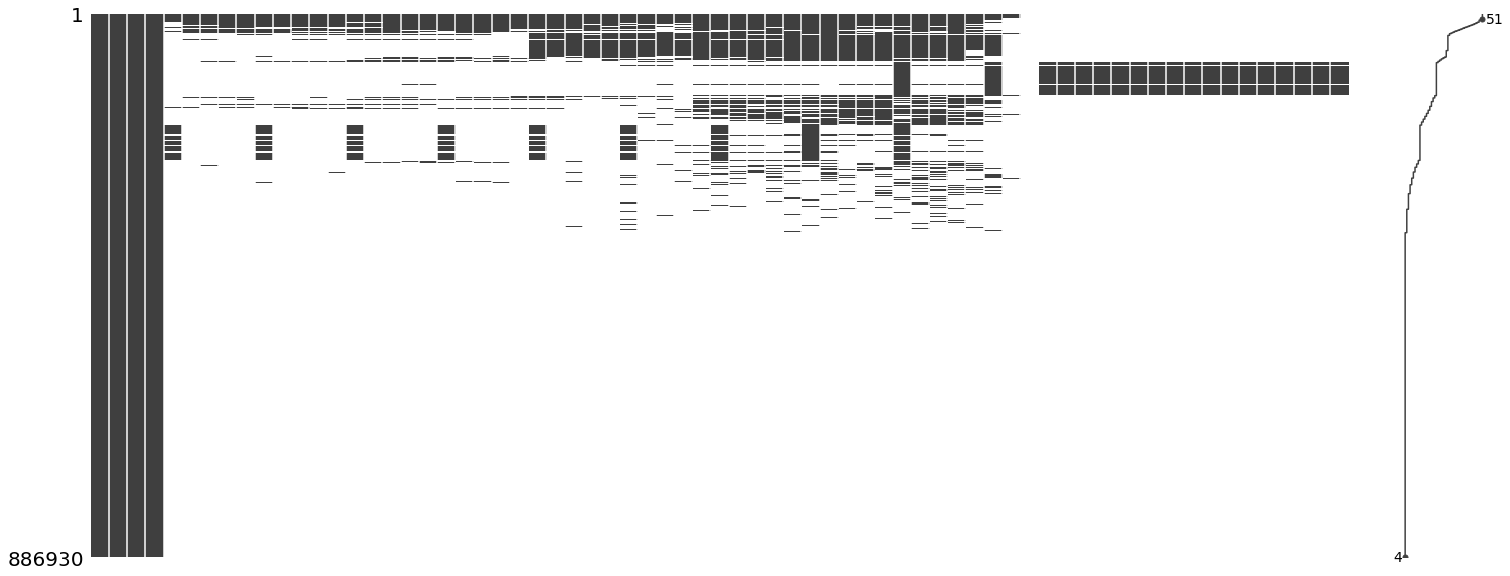

In [77]:
sorted_data = msno.nullity_sort(data, sort = 'descending') 
msno.matrix(sorted_data)

Cette matrice nous permet de constater le nombre important de données manquantes. Elle met aussi en évidence des lignes qui semblent avoir les mêmes données manquantes. Mais aussi, à l'inverse, des lignes qui partagent les mêmes variables valorisées.
#### Description du contenu du fichier
Les variables observées dans le fichier sont les suivantes :

In [78]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

In [199]:
pd.concat([data.describe(include='all'), data.dtypes.to_frame(name='type').T])

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,886930,886930,886930,886930,72288,35537,35619,35545,35730,87306,37483,37574,37576,36809,89122,38777,37511,38460,38606,90296,39372,38641,38552,37540,124405,74437,75543,75793,77462,131361,76807,73453,84914,118839,176676,123509,124205,130363,128814,184108,140312,137272,134387,142108,242442,146012,147264,137509,113789,131058,16460,143,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436
unique,242,242,3665,3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Haiti,LAC,Percentage of students in post-secondary non-t...,UIS.ECDP.1.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3665,3665,242,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.97477e+09,4.25364e+09,4.59236e+09,5.10501e+09,5.40149e+09,2.31429e+09,5.73181e+09,6.12444e+09,6.67149e+09,7.43672e+09,3.2839e+09,7.66497e+09,7.91372e+09,7.85691e+09,8.118e+09,3.62276e+09,9.15655e+09,1.0149e+10,1.10471e+10,1.19544e+10,9.08442e+09,1.57167e+10,1.60467e+10,1.64353e+10,1.68402e+10,1.05254e+10,1.87463e+10,2.02739e+10,1.79468e+10,1.33156e+10,9.42338e+09,1.38487e+10,1.4283e+10,1.44939e+10,1.58973e+10,1.18864e+10,1.68467e+10,1.8723e+10,2.02979e+10,1.89491e+10,1.18959e+10,2.11791e+10,2.17632e+10,2.42533e+10,2.67845e+10,2.35372e+10,1.93441e+11,2.16084,578.07,605.477,631.592,655.652,675.152,691.129,704.064,714.579,722.487,727.129,728.378,726.648,722.833,717.69,711.307,703.427,694.03
std,NaN,NaN,NaN,NaN,1.21169e+11,1.80481e+11,1.91408e+11,2.05917e+11,2.11215e+11,1.37506e+11,2.21555e+11,2.32549e+11,2.47399e+11,2.66096e+11,1.78077e+11,2.74414e+11,2.79055e+11,2.82381e+11,2.94063e+11,2.00293e+11,3.26467e+11,3.53535e+11,3.80426e+11,4.01487e+11,3.66567e+11,4.88136e+11,5.01206e+11,5.12196e+11,5.29298e+11,4.28522e+11,5.81259e+11,6.14236e+11,5.85915e+11,5.15347e+11,4.44237e+11,5.44924e+11,5.62289e+11,5.80361e+11,6.27834e+11,5.57618e+11,6.85148e+11,7.46569e+11,7.94413e+11,7.62365e+11,6.21871e+11,8.55585e+11,8.83395e+11,9.51302e+11,1.02318e+12,9.73246e+11,2.83919e+12,0.810584,14750.7,15773,16785.6,17786.7,18744.1,19654.1,20529.4,21368.5,22158.4,22879.9,23523.4,24081.5,24559,24965.9,25301.8,25560.7,25741.9
min,NaN,NaN,NaN,NaN,-1.43556,-1.59462,-3.05652,-4.03258,-4.21356,-3.65857,-2.95094,-3.17487,-3.55875,-2.97361,-1.40424,-1.47834,-2.35876,-2.86727,-2.80055,-2.21632,-1.55672,-1.41089,-1.4252,-1.56242,-1.80375,-5.81434,-5.08933,-6.18486,-4.79269,-2.69772,-3.82017,-2.51724,-60862,-65260,-67593,-69737,-92143,-111186,-126260,-134724,-370894,-388217,-408854,-456124,-496905,-570994,-604993,-615748,-89,-2.46785,-1.79754,1,-1.87,-2,-2.11,-2.15,-2.14,-2.09,-1.98,-1.83,-1.63,-1.44,-1.26,-1.09,-0.92,-0.78,-0.65,-0.55,-0.45
25%,NaN,NaN,NaN,NaN,0.89,8.85321,9.24092,9.5952,9.86159,1.4,9.31261,9.51991,10,10,1.77,9.46869,9.98933,9.58182,9.06805,2.15,9.33292,9.59533,9.7155,9.67964,4.83,51.3455,49.3385,49.4488,47.8328,5.2,48.3649,55.1085,33.4687,17.4905,5.69904,15.999,15.8425,15.5098,14.1869,5.72,12.7762,12.6866,12.3347,11.8194,1.3227

Ce fichier semble présenter pour un pays donné et un indicateur donné la valeur de cet indicateur pour plusieurs années de 1970 à 2100. Jusqu'en 2017 les valeurs des indicateurs semblent être mesurées alors que de 2020 à 2100 ces indicateurs, je pense, sont basés sur des estimations les données mesurées n'étant pas disponibles.
##### Country Name :
Cette variable doit certainement nous renseigner sur le nom du pays, c'est donc une variable *qualitative nominale*, observons ses modalités :

In [79]:
dataCnEff = data["Country Name"].value_counts() 
dataCnModa = dataCnEff.index 

tabDataCn = pd.DataFrame(dataCnModa, columns = ["Country Name"]) 
tabDataCn["n"] = dataCnEff.values 
tabDataCn["f"] = tabDataCn["n"]/tabDataCn["n"].sum() 
tabDataCn

,Country Name,n,f
0,Haiti,3665,0.004132
1,Burkina Faso,3665,0.004132
2,Germany,3665,0.004132
3,St. Martin (French part),3665,0.004132
4,Malta,3665,0.004132
...,...,...,...
237,Arab World,3665,0.004132
238,United Arab Emirates,3665,0.004132
239,Uzbekistan,3665,0.004132
240,New Caledonia,3665,0.004132


On remarque 242 modalités pour cette variable, soit 242 "pays". Comme dans le fichier "EdStatsCountry.csv" on remarque la présence de regroupement géographique et/ou de revenus : 
- "Upper middle income"
- "Latin America & Caribbean (excluding high income)"

On observe aussi que chaque "Country Name" est présent 3665 fois dans le fichier.
##### Country Code :
On s'attends ici à retrouver les codes d'identification des pays comme dans les fichiers précédents, soit une variable *qualitative nominale*, observons les modalités de la variable :

In [80]:
dataCcEff = data["Country Code"].value_counts() 
dataCcModa = dataCcEff.index 

tabDataCc = pd.DataFrame(dataCcModa, columns = ["Country Code"]) 
tabDataCc["n"] = dataCcEff.values 
tabDataCc["f"] = tabDataCc["n"]/tabDataCc["n"].sum() 
tabDataCc

,Country Code,n,f
0,LAC,3665,0.004132
1,ATG,3665,0.004132
2,NAC,3665,0.004132
3,LCN,3665,0.004132
4,ISR,3665,0.004132
...,...,...,...
237,MMR,3665,0.004132
238,DMA,3665,0.004132
239,CYM,3665,0.004132
240,MNG,3665,0.004132


Comme pour "Country Name" on observes 242 modalités et chaque modalité est observée 3665 fois, soit la même distribution que "Country Name".
##### Indicator Name :
Cette variable semble nous renseigner sur des noms d'indicateurs soit une variable *qualitative nominale*, observons ses modalités :

In [81]:
dataInEff = data["Indicator Name"].value_counts() 
dataInModa = dataInEff.index 

tabDataIn = pd.DataFrame(dataInModa, columns = ["Indicator Name"]) 
tabDataIn["n"] = dataInEff.values 
tabDataIn["f"] = tabDataIn["n"]/tabDataIn["n"].sum() 
tabDataIn

,Indicator Name,n,f
0,Percentage of students in post-secondary non-t...,242,0.000273
1,"Lower secondary completion rate, female (%)",242,0.000273
2,"Gross graduation ratio from primary education,...",242,0.000273
3,DHS: Gross attendance rate. Post Secondary. Qu...,242,0.000273
4,Population of the official age for post-second...,242,0.000273
...,...,...,...
3660,Africa Dataset: Percentage of female newly rec...,242,0.000273
3661,EGRA: Oral Reading Fluency - Correct Words Rea...,242,0.000273
3662,Wittgenstein Projection: Population age 25-29 ...,242,0.000273
3663,Barro-Lee: Average years of secondary schoolin...,242,0.000273


On remarque 3665 modalités pour cette variable, chaque modalité est observée 242. On en deduit donc que le fichier contient 3665 indicateurs différents observés sur 242 pays différents.
##### Indicator Code :
Cette variable semble correspondre au code des indicateurs que l'on a vu juste avant soit une variable *qualitative nominale*. On s'attend donc à avoir la même distribution que précédemment :

In [82]:
dataIcEff = data["Indicator Code"].value_counts() 
dataIcModa = dataIcEff.index 

tabDataIc = pd.DataFrame(dataIcModa, columns = ["Indicator Code"]) 
tabDataIc["n"] = dataIcEff.values 
tabDataIc["f"] = tabDataIc["n"]/tabDataIc["n"].sum() 
tabDataIc

,Indicator Code,n,f
0,UIS.ECDP.1.M,242,0.000273
1,UIS.REPP.2.GPV.GPI,242,0.000273
2,HH.DHS.OOST.X.Q4,242,0.000273
3,SE.SEC.CMPT.LO.FE.ZS,242,0.000273
4,SP.POP.1564.MA.IN,242,0.000273
...,...,...,...
3660,LO.PASEC.MAT.6.P05,242,0.000273
3661,SABER.GRVT.GOAL5.LVL5,242,0.000273
3662,UIS.E.5.B.F,242,0.000273
3663,UIS.T.23.V.F,242,0.000273


On observe ici la même distribution que pour "Indicator Name", en effet, comme pour "Country COde", "Indicator Code" est un code utilisé pour identifier un indicateur.
##### 1970 -> 2100 :
Les variables qui constituent le reste du fichier sont des variables dont le nom réfère à une année. Il y en à 65, de "1970" à "2100", répartis de la manière suivante :
- de 1970 à 2017 : toutes les années
- de 2020 à 2000 : tous les 5 ans 

Logiquement ces variables devraient être toutes du même type, *quantitative continue*, en effet elle devrait nous donner les valeurs de chaque indicateur pour chaque pays pour une année donnée. On ne peut ici faire de statistiques descriptives car pour 1 colonne nous avons des valeurs concernant plusieurs indicateurs, ces statistiques n'auraient pas de sens. Nous nous contenterons pour le moment de la proportion de données manquantes dans ces colonnes (voir au-dessus le paragraphe sur les données manquantes du fichier).

### A.4 - EdStatsFootNote.csv <a name="A.4"></a>
#### Observation du fichier importé & Nettoyage

In [83]:
dataFN

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
...,...,...,...,...,...
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN


On remarque la présence d'une colonne "Unnamed: 4" qui ne contient que des *NaN* (comme pour les fichiers précédents)<br>
*Suppression de la colonne "Unnamed: 4" :*

In [84]:
del dataFN['Unnamed: 4']

#### Recherche de doublons
On recherche les doublons de la même manière que pour les fichiers précédents :

In [85]:
dataFN.shape

(643638, 4)

In [86]:
dataFN.drop_duplicates(keep = 'first', inplace =True)
dataFN.shape

(643638, 4)

643 638 lignes comme pour le fichier initial, le fichier ne comporte donc pas de doublons.
#### Présence de données manquantes 
De la même manière que pour les fichiers précédents :

In [87]:
dataFNEffNul = dataFN.isnull().sum() #Le tableau du nombre total de données manquantes par variables

dataFNTabNul = pd.DataFrame(dataFNEffNul, columns=["Nb Null"]) #création du dataframe en reprenant le tableau précédement crée
dataFNTabNul["% Null"] = dataFNTabNul["Nb Null"]/len(dataFN)*100 #ajout d'une colonne qui calcul le % de données manquantes
dataFNTabNul.sort_values(by = 'Nb Null', ascending = False) #classement décroissant du dataframe suivant le nombre de données manquantes

,Nb Null,% Null
CountryCode,0,0.0
SeriesCode,0,0.0
Year,0,0.0
DESCRIPTION,0,0.0


Ce fichier ne comporte donc aucune donnée manquante
#### Description du contenu du fichier
Comme nous avons pu le voir dans l'importation, le fichier contient 643.368 observations de 4 variables.
Les variables observées sont les suivantes :

In [88]:
dataFN.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION'], dtype='object')

In [200]:
pd.concat([dataFN.describe(include='all'), dataFN.dtypes.to_frame(name='type').T])

,CountryCode,SeriesCode,Year,DESCRIPTION
count,643638,643638,643638,643638
unique,239,1558,55,9102
top,LIC,SH.DYN.MORT,2004,Country Data
freq,7320,9226,27128,191188
type,object,object,object,object


##### CountryCode :
Comme pour les fichiers précédent on s'attend a avoir le code d'identification des pays dans cette variable, soit une variable *qualitative nominale*, vérifions cela :

In [89]:
footNoteCcEff = dataFN["CountryCode"].value_counts() 
footNoteCcModa = footNoteCcEff.index 

tabFootNoteCc = pd.DataFrame(footNoteCcModa, columns = ["CountryCode"]) 
tabFootNoteCc["n"] = footNoteCcEff.values 
tabFootNoteCc["f"] = tabFootNoteCc["n"]/tabFootNoteCc["n"].sum() 
tabFootNoteCc

,CountryCode,n,f
0,LIC,7320,0.011373
1,CYP,7183,0.011160
2,LDC,6481,0.010069
3,SSA,6389,0.009926
4,SSF,6336,0.009844
...,...,...,...
234,IMN,32,0.000050
235,CUW,23,0.000036
236,XKX,12,0.000019
237,MNP,4,0.000006


On observe donc 239 modalités pour cette variable, il y a donc 239 pays différents. On observe aussi que certains pays sont très présents, jusqu'à 7320 fois pour "LIC" et que d'autres le sont beaucoup moins, 2 fois au minimum pour "FRO".
##### SeriesCode :
On devrai avoir dans cette variable les codes d'identification des "Series" que l'on a trouvé dans le fichier "CountrySeries.csv", donc une variable *qualitative nominale* :

In [90]:
footNoteScEff = dataFN["SeriesCode"].value_counts() 
footNoteScModa = footNoteScEff.index 

tabFootNoteSc = pd.DataFrame(footNoteScModa, columns = ["SeriesCode"]) 
tabFootNoteSc["n"] = footNoteScEff.values 
tabFootNoteSc["f"] = tabFootNoteSc["n"]/tabFootNoteSc["n"].sum() 
tabFootNoteSc

,SeriesCode,n,f
0,SH.DYN.MORT,9226,0.014334
1,SE.PRM.AGES,8771,0.013627
2,SE.PRM.DURS,8771,0.013627
3,SE.SEC.DURS,8619,0.013391
4,SE.SEC.AGES,8581,0.013332
...,...,...,...
1553,UIS.XUNIT.PPPCONST.1.FSGOV,1,0.000002
1554,UIS.AFR.SCHBSP.2.PU.WOTOIL,1,0.000002
1555,SABER.EMIS.GOAL4.LVL4,1,0.000002
1556,SABER.EMIS.GOAL2.LVL4,1,0.000002


On observe ici 1558 modalités soit beaucoup plus que pour "SeriesCode" du fichier "CountrySeries.csv" (21). Comme pour la variable "CountryCode" on observe une distribution irrégulière, certaines modalités apparaissant jusqu'à 9226 fois et d'autres 1 seule fois.
##### Year :
Comme son nom l'indique on devrait trouver une variable *qualitative ordinale* nous renseignant sur l'année de calcul d'un indicateur donné pour un pays donné :

In [91]:
footNoteYearEff = dataFN["Year"].value_counts() 
footNoteYearModa = footNoteYearEff.index 

tabFootNoteYear = pd.DataFrame(footNoteYearModa, columns = ["Year"]) 
tabFootNoteYear["n"] = footNoteYearEff.values 
tabFootNoteYear["f"] = tabFootNoteYear["n"]/tabFootNoteYear["n"].sum() 
tabFootNoteYear

,Year,n,f
0,YR2004,27128,0.042148
1,YR2005,25992,0.040383
2,YR2002,25687,0.039909
3,YR2003,25683,0.039903
4,YR2000,25093,0.038986
5,YR2001,25047,0.038915
6,YR2008,25018,0.038870
7,YR1999,24938,0.038745
8,YR2007,24263,0.037697
9,YR2006,23394,0.036347


On observe ici 56 modalités commençant ayant toutes la même forme : "YR" ou "yr" + YYYY, avec YYYY l'année. afin de pouvoir travailler avec ces années, par exemple en recoupant les données avec les années, en variable, du fichier "Data.csv", nous allons corriger ces valeurs en enlevant le YR/yr devant pour ne garder que l'année :

In [92]:
dataFN["Year"] = dataFN["Year"].apply(lambda x: x[2:6])

On peut alors ré-exécuter le code précédent nous permettant de voir les modalités :

In [93]:
footNoteYearEff = dataFN["Year"].value_counts() 
footNoteYearModa = footNoteYearEff.index 

tabFootNoteYear = pd.DataFrame(footNoteYearModa, columns = ["Year"]) 
tabFootNoteYear["n"] = footNoteYearEff.values 
tabFootNoteYear["f"] = tabFootNoteYear["n"]/tabFootNoteYear["n"].sum() 
tabFootNoteYear

,Year,n,f
0,2004,27128,0.042148
1,2005,25992,0.040383
2,2002,25687,0.039909
3,2003,25683,0.039903
4,2000,25093,0.038986
5,2001,25047,0.038915
6,2008,25018,0.038870
7,1999,24938,0.038745
8,2007,24263,0.037697
9,2006,23394,0.036347


Nous avons donc la valeur yr2012 qui a bien pu être agrégée avec YR2012, ce qui change légèrement la distribution mais nous permet d'avoir les valeurs justes, nous avons donc 55 modalités pour cette variable. On va maintenant classer ces données selon la date afin de pouvoir voir plus facilement la période couverte par ces données. On va dans un premier temps convertir la colonne en date, car actuellement ce sont des chaînes de caractères :

In [94]:
dataFN['Year'] = pd.to_datetime(dataFN['Year'], format='%Y')
dataFN['Year'] = dataFN['Year'].dt.strftime('%Y')

On ré-exécute le code des modalités avec un filtre "croissant" sur la colonne "Year" :

In [95]:
footNoteYearEff = dataFN["Year"].value_counts() 
footNoteYearModa = footNoteYearEff.index 

tabFootNoteYear = pd.DataFrame(footNoteYearModa, columns = ["Year"]) 
tabFootNoteYear["n"] = footNoteYearEff.values 
tabFootNoteYear["f"] = tabFootNoteYear["n"]/tabFootNoteYear["n"].sum() 
tabFootNoteYear.sort_values(by ="Year")

,Year,n,f
45,1970,5374,0.008349
43,1971,8507,0.013217
37,1972,8661,0.013456
41,1973,8571,0.013316
42,1974,8512,0.013225
38,1975,8627,0.013403
36,1976,8729,0.013562
39,1977,8593,0.013351
40,1978,8585,0.013338
35,1979,8742,0.013582


On peut alors facilement voir que les modalités vont de 1970 à 2050 de la manière suivante :
- de 1970 à 2017 : année par année (pas de 1)
- de 2020 à 2050 : tout les 5 ans (pas de 5)

Cela nous rappelle les variables du fichier "Data.csv", sauf que dans ce fichier on s'arrête à 2050.

##### DESCRIPTION :
On ici comme pour les fichiers précédent à avoir des informations complémentaires, donc une variable *qualitative nominale* :

In [96]:
footNoteDescEff = dataFN["DESCRIPTION"].value_counts() 
footNoteDescModa = footNoteDescEff.index 

tabFootNoteDesc = pd.DataFrame(footNoteDescModa, columns = ["DESCRIPTION"]) 
tabFootNoteDesc["n"] = footNoteDescEff.values 
tabFootNoteDesc["f"] = tabFootNoteDesc["n"]/tabFootNoteDesc["n"].sum() 
tabFootNoteDesc

,DESCRIPTION,n,f
0,Country Data,191188,0.297043
1,UNESCO Institute for Statistics (UIS) estimate,171527,0.266496
2,Estimated,117155,0.182020
3,UIS Estimation,31395,0.048777
4,Country estimation.,26308,0.040874
...,...,...,...
9097,Uncertainty bound is 18.7 - 19.9,1,0.000002
9098,Uncertainty bound is 121.3 - 130.9,1,0.000002
9099,Uncertainty bound is 8.2 - 24.7,1,0.000002
9100,Uncertainty bound is 5.1 - 5.6,1,0.000002


On observe ici 9102 modalités, qui donnent des informations complémentaires sur les individus.
### A.5 - EdStatsSeries.csv <a name="A.5"></a>
#### Observation du fichier importé & Nettoyage

In [97]:
dataSeries

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On remarque la présence d'une colonne "Unnamed: 20" qui ne contient que des *NaN* (comme pour les fichiers précédents)<br>
*Suppression de la colonne "Unnamed: 20" :*

In [98]:
del dataSeries['Unnamed: 20']

#### Recherche de doublons
On recherche les doublons de la même manière que pour les fichiers précédents

In [99]:
dataSeries.shape

(3665, 20)

In [100]:
dataSeries.drop_duplicates(keep = 'first', inplace =True)
dataSeries.shape

(3665, 20)

3665 lignes après suppression des doublons, comme pour le fichier original, pas de doublons présents dans le fichier.
#### Présence de données manquantes 
De la même manière que pour les fichiers précédents :

In [101]:
dataSeriesEffNul = dataSeries.isnull().sum() #Le tableau du nombre total de données manquantes par variables

dataSeriesTabNul = pd.DataFrame(dataSeriesEffNul, columns=["Nb Null"]) #création du dataframe en reprenant le tableau précédement crée
dataSeriesTabNul["% Null"] = dataSeriesTabNul["Nb Null"]/len(dataSeries)*100 #ajout d'une colonne qui calcul le % de données manquantes
dataSeriesTabNul.sort_values(by = 'Nb Null', ascending = False) #classement décroissant du dataframe suivant le nombre de données manquantes

,Nb Null,% Null
License Type,3665,100.000000
Notes from original source,3665,100.000000
Related indicators,3665,100.000000
Other web links,3665,100.000000
Unit of measure,3665,100.000000
Development relevance,3662,99.918145
General comments,3651,99.618008
Limitations and exceptions,3651,99.618008
Statistical concept and methodology,3642,99.372442
Aggregation method,3618,98.717599


##### Représentation graphique :
Matrice :

<AxesSubplot:>

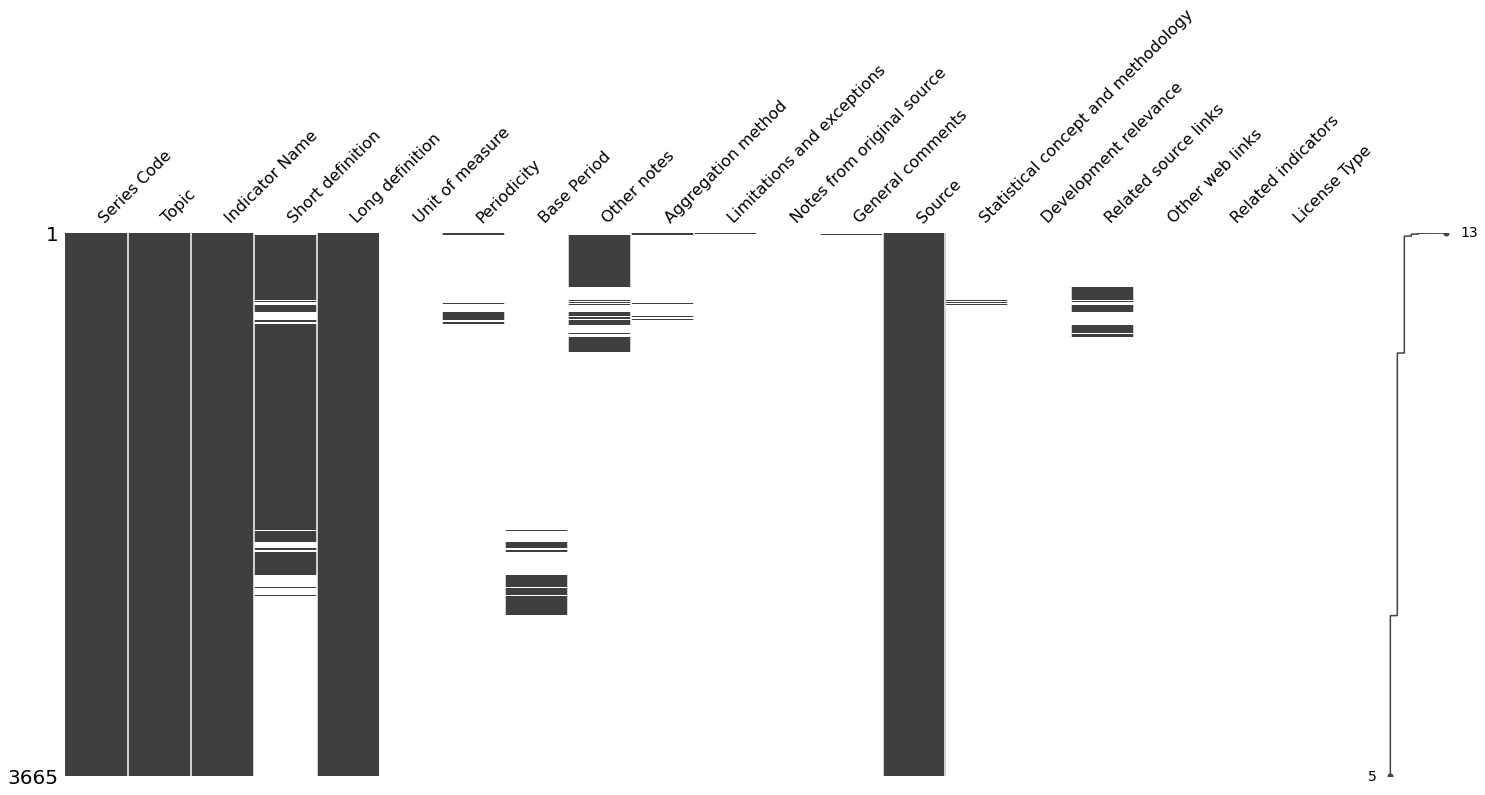

In [102]:
sorted_dataSeries = msno.nullity_sort(dataSeries, sort = 'descending') #on classe les données de dataSeries des lignes les plus complètes au moins complètes
msno.matrix(sorted_dataSeries)

#### Description du contenu du fichier
Ce fichier contient donc 3665 lignes et 20 variables, voici les variables observées :

In [103]:
dataSeries.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type'],
      dtype='object')

In [201]:
pd.concat([dataSeries.describe(include='all'), dataSeries.dtypes.to_frame(name='type').T])

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type
count,3665,3665,3665,2156,3665,0,99,314,552,47,14,0,14,3665,23,3,215,0,0,0
unique,3665,37,3665,1169,2060,NaN,1,4,14,3,9,NaN,8,31,2,1,1,NaN,NaN,NaN
top,PRJ.ATT.2064.1.MA,Learning Outcomes,UIS: Rate of out-of-school children of primary...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,Annual,Projections (2010 to 2100),EGRA,Weighted average,Data should be used cautiously because of diff...,NaN,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN
freq,1,1046,1,215,215,NaN,99,308,403,31,3,NaN,3,1269,20,3,215,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Series Code 
On devrait retrouver ici une variable *qualitative nominale* qui fait référence au code d'identification d'une série :

In [104]:
SeriesScEff = dataSeries["Series Code"].value_counts() 
SeriesScModa = SeriesScEff.index 

tabSeriesSc = pd.DataFrame(SeriesScModa, columns = ["Series Code"]) 
tabSeriesSc["n"] = SeriesScEff.values 
tabSeriesSc["f"] = tabSeriesSc["n"]/tabSeriesSc["n"].sum() 
tabSeriesSc

,Series Code,n,f
0,PRJ.ATT.2064.1.MA,1,0.000273
1,BAR.PRM.CMPT.5559.FE.ZS,1,0.000273
2,LO.EGRA.CWPM.HAR.2GRD,1,0.000273
3,HH.DHS.PCR.Q3,1,0.000273
4,SABER.SCH.ATNM.GOAL3.LVL6,1,0.000273
...,...,...,...
3660,SE.PRM.CMPL.FE.ZS,1,0.000273
3661,PRJ.POP.2024.3.MF,1,0.000273
3662,UIS.NAR.1.RUR,1,0.000273
3663,SABER.SCH.ATNM.GOAL1.LVL5,1,0.000273


On observe donc 3665 modalités apparaissant une seule fois, comme le nom du fichier l'indique, il semble contenir une liste de séries. Au vu du format de "Series Code", il semblerait que l'on retrouves les "Indicator Code" du fichier "Data.csv"
##### Topic :
Ou "Sujet" doit nous donner des informations sur le sujet du "Series Code", on attends donc une variable *qualitative nominale* :

In [105]:
SeriesTopicEff = dataSeries["Topic"].value_counts() 
SeriesTopicModa = SeriesTopicEff.index 

tabSeriesTopic = pd.DataFrame(SeriesTopicModa, columns = ["Topic"]) 
tabSeriesTopic["n"] = SeriesTopicEff.values 
tabSeriesTopic["f"] = tabSeriesTopic["n"]/tabSeriesTopic["n"].sum() 
tabSeriesTopic

,Topic,n,f
0,Learning Outcomes,1046,0.285402
1,Attainment,733,0.200000
2,Education Equality,426,0.116235
3,Secondary,256,0.069850
4,Primary,248,0.067667
5,Population,213,0.058117
6,Tertiary,158,0.043111
7,Teachers,137,0.037381
8,Expenditures,93,0.025375
9,Engaging the Private Sector (SABER),51,0.013915


Cette variable présente donc 37 modalités.
##### Indicator Name :
On devrait avoir dans cette variable les noms des indicateurs, soit une variable *qualitative nominale* :

In [106]:
SeriesInEff = dataSeries["Indicator Name"].value_counts() 
SeriesInModa = SeriesInEff.index 

tabSeriesIn = pd.DataFrame(SeriesInModa, columns = ["Indicator Name"]) 
tabSeriesIn["n"] = SeriesInEff.values 
tabSeriesIn["f"] = tabSeriesIn["n"]/tabSeriesIn["n"].sum() 
tabSeriesIn

,Indicator Name,n,f
0,UIS: Rate of out-of-school children of primary...,1,0.000273
1,UIS: Rate of out-of-school adolescents of lowe...,1,0.000273
2,PIAAC: Mean Adult Numeracy Proficiency. Male,1,0.000273
3,SABER: (School Autonomy and Accountability) Po...,1,0.000273
4,PIAAC: Distribution of Adult Numeracy Scores: ...,1,0.000273
...,...,...,...
3660,DHS: Typology of out-of-school children. Prima...,1,0.000273
3661,Projection: Percentage of the population age 2...,1,0.000273
3662,UIS: Rate of out-of-school children of primary...,1,0.000273
3663,LLECE: Female 6th grade students by mathematic...,1,0.000273


On retrouve ici 3665 modalités, comme pour "Series Code". 
##### Autres variables du fichier
Les autres variables du fichier contiennent des informations générales sur les individus, les séries. De plus, ces variables présentent un très grand nombre de données manquantes. Nous ne les analyserons donc pas. 
## B - Synthèse des fichiers : <a name="B"></a>
En résumé chaque fichier contient des informations différentes : 
- Country.csv : Informations générales sur les pays
- Country-Series.csv : Des indicateurs d'ordre générale comme la population du pays
- Data.csv : Les valeurs d'indicateurs observés sur chaques pays de 1970 à 2017 et de prévision de 2020 à 2100
- FootNote.csv : Des précisions pour un indicateur donné et une année d'observation
- Series.csv : Des précisions sur les indicateurs 

On va maintenant voir les liens entre les fichiers. En effet, on a pu remarquer en regardant le contenu de chaque fichiers des variables communes entre plusieurs fichiers : 
- Country Code
- Series Code / Indicator Code

Afin de voir les liens entre les fichiers nous allons réaliser des jointures. 
### B.1 - Jointures sur "Country Code" : <a name="B.1"></a>
La variable "Country Code" est présente dans 4 fichiers sur 5 :
- Country.csv : 241 fois
- Country-Series.csv : 211 fois
- Data.csv : 242 fois
- FootNote.csv : 239 fois

Nous allons donc réaliser toutes les jointures possibles entre ces fichiers, soit 6. Comme le plus petit nombre de modalités se trouves dans Country-Series.csv avec 211 modalités, on s'attends que ce fichier soit le fichier discriminant et qu'on l'on travailles avec, au maximum, 211 modalités. De plus, on a vu précédement que "Country Code" peux faire référence à des regroupement de pays que l'on exclura de notre étude car on souhaites se focaliser sur les pays uniquement, pays qui sont au nombre de 197 d'après l'ONU. 
#### Country.csv & Country-Series.csv :

In [107]:
#On récupère les modalités de "Country Code" de Country.csv et de "CountryCode" de Country-Series.csv
tCountryCc = tabCountryCc["Country Code"]
tCsCc = tabCsCc["CountryCode"]

#On réalise une jointure externe afin de pouvoir mettre en évidence les valeurs de "Country Code" et "CountryCode" qui sont différentes
tJoinCountryCsCc = pd.merge(tCountryCc, tCsCc, left_on="Country Code", right_on="CountryCode", how="outer" )
tJoinCountryCsCc

#On ajoutes une colonne de comparaison pour faire ressortir les valeurs différentes 
tJoinCountryCsCc["Compare"] = tJoinCountryCsCc["Country Code"].eq(tJoinCountryCsCc["CountryCode"])
tJoinCompCountryCsCc = tJoinCountryCsCc[tJoinCountryCsCc["Compare"]==False]
tJoinCompCountryCsCc

,Country Code,CountryCode,Compare
10,MNA,NaN,False
18,NRU,NaN,False
23,UMC,NaN,False
26,EAP,NaN,False
30,CUW,NaN,False
34,LCN,NaN,False
39,LMY,NaN,False
48,WLD,NaN,False
66,SXM,NaN,False
69,MEA,NaN,False


In [108]:
#on calcule la longueur du tableau pour voir le nombre de différences
len(tJoinCompCountryCsCc)

30

241 - 211 = 30, donc tous les pays de Country-Series.csv sont inclus dans Country.csv. Faisons une nouvelle jointure afin de voir le nom de pays qui ne sont pas dans Country-Series.csv :

In [109]:
tJoinCompCountryName = tJoinCompCountryCsCc["Country Code"] #on récupère les codes des pays qui ne sont pas dans Country-Series.csv

tCountrySnCc = pd.DataFrame(dataCountry, columns = ["Short Name","Country Code"]) #on récupère le tableau de correspondance des Country Code et des Short Name de Country.csv

tJoinCountryName = pd.merge(tJoinCompCountryName, tCountrySnCc, left_on="Country Code", right_on="Country Code")#on fait la jointure
tJoinCountryName

,Country Code,Short Name
0,MNA,Middle East & North Africa (developing only)
1,NRU,Nauru
2,UMC,Upper middle income
3,EAP,East Asia & Pacific (developing only)
4,CUW,Curaçao
5,LCN,Latin America & Caribbean (all income levels)
6,LMY,Low & middle income
7,WLD,World
8,SXM,Sint Maarten (Dutch part)
9,MEA,Middle East & North Africa (all income levels)


#### Country.csv & Data.csv :

In [110]:
#On récupère les modalités de "Country Code" de Data.csv
tDataCc = pd.DataFrame(tabDataCc, columns = ["Country Code"])
tDataCc.columns = ["Data Country Code"]

#jointure externe
tJoinCountryDataCc = pd.merge(tCountryCc, tDataCc, left_on="Country Code", right_on="Data Country Code", how="outer" )
tJoinCountryDataCc

,Country Code,Data Country Code
0,LSO,LSO
1,TJK,TJK
2,PHL,PHL
3,GNQ,GNQ
4,MNE,MNE
...,...,...
237,LMC,LMC
238,JAM,JAM
239,XKX,XKX
240,ARG,ARG


On observes ici que Data.csv contient un Country Code en plus que Country.csv, on s'y attendait, il s'agit du code "VGB", allons rechercher dans Data.csv à quel pays il fait référence :

In [111]:
data.iloc[np.where(data["Country Code"]=="VGB")]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
190580,British Virgin Islands,VGB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190581,British Virgin Islands,VGB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190582,British Virgin Islands,VGB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190583,British Virgin Islands,VGB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190584,British Virgin Islands,VGB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194240,British Virgin Islands,VGB,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194241,British Virgin Islands,VGB,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194242,British Virgin Islands,VGB,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194243,British Virgin Islands,VGB,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il s'agit donc de "British Virgin Islands", de plus il n'a que des valeurs manquantes pour les observations de ses indicateurs, nous pouvons donc l'enlever de notre étude.
#### Country.csv & FootNote.csv :

In [112]:
#On récupère les modalités de "Country Code" de FootNote.csv
tFootNoteCc = pd.DataFrame(tabFootNoteCc, columns = ["CountryCode"])
tFootNoteCc.columns = ["FootNote Country Code"]

#jointure externe
tJoinCountryFnCc = pd.merge(tCountryCc, tFootNoteCc, left_on="Country Code", right_on="FootNote Country Code", how="outer" )
tJoinCountryFnCc

#On ajoutes une colonne de comparaison pour faire ressortir les valeurs différentes 
tJoinCountryFnCc["Compare"] = tJoinCountryFnCc["Country Code"].eq(tJoinCountryFnCc["FootNote Country Code"])
tJoinCompCountryFnCc = tJoinCountryFnCc[tJoinCountryFnCc["Compare"]==False]
tJoinCompCountryFnCc

,Country Code,FootNote Country Code,Compare
66,SXM,NaN,False
171,GRL,NaN,False
189,MAF,NaN,False
241,NaN,VGB,False


In [113]:
dataCountry.iloc[np.where(dataCountry["Country Code"]=="GRL")]
data.iloc[np.where(data["Country Code"]=="GRL")]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
370165,Greenland,GRL,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370166,Greenland,GRL,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370167,Greenland,GRL,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370168,Greenland,GRL,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370169,Greenland,GRL,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373825,Greenland,GRL,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373826,Greenland,GRL,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373827,Greenland,GRL,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373828,Greenland,GRL,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
data.iloc[np.where(data["Country Code"]=="SXM")]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
718340,Sint Maarten (Dutch part),SXM,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718341,Sint Maarten (Dutch part),SXM,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718342,Sint Maarten (Dutch part),SXM,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718343,Sint Maarten (Dutch part),SXM,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718344,Sint Maarten (Dutch part),SXM,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722000,Sint Maarten (Dutch part),SXM,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722001,Sint Maarten (Dutch part),SXM,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722002,Sint Maarten (Dutch part),SXM,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722003,Sint Maarten (Dutch part),SXM,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
data.iloc[np.where(data["Country Code"]=="MAF")]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
758655,St. Martin (French part),MAF,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758656,St. Martin (French part),MAF,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758657,St. Martin (French part),MAF,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758658,St. Martin (French part),MAF,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758659,St. Martin (French part),MAF,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762315,St. Martin (French part),MAF,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762316,St. Martin (French part),MAF,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762317,St. Martin (French part),MAF,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762318,St. Martin (French part),MAF,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data.csv & FootNote.csv :

In [116]:
#jointure externe
tJoinDataFnCc = pd.merge(tDataCc, tFootNoteCc, left_on="Data Country Code", right_on="FootNote Country Code", how="outer" )
tJoinDataFnCc

#On ajoutes une colonne de comparaison pour faire ressortir les valeurs différentes 
tJoinDataFnCc["Compare"] = tJoinDataFnCc["Data Country Code"].eq(tJoinDataFnCc["FootNote Country Code"])
tJoinCompDataFnCc = tJoinDataFnCc[tJoinDataFnCc["Compare"]==False]
tJoinCompDataFnCc

,Data Country Code,FootNote Country Code,Compare
8,MAF,NaN,False
11,GRL,NaN,False
232,SXM,NaN,False


#### Data.csv & Country-Series.csv :

In [117]:
#jointure externe
tJoinDataCsCc = pd.merge(tDataCc, tCsCc, left_on="Data Country Code", right_on="CountryCode", how="outer" )
tJoinDataCsCc

#On ajoutes une colonne de comparaison pour faire ressortir les valeurs différentes 
tJoinDataCsCc["Compare"] = tJoinDataCsCc["Data Country Code"].eq(tJoinDataCsCc["CountryCode"])
tJoinCompDataCsCc = tJoinDataCsCc[tJoinDataCsCc["Compare"]==False]
tJoinCompDataCsCc

,Data Country Code,CountryCode,Compare
0,LAC,NaN,False
2,NAC,NaN,False
3,LCN,NaN,False
8,MAF,NaN,False
10,EMU,NaN,False
15,ECA,NaN,False
18,OED,NaN,False
26,LDC,NaN,False
33,MEA,NaN,False
51,VGB,NaN,False


In [118]:
len(tJoinCompDataCsCc)

31

In [119]:
tJoinCompDataCountryName = tJoinCompDataCsCc["Data Country Code"] #on récupère les codes des pays qui ne sont pas dans Country-Series.csv

tDataCnCc = pd.DataFrame(data, columns = ["Country Name","Country Code"]) #on récupère le tableau de correspondance des Country Code et des Country Name de Data.csv

tJoinDataCnCc = pd.merge(tJoinCompDataCountryName, tDataCnCc, left_on="Data Country Code", right_on="Country Code")#on fait la jointure
tJoinDataCnCc.drop_duplicates()

,Data Country Code,Country Name,Country Code
0,LAC,Latin America & Caribbean (excluding high income),LAC
3665,NAC,North America,NAC
7330,LCN,Latin America & Caribbean,LCN
10995,MAF,St. Martin (French part),MAF
14660,EMU,Euro area,EMU
18325,ECA,Europe & Central Asia (excluding high income),ECA
21990,OED,OECD members,OED
25655,LDC,Least developed countries: UN classification,LDC
29320,MEA,Middle East & North Africa,MEA
32985,VGB,British Virgin Islands,VGB


#### Jointure entre FootNote.csv et Country-Series.csv :

In [120]:
tJoinFnCsCc = pd.merge(tFootNoteCc, tCsCc, left_on="FootNote Country Code", right_on="CountryCode", how="outer" )
tJoinFnCsCc

,FootNote Country Code,CountryCode
0,LIC,NaN
1,CYP,CYP
2,LDC,NaN
3,SSA,NaN
4,SSF,NaN
...,...,...
235,CUW,NaN
236,XKX,XKX
237,MNP,MNP
238,FRO,FRO


In [121]:
#jointure externe
tJoinFnCsCc = pd.merge(tFootNoteCc, tCsCc, left_on="FootNote Country Code", right_on="CountryCode", how="outer" )
tJoinFnCsCc

#On ajoutes une colonne de comparaison pour faire ressortir les valeurs différentes 
tJoinFnCsCc["Compare"] = tJoinFnCsCc["FootNote Country Code"].eq(tJoinFnCsCc["CountryCode"])
tJoinCompFnCsCc = tJoinFnCsCc[tJoinFnCsCc["Compare"]==False]
tJoinCompFnCsCc

,FootNote Country Code,CountryCode,Compare
0,LIC,NaN,False
2,LDC,NaN,False
3,SSA,NaN,False
4,SSF,NaN,False
5,HPC,NaN,False
6,LAC,NaN,False
7,MIC,NaN,False
8,LMY,NaN,False
9,LCN,NaN,False
10,WLD,NaN,False


In [122]:
len(tJoinCompFnCsCc)

30

In [123]:
tJoinCompCountryNameFnCs = tJoinCompFnCsCc["FootNote Country Code"] #on récupère les codes des pays qui ne sont pas dans Country-Series.csv


tJoinCountryNameFnCs = pd.merge(tJoinCompFnCsCc, tCountrySnCc, left_on="FootNote Country Code", right_on="Country Code")#on fait la jointure
tJoinCountryNameFnCs

,FootNote Country Code,CountryCode,Compare,Short Name,Country Code
0,LIC,NaN,False,Low income,LIC
1,LDC,NaN,False,Least developed countries: UN classification,LDC
2,SSA,NaN,False,Sub-Saharan Africa (developing only),SSA
3,SSF,NaN,False,Sub-Saharan Africa (all income levels),SSF
4,HPC,NaN,False,Heavily indebted poor countries (HIPC),HPC
5,LAC,NaN,False,Latin America & Caribbean (developing only),LAC
6,MIC,NaN,False,Middle income,MIC
7,LMY,NaN,False,Low & middle income,LMY
8,LCN,NaN,False,Latin America & Caribbean (all income levels),LCN
9,WLD,NaN,False,World,WLD


### B.2 - Jointures sur "Series Code"/"Indicator Code" : <a name="B.2"></a>
On retrouves cette variable dans 4 fichiers sur 5 :
- CountrySeries.csv : 21 fois
- Series.csv : 3665 fois
- FootNote.csv : 1558 fois
- Data.csv : 3665 fois, sous le nom de variable "Indicator Code", qui semble avoir exactement le même format. Nous allons vérifier ça en faisant les jointures.

Comme pour "Country Code" nous allons effectuer les 6 jointures possible entre les fichiers afin de comprendre les liens entre les fichiers et voir les "Series Code" que l'on va pouvoir sélectionner.

In [124]:
#on récupère les tableaux des modalités de "SeriesCode" de chacun des fichiers

#Country-Series
tCsSc = pd.DataFrame(tabCsSc, columns=["SeriesCode"])
tCsSc.columns = ["CS Series Code"]

#Series
tSeriesSc = pd.DataFrame(tabSeriesSc, columns=["Series Code"])
tSeriesSc.columns = ["Series Series Code"]

#FootNote
tFnSc = pd.DataFrame(tabFootNoteSc, columns=["SeriesCode"])
tFnSc.columns = ["FN Series Code"]

#Data
tDataIc = pd.DataFrame(tabDataIc, columns=["Indicator Code"])
tDataIc.columns = ["Data Indicator Code"]

#### Country-Series.csv & Series.csv

In [125]:
#On réalise une jointure externe afin de pouvoir mettre en évidence les valeurs de "SeriesCode" et "Series Code" qui sont différentes
tJoinScodeCsS = pd.merge(tCsSc, tSeriesSc, left_on="CS Series Code", right_on="Series Series Code")
tJoinScodeCsS

,CS Series Code,Series Series Code
0,SP.POP.GROW,SP.POP.GROW
1,SP.POP.TOTL,SP.POP.TOTL
2,NY.GDP.PCAP.PP.CD,NY.GDP.PCAP.PP.CD
3,NY.GDP.PCAP.PP.KD,NY.GDP.PCAP.PP.KD
4,NY.GNP.PCAP.PP.CD,NY.GNP.PCAP.PP.CD
5,NY.GDP.MKTP.PP.CD,NY.GDP.MKTP.PP.CD
6,NY.GNP.MKTP.PP.CD,NY.GNP.MKTP.PP.CD
7,NY.GDP.MKTP.PP.KD,NY.GDP.MKTP.PP.KD
8,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.FE.ZS
9,SP.POP.0014.TO.ZS,SP.POP.0014.TO.ZS


Grâce à cette jointure interne nous avons pu vérifier que toutes les modalités de "Series Code" de Country-Series, au nombre de 21, sont bien incluses dans le fichier Data.csv
#### Country-Series.csv & FootNote.csv

In [126]:
#On réalise une jointure externe afin de pouvoir mettre en évidence les valeurs de "SeriesCode" et "Series Code" qui sont différentes
tJoinScodeCsFn = pd.merge(tCsSc, tFnSc, left_on="CS Series Code", right_on="FN Series Code")
tJoinScodeCsFn

,CS Series Code,FN Series Code
0,SP.POP.GROW,SP.POP.GROW
1,SP.POP.TOTL,SP.POP.TOTL
2,NY.GDP.PCAP.PP.CD,NY.GDP.PCAP.PP.CD
3,NY.GDP.PCAP.PP.KD,NY.GDP.PCAP.PP.KD
4,NY.GNP.PCAP.PP.CD,NY.GNP.PCAP.PP.CD
5,NY.GDP.MKTP.PP.CD,NY.GDP.MKTP.PP.CD
6,NY.GNP.MKTP.PP.CD,NY.GNP.MKTP.PP.CD
7,NY.GDP.MKTP.PP.KD,NY.GDP.MKTP.PP.KD
8,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.FE.ZS
9,SP.POP.0014.TO.ZS,SP.POP.0014.TO.ZS


Grâce à cette jointure interne nous avons pu vérifier que toutes les modalités de "Series Code" de Country-Series, au nombre de 21, sont bien incluses dans le fichier FootNote.csv
#### Country-Series.csv & Data.csv

In [127]:
#On réalise une jointure externe afin de pouvoir mettre en évidence les valeurs de "SeriesCode" et "Series Code" qui sont différentes
tJoinScodeCsFn = pd.merge(tCsSc, tDataIc, left_on="CS Series Code", right_on="Data Indicator Code")
tJoinScodeCsFn

,CS Series Code,Data Indicator Code
0,SP.POP.GROW,SP.POP.GROW
1,SP.POP.TOTL,SP.POP.TOTL
2,NY.GDP.PCAP.PP.CD,NY.GDP.PCAP.PP.CD
3,NY.GDP.PCAP.PP.KD,NY.GDP.PCAP.PP.KD
4,NY.GNP.PCAP.PP.CD,NY.GNP.PCAP.PP.CD
5,NY.GDP.MKTP.PP.CD,NY.GDP.MKTP.PP.CD
6,NY.GNP.MKTP.PP.CD,NY.GNP.MKTP.PP.CD
7,NY.GDP.MKTP.PP.KD,NY.GDP.MKTP.PP.KD
8,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.FE.ZS
9,SP.POP.0014.TO.ZS,SP.POP.0014.TO.ZS


Grâce à cette jointure interne nous avons pu vérifier que toutes les modalités de "Series Code" de Country-Series, au nombre de 21, sont bien incluses dans le fichier Data.csv
#### Series.csv & FootNote.csv

In [128]:
tJoinScodeSFn = pd.merge(tSeriesSc, tFnSc, left_on="Series Series Code", right_on="FN Series Code")
tJoinScodeSFn

,Series Series Code,FN Series Code
0,UIS.AIR.2.GPV.GPI,UIS.AIR.2.GPV.GPI
1,UIS.REPP.2.GPV.G2.M,UIS.REPP.2.GPV.G2.M
2,LO.PIAAC.TEC.YOU.1,LO.PIAAC.TEC.YOU.1
3,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.FE.ZS
4,LO.PIAAC.NUM.YOU.BE,LO.PIAAC.NUM.YOU.BE
...,...,...
1447,UIS.OAPP.1,UIS.OAPP.1
1448,UIS.R.1.G4.F,UIS.R.1.G4.F
1449,LO.PASEC.MAT5.MA,LO.PASEC.MAT5.MA
1450,SE.PRM.TENR.FE,SE.PRM.TENR.FE


In [129]:
#jointure externe
tJoinScodeSFn = pd.merge(tSeriesSc, tFnSc, left_on="Series Series Code", right_on="FN Series Code", how="outer")

#On ajoutes une colonne de comparaison pour faire ressortir les valeurs différentes 
tJoinScodeSFn["Compare"] = tJoinScodeSFn["Series Series Code"].eq(tJoinScodeSFn["FN Series Code"])
tJoinCompScodeSFn = tJoinScodeSFn[tJoinScodeSFn["Compare"]==False]
tJoinCompScodeSFn

,Series Series Code,FN Series Code,Compare
0,PRJ.ATT.2064.1.MA,NaN,False
1,BAR.PRM.CMPT.5559.FE.ZS,NaN,False
2,LO.EGRA.CWPM.HAR.2GRD,NaN,False
3,HH.DHS.PCR.Q3,NaN,False
4,SABER.SCH.ATNM.GOAL3.LVL6,NaN,False
...,...,...,...
3766,NaN,UIS.XGDP.56.FSgov,False
3767,NaN,UIS.LP.Ag65.F,False
3768,NaN,UIS.XGovExp.IMF.0,False
3769,NaN,UIS.XGDP.0.FSgov,False


On remarque ici la présence de caractères en minuscule dans le format de "Series Code" de FootNote.csv, nous allons alors mettre tout les caractères en majuscule, dans les deux tableaux et refaire une jointure :

In [130]:
tFnSc["FN Series Code"] = tFnSc["FN Series Code"].str.upper()
tSeriesSc["Series Series Code"] = tSeriesSc["Series Series Code"].str.upper()

#jointure externe
tJoinScodeSFn = pd.merge(tSeriesSc, tFnSc, left_on="Series Series Code", right_on="FN Series Code", how="outer")

#On ajoutes une colonne de comparaison pour faire ressortir les valeurs différentes 
tJoinScodeSFn["Compare"] = tJoinScodeSFn["Series Series Code"].eq(tJoinScodeSFn["FN Series Code"])
tJoinCompScodeSFn = tJoinScodeSFn[tJoinScodeSFn["Compare"]==False]
tJoinCompScodeSFn

,Series Series Code,FN Series Code,Compare
0,PRJ.ATT.2064.1.MA,NaN,False
1,BAR.PRM.CMPT.5559.FE.ZS,NaN,False
2,LO.EGRA.CWPM.HAR.2GRD,NaN,False
3,HH.DHS.PCR.Q3,NaN,False
4,SABER.SCH.ATNM.GOAL3.LVL6,NaN,False
...,...,...,...
3738,UIS.NAR.1.RUR,NaN,False
3739,SABER.SCH.ATNM.GOAL1.LVL5,NaN,False
3740,BAR.POP.5559,NaN,False
3741,NaN,UIS.OE.56.40510,False


On remarque alors que l'on arrive à récupérer des modalités mais pas toutes. On va essayer de supprimer les possibles espaces en début et fin de code qui pourraient être présent mais que l'on ne voit pas :

In [131]:
tFnSc["FN Series Code"] = tFnSc["FN Series Code"].str.strip()
tSeriesSc["Series Series Code"] = tSeriesSc["Series Series Code"].str.strip()

#jointure externe
tJoinScodeSFn = pd.merge(tSeriesSc, tFnSc, left_on="Series Series Code", right_on="FN Series Code", how="outer")

#On ajoutes une colonne de comparaison pour faire ressortir les valeurs différentes 
tJoinScodeSFn["Compare"] = tJoinScodeSFn["Series Series Code"].eq(tJoinScodeSFn["FN Series Code"])
tJoinCompScodeSFn = tJoinScodeSFn[tJoinScodeSFn["Compare"]==False]
tJoinCompScodeSFn

,Series Series Code,FN Series Code,Compare
0,PRJ.ATT.2064.1.MA,NaN,False
1,BAR.PRM.CMPT.5559.FE.ZS,NaN,False
2,LO.EGRA.CWPM.HAR.2GRD,NaN,False
3,HH.DHS.PCR.Q3,NaN,False
4,SABER.SCH.ATNM.GOAL3.LVL6,NaN,False
...,...,...,...
3735,HH.DHS.OOST.X.U,NaN,False
3737,PRJ.POP.2024.3.MF,NaN,False
3738,UIS.NAR.1.RUR,NaN,False
3739,SABER.SCH.ATNM.GOAL1.LVL5,NaN,False


On à l'air d'avoir réussi à récupérer les modalités, vérifions le à l'aide d'une jointure interne :

In [132]:
tJoinScodeSFn = pd.merge(tSeriesSc, tFnSc, left_on="Series Series Code", right_on="FN Series Code")
tJoinScodeSFn

,Series Series Code,FN Series Code
0,UIS.AIR.2.GPV.GPI,UIS.AIR.2.GPV.GPI
1,UIS.REPP.2.GPV.G2.M,UIS.REPP.2.GPV.G2.M
2,LO.PIAAC.TEC.YOU.1,LO.PIAAC.TEC.YOU.1
3,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.FE.ZS
4,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.FE.ZS
...,...,...
1553,UIS.OAPP.1,UIS.OAPP.1
1554,UIS.R.1.G4.F,UIS.R.1.G4.F
1555,LO.PASEC.MAT5.MA,LO.PASEC.MAT5.MA
1556,SE.PRM.TENR.FE,SE.PRM.TENR.FE


On retrouve bien ici les 1558 modalités "Series Code" du fichier FootNote.csv
#### Series.csv & Data.csv

In [133]:
tDataIc["Data Indicator Code"] = tDataIc["Data Indicator Code"].str.upper()
tDataIc["Data Indicator Code"] = tDataIc["Data Indicator Code"].str.strip()

tJoinScodeSData = pd.merge(tSeriesSc, tDataIc, left_on="Series Series Code", right_on="Data Indicator Code")
tJoinScodeSData

,Series Series Code,Data Indicator Code
0,PRJ.ATT.2064.1.MA,PRJ.ATT.2064.1.MA
1,BAR.PRM.CMPT.5559.FE.ZS,BAR.PRM.CMPT.5559.FE.ZS
2,LO.EGRA.CWPM.HAR.2GRD,LO.EGRA.CWPM.HAR.2GRD
3,HH.DHS.PCR.Q3,HH.DHS.PCR.Q3
4,SABER.SCH.ATNM.GOAL3.LVL6,SABER.SCH.ATNM.GOAL3.LVL6
...,...,...
3660,SE.PRM.CMPL.FE.ZS,SE.PRM.CMPL.FE.ZS
3661,PRJ.POP.2024.3.MF,PRJ.POP.2024.3.MF
3662,UIS.NAR.1.RUR,UIS.NAR.1.RUR
3663,SABER.SCH.ATNM.GOAL1.LVL5,SABER.SCH.ATNM.GOAL1.LVL5


Les deux fichiers contiennent bien les mêmes code de série/d'indicateur, les modalités de "Indicator Code" de Data.csv sont donc les mêmes que celle de "Series Code" du fichier Series.csv
#### FootNote.csv & Data.csv

In [134]:
tJoinScodeFnData = pd.merge(tFnSc, tDataIc, left_on="FN Series Code", right_on="Data Indicator Code")
tJoinScodeFnData

,FN Series Code,Data Indicator Code
0,SH.DYN.MORT,SH.DYN.MORT
1,SE.PRM.AGES,SE.PRM.AGES
2,SE.PRM.DURS,SE.PRM.DURS
3,SE.SEC.DURS,SE.SEC.DURS
4,SE.SEC.AGES,SE.SEC.AGES
...,...,...
1553,SABER.ERL.CHLD.GOAL3.LVL2,SABER.ERL.CHLD.GOAL3.LVL2
1554,UIS.AFR.SCHBSP.2.PU.WOTOIL,UIS.AFR.SCHBSP.2.PU.WOTOIL
1555,SABER.EMIS.GOAL4.LVL4,SABER.EMIS.GOAL4.LVL4
1556,SABER.EMIS.GOAL2.LVL4,SABER.EMIS.GOAL2.LVL4


## C - Sélection des indicateurs : <a name="C"></a>
### C.1 - Indicateurs généraux : <a name="C.1"></a>
On va créer un DataFrame contenant des informations générales sur les pays :
- 'Country Code' afin de pouvoir effectuer des jointures
- 'Short Name' afin de pouvoir afficher le nom des pays
- 'Region' pour pouvoir faire des statistiques sur des groupes de pays par régions
- 'Income Group' car c'est une donnée qui est intéressante pour la cible de la Start-Up

In [135]:
dataWorkCountry = pd.DataFrame(dataCountry, columns =['Country Code','Short Name','Region','Income Group'])
dataWorkCountry

,Country Code,Short Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income: nonOECD
...,...,...,...,...
236,XKX,Kosovo,Europe & Central Asia,Lower middle income
237,YEM,Yemen,Middle East & North Africa,Lower middle income
238,ZAF,South Africa,Sub-Saharan Africa,Upper middle income
239,ZMB,Zambia,Sub-Saharan Africa,Lower middle income


On récupère uniquement les pays 'uniques' en retirant les individus représentant des régions géographiques :

In [136]:
workCountry = dataWorkCountry[dataWorkCountry.Region.isnull() == False]
workCountry

,Country Code,Short Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income: nonOECD
...,...,...,...,...
236,XKX,Kosovo,Europe & Central Asia,Lower middle income
237,YEM,Yemen,Middle East & North Africa,Lower middle income
238,ZAF,South Africa,Sub-Saharan Africa,Upper middle income
239,ZMB,Zambia,Sub-Saharan Africa,Lower middle income


### C.2 - Indicateurs "Education" : <a name="C.2"></a>
Pour faire une sélection des indicateurs je me suis servi de [l'outil de requête de la Banque Mondiale](https://databank.worldbank.org/reports.aspx?source=Education%20Statistics), en effet cet outil nous permet de visualiser plus simplement les indicateurs à notre disposition via l'onglet "Series". <br>
Sachant que la Start-Up cible un public ayant un niveau Lycée/Université j'ai choisi de sélectionner, dans un premier temps, les indicateurs suivants : 
- Sujet : Expenditures (Dépenses) 
    - Les dépenses du gouvernement pour l'enseignement secondaire supérieur (Lycée), en % du PIB : UIS.XGDP.3.FSGOV
    - Les dépenses du gouvernement pour l'enseignement post-secondaire, non-tertiaire, (Formations professionnelles post-bac) en % du PIB : UIS.XGDP.4.FSGOV
    - Les dépenses du gouvernement pour l'enseignement tertiaire (Cursus post-bac universitaires), en % du PIB : UIS.XGDP.56.FSGOV
- Learning Outcomes (Evaluation du niveau)
    - PIAAC (Programme for the International Assessment of Adult Competencies), soit le Programme pour l'évaluation internationale des compétences des adultes. Il existe d'autres études pour évaluer le niveau des compétences seulement le PIAAC est la seule enquête qui se base sur des adultes de 16 à 65 ans, les autres études sont effectuées sur des jeunes de 15 ans au maximum ce qui ne correspond pas à la cible visée par la Start-Up.
        - Moyenne des compétences en calcul des jeunes adultes : LO.PIAAC.NUM.YOU
        - Moyenne des compétences litéraires des jeunes adultes : LO.PIAAC.LIT.YOU
- Gross enrolment ratio (Taux de scolarisation) 
    - Dans l'enseignement secondaire supérieur (Lycée) : SE.SEC.ENRR.UP
    - Dans l'enseignement post-secondaire, non-tertiaire (Formations Pro post-bac) : UIS.GER.4
    - Dans l'enseignement tertiaire (Formations universitaires post-bac ) : SE.TER.ENRR
- Percentage of population age 15+, with secondary and tertiary schooling (Completed and Incomplete)
    - Barro-Lee: Percentage of population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)(BAR.SEC.ICMP.15UP.ZS)
    - Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary(BAR.SEC.CMPT.15UP.ZS)
    - Barro-Lee: Percentage of population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary)(BAR.TER.ICMP.15UP.ZS)
    - Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary(BAR.TER.CMPT.15UP.ZS)
- Wittgenstein Projection : Percentage of the total population by highest level of educational attainment :
    - Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total(PRJ.ATT.ALL.3.MF)
    - Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total(PRJ.ATT.ALL.4.MF)
- UIS : Percentage of population age 25+, highest level of education :
    - UIS: Percentage of population age 25+ whose highest level of education is post-secondary non-tertiary, both sexes(UIS.EA.4.AG25T99)
    - UIS: Percentage of population age 25+ whose highest level of education is short cycle tertiary, both sexes(UIS.EA.5.AG25T99)
    - UIS: Percentage of population age 25+ with at least a completed short-cycle tertiary degree (ISCED 5 or higher). Total(UIS.EA.5T8.AG25T99)
- Teachers :
    - Proportion of teachers with the minimum required qualifications in upper secondary education, both sexes (%)(UIS.TRTP.3)
    - Percentage of qualified teachers in upper secondary education, both sexes (%)(UIS.QUTP.3)
    - Teacher attrition rate from upper secondary education, both sexes (%)(UIS.TATTRR.3.T)
    - Teachers in upper secondary education, both sexes (number)(UIS.T.3)
    - Teachers in post-secondary non-tertiary education, both sexes (number)(UIS.T.4)
    - Teachers in tertiary education ISCED 5 programmes, both sexes (number)(UIS.T.5)
    - Teachers in tertiary education ISCED 6, 7 and 8 programmes, both sexes (number)(UIS.ASTAFF.6T8)
    - Teachers in tertiary education programmes, both sexes (number)(SE.TER.TCHR)

En plus de ces indicateurs spécifiques à l'éducation j'ai sélectionné deux autres indicateurs d'ordre général :
- Internet users, per 100 people (Utilisateurs d'internets, pour 100 personnes) : IT.NET.USER.P2
- Population, total : SP.POP.TOTL

En effet, sachant que la Start-Up propose des formations en ligne, nous avons besoin de connaître la couverture internet du pays. 
Ensuite, dans les indicateurs spécifiques à l'éducation nous avons des indicateurs qui sont une quantité et que nous allons vouloir ramener à la population totale.

#### Tableau Historique des indicateurs observés :
On va réaliser un tableau centralisant la valeur la plus récente des indicateurs observés pour chaques pays ainsi que la date d'observation, de la manière suivante :
- Chaques lignes = 1 Pays
- En colonne : 2 colonnes pour 1 indicateur :
    - 1 colonne 'last value' : valeur de l'observation la plus récente de l'indicateur
    - 1 colonne 'max year' : année de l'observation la plus récente de l'indicateur

In [137]:
#on stocke toutes les valeurs des années de data.csv
years=data.columns[4:69]
years

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

In [138]:
#on récupère dataframe "de base", avec les informations générales sur les pays : "Region", "Income Group" ainsi que 
#les variables d'identification "Country Code" et "Short Name"
#il nous servira de base, on réalisera des jointures pour ajouter les colonnes des indicateurs
workCountryHist=workCountry
workCountryHist.reset_index(drop=True, inplace = True)
workCountryHist

,Country Code,Short Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income: nonOECD
...,...,...,...,...
209,XKX,Kosovo,Europe & Central Asia,Lower middle income
210,YEM,Yemen,Middle East & North Africa,Lower middle income
211,ZAF,South Africa,Sub-Saharan Africa,Upper middle income
212,ZMB,Zambia,Sub-Saharan Africa,Lower middle income


In [139]:
#on stockes les code des indicateurs que l'on à sélectionner précèdement
tabIndic=["UIS.XGDP.3.FSGOV","UIS.XGDP.4.FSGOV","UIS.XGDP.56.FSGOV",
          "LO.PIAAC.NUM.YOU","LO.PIAAC.LIT.YOU","SE.SEC.ENRR.UP",
         "UIS.GER.4","SE.TER.ENRR","BAR.SEC.ICMP.15UP.ZS",
         "BAR.SEC.CMPT.15UP.ZS","BAR.TER.ICMP.15UP.ZS","BAR.TER.CMPT.15UP.ZS",
         "UIS.EA.4.AG25T99","UIS.EA.5.AG25T99","UIS.EA.5T8.AG25T99",
          "IT.NET.USER.P2","SP.POP.TOTL","UIS.TRTP.3","UIS.QUTP.3",
         "UIS.TATTRR.3.T","UIS.T.3","UIS.T.4",
         "UIS.T.5","UIS.ASTAFF.6T8","SE.TER.TCHR",]
len(tabIndic)

25

In [140]:
#on ajoutes les colonnes "Code Indicateur + max year" et "Code Indicateur + last value" pour chaque indicateur sélectionnés
#à notre DataFrame de base
for codeIndic in tabIndic:
        colMy = codeIndic + ' max year'
        colLv = codeIndic + ' last value'
        df_temp = data[data['Indicator Code'] == codeIndic].reset_index(drop=True) 
        df_temp[colMy] =  df_temp[years].apply(lambda x: x[x.notnull()].index[-1] if len(x[x.notnull()])>0 else np.NAN, axis=1)
        df_temp[colLv] = df_temp[years].apply(lambda x: x[x.notnull()].iloc[-1] if len(x[x.notnull()])>0 else np.NAN, axis=1)
        workCountryHist = workCountryHist.merge(df_temp[['Country Code', colMy, colLv]], on="Country Code", how='left')

workCountryHist

,Country Code,Short Name,Region,Income Group,UIS.XGDP.3.FSGOV max year,UIS.XGDP.3.FSGOV last value,UIS.XGDP.4.FSGOV max year,UIS.XGDP.4.FSGOV last value,UIS.XGDP.56.FSGOV max year,UIS.XGDP.56.FSGOV last value,LO.PIAAC.NUM.YOU max year,LO.PIAAC.NUM.YOU last value,LO.PIAAC.LIT.YOU max year,LO.PIAAC.LIT.YOU last value,SE.SEC.ENRR.UP max year,SE.SEC.ENRR.UP last value,UIS.GER.4 max year,UIS.GER.4 last value,SE.TER.ENRR max year,SE.TER.ENRR last value,BAR.SEC.ICMP.15UP.ZS max year,BAR.SEC.ICMP.15UP.ZS last value,BAR.SEC.CMPT.15UP.ZS max year,BAR.SEC.CMPT.15UP.ZS last value,BAR.TER.ICMP.15UP.ZS max year,BAR.TER.ICMP.15UP.ZS last value,BAR.TER.CMPT.15UP.ZS max year,BAR.TER.CMPT.15UP.ZS last value,UIS.EA.4.AG25T99 max year,UIS.EA.4.AG25T99 last value,UIS.EA.5.AG25T99 max year,UIS.EA.5.AG25T99 last value,UIS.EA.5T8.AG25T99 max year,UIS.EA.5T8.AG25T99 last value,IT.NET.USER.P2 max year,IT.NET.USER.P2 last value,SP.POP.TOTL max year,SP.POP.TOTL last value,UIS.TRTP.3 max year,UIS.TRTP.3 last value,UIS.QUTP.3 max year,UIS.QUTP.3 last value,UIS.TATTRR.3.T max year,UIS.TATTRR.3.T last value,UIS.T.3 max year,UIS.T.3 last value,UIS.T.4 max year,UIS.T.4 last value,UIS.T.5 max year,UIS.T.5 last value,UIS.ASTAFF.6T8 max year,UIS.ASTAFF.6T8 last value,SE.TER.TCHR max year,SE.TER.TCHR last value
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,NaN,NaN,NaN,NaN,2005,0.53760,NaN,NaN,NaN,NaN,2012,106.325500,2000,9.95984,2015,15.273780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,16.395081,2016,93.542454,2016,104822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,86.0
1,AFG,Afghanistan,South Asia,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,42.613129,2014,11.15165,2014,8.662800,2010,16.09,2010,8.65,2010,6.88,2010,3.65,NaN,NaN,NaN,NaN,NaN,NaN,2016,10.595726,2016,34656032.0,NaN,NaN,NaN,NaN,NaN,NaN,2007,9278.000000,2003,817.0,NaN,NaN,NaN,NaN,2014,11002.0
2,AGO,Angola,Sub-Saharan Africa,Upper middle income,NaN,NaN,NaN,NaN,2006,0.19851,NaN,NaN,NaN,NaN,2011,21.098619,NaN,NaN,2015,9.308020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,13.000000,2016,28813463.0,NaN,NaN,NaN,NaN,NaN,NaN,2011,14804.000000,NaN,NaN,NaN,NaN,NaN,NaN,2015,8660.0
3,ALB,Albania,Europe & Central Asia,Upper middle income,NaN,NaN,NaN,NaN,2013,0.77585,NaN,NaN,NaN,NaN,2015,89.460274,2014,1.74154,2015,58.109951,2010,85.78,2010,42.90,2010,1.59,2010,0.93,2011,10.48725,NaN,NaN,2012,12.899660,2016,66.363445,2016,2876101.0,NaN,NaN,2014,98.33837,NaN,NaN,2014,8606.000000,NaN,NaN,NaN,NaN,NaN,NaN,2014,7367.0
4,AND,Andorra,Europe & Central Asia,High income: nonOECD,NaN,NaN,2011,0.03257,2014,0.18618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,11.43043,2014,10.27207,2015,21.129110,2016,97.930637,2016,77281.0,NaN,NaN,NaN,NaN,NaN,NaN,2005,68.000000,2014,3.0,NaN,NaN,NaN,NaN,2015,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,Kosovo,Europe & Central Asia,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1816200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,YEM,Yemen,Middle East & North Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,38.942299,2005,6.27625,2011,9.974600,2010,23.66,2010,10.68,2010,2.88,2010,1.50,NaN,NaN,NaN,NaN,NaN,NaN,2016,24.579208,2016,27584213.0,2013,94.551743,2013,97.89690,NaN,NaN,2013,29040.332031,2001,587.0,NaN,NaN,NaN,NaN,2007,7356.0
211,ZAF,South Africa,Sub-Saharan Africa,Upper middle income,NaN,NaN,2014,0.21097,2014,0.73796,NaN,NaN,NaN,NaN,2012,88.477249,2014,13.03850,2014,19.375071,2010,72.31,2010,53.90,2010,4.56,2010,0.32,2014,7.31417,NaN,NaN,2015,7.818120,2016,54.000000,2016,55908865.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,57666.0,NaN,NaN,NaN,NaN,1994,27099.0
2

In [141]:
#on normalise les colonnes, en les ramenant au % de la population : 
# 'UIS.T.3 last value', 'UIS.T.4 last value', 'UIS.T.5 last value', 'UIS.ASTAFF.6T8 last value', 'SE.TER.TCHR last value'
# par rapport à la population totale, de la colonne 'SP.POP.TOTL last value'
colNorm = ['UIS.T.3 last value','UIS.T.4 last value','UIS.T.5 last value','UIS.ASTAFF.6T8 last value','SE.TER.TCHR last value']

for codeInd in colNorm:
    workCountryHist[codeInd] = workCountryHist.apply(lambda x: x[codeInd]/x['SP.POP.TOTL last value'], axis=1)

workCountryHist

,Country Code,Short Name,Region,Income Group,UIS.XGDP.3.FSGOV max year,UIS.XGDP.3.FSGOV last value,UIS.XGDP.4.FSGOV max year,UIS.XGDP.4.FSGOV last value,UIS.XGDP.56.FSGOV max year,UIS.XGDP.56.FSGOV last value,LO.PIAAC.NUM.YOU max year,LO.PIAAC.NUM.YOU last value,LO.PIAAC.LIT.YOU max year,LO.PIAAC.LIT.YOU last value,SE.SEC.ENRR.UP max year,SE.SEC.ENRR.UP last value,UIS.GER.4 max year,UIS.GER.4 last value,SE.TER.ENRR max year,SE.TER.ENRR last value,BAR.SEC.ICMP.15UP.ZS max year,BAR.SEC.ICMP.15UP.ZS last value,BAR.SEC.CMPT.15UP.ZS max year,BAR.SEC.CMPT.15UP.ZS last value,BAR.TER.ICMP.15UP.ZS max year,BAR.TER.ICMP.15UP.ZS last value,BAR.TER.CMPT.15UP.ZS max year,BAR.TER.CMPT.15UP.ZS last value,UIS.EA.4.AG25T99 max year,UIS.EA.4.AG25T99 last value,UIS.EA.5.AG25T99 max year,UIS.EA.5.AG25T99 last value,UIS.EA.5T8.AG25T99 max year,UIS.EA.5T8.AG25T99 last value,IT.NET.USER.P2 max year,IT.NET.USER.P2 last value,SP.POP.TOTL max year,SP.POP.TOTL last value,UIS.TRTP.3 max year,UIS.TRTP.3 last value,UIS.QUTP.3 max year,UIS.QUTP.3 last value,UIS.TATTRR.3.T max year,UIS.TATTRR.3.T last value,UIS.T.3 max year,UIS.T.3 last value,UIS.T.4 max year,UIS.T.4 last value,UIS.T.5 max year,UIS.T.5 last value,UIS.ASTAFF.6T8 max year,UIS.ASTAFF.6T8 last value,SE.TER.TCHR max year,SE.TER.TCHR last value
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,NaN,NaN,NaN,NaN,2005,0.53760,NaN,NaN,NaN,NaN,2012,106.325500,2000,9.95984,2015,15.273780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,16.395081,2016,93.542454,2016,104822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,0.000820
1,AFG,Afghanistan,South Asia,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,42.613129,2014,11.15165,2014,8.662800,2010,16.09,2010,8.65,2010,6.88,2010,3.65,NaN,NaN,NaN,NaN,NaN,NaN,2016,10.595726,2016,34656032.0,NaN,NaN,NaN,NaN,NaN,NaN,2007,0.000268,2003,0.000024,NaN,NaN,NaN,NaN,2014,0.000317
2,AGO,Angola,Sub-Saharan Africa,Upper middle income,NaN,NaN,NaN,NaN,2006,0.19851,NaN,NaN,NaN,NaN,2011,21.098619,NaN,NaN,2015,9.308020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,13.000000,2016,28813463.0,NaN,NaN,NaN,NaN,NaN,NaN,2011,0.000514,NaN,NaN,NaN,NaN,NaN,NaN,2015,0.000301
3,ALB,Albania,Europe & Central Asia,Upper middle income,NaN,NaN,NaN,NaN,2013,0.77585,NaN,NaN,NaN,NaN,2015,89.460274,2014,1.74154,2015,58.109951,2010,85.78,2010,42.90,2010,1.59,2010,0.93,2011,10.48725,NaN,NaN,2012,12.899660,2016,66.363445,2016,2876101.0,NaN,NaN,2014,98.33837,NaN,NaN,2014,0.002992,NaN,NaN,NaN,NaN,NaN,NaN,2014,0.002561
4,AND,Andorra,Europe & Central Asia,High income: nonOECD,NaN,NaN,2011,0.03257,2014,0.18618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,11.43043,2014,10.27207,2015,21.129110,2016,97.930637,2016,77281.0,NaN,NaN,NaN,NaN,NaN,NaN,2005,0.000880,2014,0.000039,NaN,NaN,NaN,NaN,2015,0.001423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,Kosovo,Europe & Central Asia,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1816200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,YEM,Yemen,Middle East & North Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,38.942299,2005,6.27625,2011,9.974600,2010,23.66,2010,10.68,2010,2.88,2010,1.50,NaN,NaN,NaN,NaN,NaN,NaN,2016,24.579208,2016,27584213.0,2013,94.551743,2013,97.89690,NaN,NaN,2013,0.001053,2001,0.000021,NaN,NaN,NaN,NaN,2007,0.000267
211,ZAF,South Africa,Sub-Saharan Africa,Upper middle income,NaN,NaN,2014,0.21097,2014,0.73796,NaN,NaN,NaN,NaN,2012,88.477249,2014,13.03850,2014,19.375071,2010,72.31,2010,53.90,2010,4.56,2010,0.32,2014,7.31417,NaN,NaN,2015,7.818120,2016,54.000000,2016,55908865.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,0.001031,NaN,NaN,NaN,NaN,199

In [142]:
#Autre méthode de création du tableau historique (moins optimale) :
#fonction qui renvoie le numéro de la colonne ayant les données les plus récentes :
def indVal(ligne):
    for i in range(67,3,-1):
        if not(pd.isna(ligne.iloc[0,i])):
            return i
#fonction qui renvoie un dataframe avec 3 colonnes le 'Country Code', 'la valeur de l'indicateur', 'l'année de l'indicateur'
#passé en paramètre

#paramètres : le dataframe 'historique', le dataframe des données, le code de l'indicateur que l'on veut enregistrer
def ajoutIndicHist(tabHist, tabData, codeIndic): 
    years = tabData.columns
    colV = codeIndic + ' Valeur'
    colA = codeIndic + ' Année'
    tAjout=pd.DataFrame(columns=['Country Code',colV, colA])
    i=0
    for codePays in tabHist['Country Code']:
        lPays = tabData[(tabData["Indicator Code"]==codeIndic) & (tabData["Country Code"]==codePays)]
        if indVal(lPays) == None:
            tAjout.loc[i,colV] = np.NaN
            tAjout.loc[i,colA] = np.NaN
            tAjout.loc[i,'Country Code'] = codePays
        else:
            ans = years[indVal(lPays)]
            val = lPays.iloc[0,indVal(lPays)]
            tAjout.loc[i,colV] = val
            tAjout.loc[i,colA] = ans
            tAjout.loc[i,'Country Code'] = codePays
        i=i+1
    return tAjout

In [143]:
#On réalise le tableau récapitulatif du nombre de "NaN" dans chaques colonnes
tabHistEffNul = workCountryHist.isnull().sum() #Le tableau du nombre total de données manquantes par variables

tabHistTabNul = pd.DataFrame(tabHistEffNul, columns=["Nb Null"]) #création du dataframe en reprenant le tableau précédement crée
tabHistTabNul["% Null"] = tabHistTabNul["Nb Null"]/len(workCountryHist)*100 #ajout d'une colonne qui calcul le % de données manquantes
tabHistTabNul.sort_values(by = 'Nb Null', ascending = False)

,Nb Null,% Null
UIS.TATTRR.3.T last value,214,100.000000
UIS.ASTAFF.6T8 last value,214,100.000000
UIS.XGDP.3.FSGOV max year,214,100.000000
UIS.XGDP.3.FSGOV last value,214,100.000000
UIS.T.5 last value,214,100.000000
UIS.ASTAFF.6T8 max year,214,100.000000
UIS.TATTRR.3.T max year,214,100.000000
UIS.T.5 max year,214,100.000000
LO.PIAAC.LIT.YOU last value,184,85.981308
LO.PIAAC.NUM.YOU last value,184,85.981308


<AxesSubplot:>

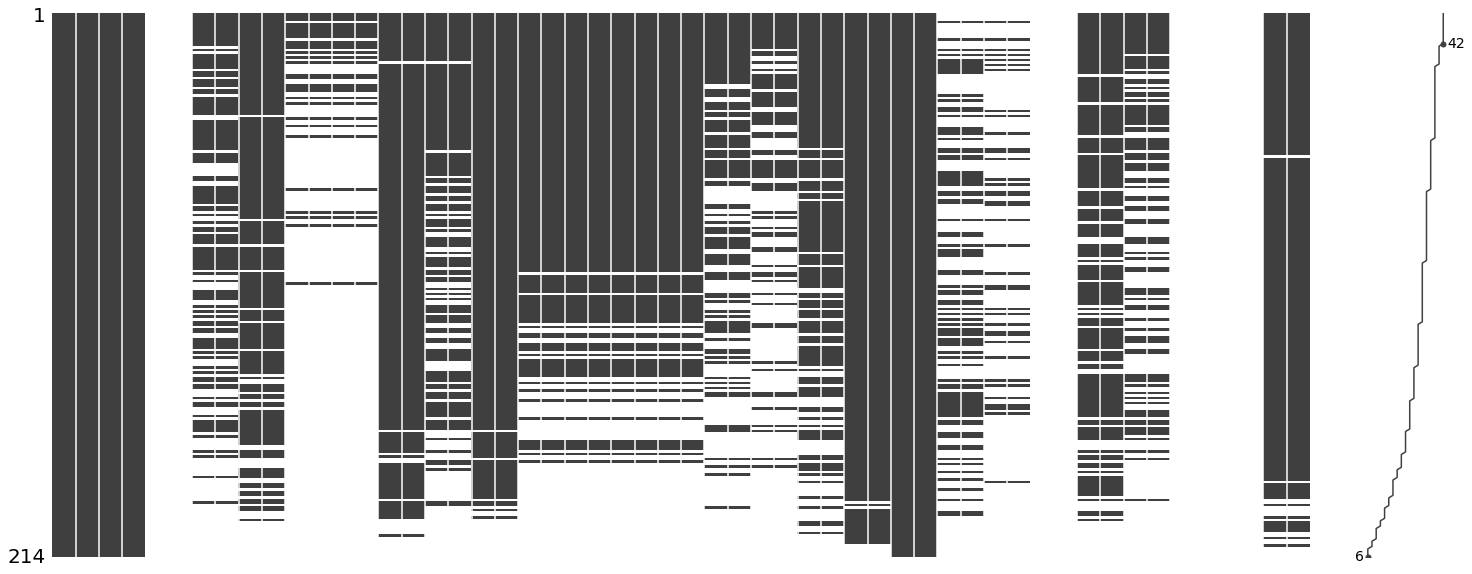

In [144]:
sorted_tabHist = msno.nullity_sort(workCountryHist, sort = 'descending') #on classe les données de dataSeries des lignes les plus complètes au moins complètes
msno.matrix(sorted_tabHist)

In [145]:
#On remarques que quelques indicateurs présentent 100% de NaN, on va donc les retirer de l'analyse :
# UIS.TATTRR.3.T , UIS.ASTAFF.6T8 , UIS.XGDP.3.FSGOV , UIS.T.5 
workCountryHist = workCountryHist.dropna(axis = 1, how = 'all')

tabHistEffNul = workCountryHist.isnull().sum() #Le tableau du nombre total de données manquantes par variables

tabHistTabNul = pd.DataFrame(tabHistEffNul, columns=["Nb Null"]) #création du dataframe en reprenant le tableau précédement crée
tabHistTabNul["% Null"] = tabHistTabNul["Nb Null"]/len(workCountryHist)*100 #ajout d'une colonne qui calcul le % de données manquantes
tabHistTabNul.sort_values(by = 'Nb Null', ascending = False)

,Nb Null,% Null
LO.PIAAC.LIT.YOU max year,184,85.981308
LO.PIAAC.NUM.YOU last value,184,85.981308
LO.PIAAC.LIT.YOU last value,184,85.981308
LO.PIAAC.NUM.YOU max year,184,85.981308
UIS.QUTP.3 max year,176,82.242991
UIS.QUTP.3 last value,176,82.242991
UIS.EA.5.AG25T99 max year,141,65.887850
UIS.EA.5.AG25T99 last value,141,65.887850
UIS.TRTP.3 last value,127,59.345794
UIS.TRTP.3 max year,127,59.345794


<AxesSubplot:>

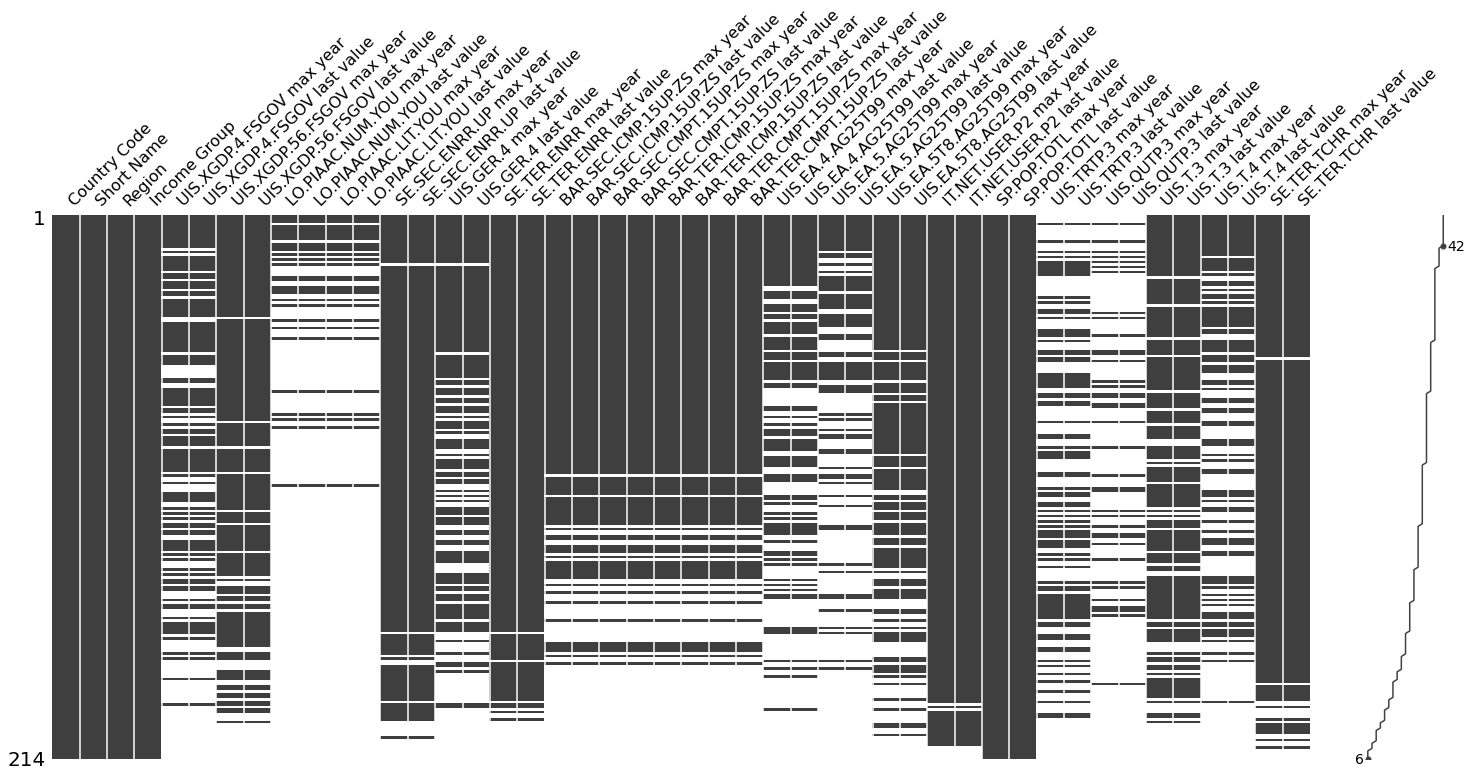

In [146]:
sorted_tabHist = msno.nullity_sort(workCountryHist, sort = 'descending') #on classe les données de dataSeries des lignes les plus complètes au moins complètes
msno.matrix(sorted_tabHist)

In [147]:
#On affiche le nb de NaN par pays
workCountryHistNa = pd.DataFrame(workCountryHist, columns = ["Country Code", "Short Name", "Region"])
workCountryHistNa["Nb NaN"] = workCountryHist.isna().sum(axis=1)
workCountryHistNa.sort_values(by = 'Nb NaN', ascending = False)

,Country Code,Short Name,Region,Nb NaN
87,IMN,Isle of Man,Europe & Central Asia,40
209,XKX,Kosovo,Europe & Central Asia,40
118,MAF,St. Martin (French part),Latin America & Caribbean,40
34,CHI,Channel Islands,Europe & Central Asia,40
65,FRO,Faeroe Islands,Europe & Central Asia,38
...,...,...,...,...
154,POL,Poland,Europe & Central Asia,4
143,NLD,Netherlands,Europe & Central Asia,4
114,LTU,Lithuania,Europe & Central Asia,4
49,CZE,Czech Republic,Europe & Central Asia,4


In [148]:
#sachant que l'on a 6 colonnes n'ayant aucun "NaN" qui sont des des colonnes de variables n'ayant aucun lien avec
#des indicateurs d'éducation : P.POP.TOTL last value, SP.POP.TOTL max year, Short Name, Income Group, Region, Country Code
#on va donc supprimer les pays présentant 46-6=40 "NaN"
workCountryHist["Nb NaN"]=workCountryHist.isna().sum(axis=1).reset_index(drop=True) 

index = workCountryHist[workCountryHist["Nb NaN"]==40].index

workCountryHist.drop(index, inplace=True)
workCountryHist.reset_index(drop=True)

<ipython-input-148-3d02da59dafd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workCountryHist["Nb NaN"]=workCountryHist.isna().sum(axis=1).reset_index(drop=True)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country Code,Short Name,Region,Income Group,UIS.XGDP.4.FSGOV max year,UIS.XGDP.4.FSGOV last value,UIS.XGDP.56.FSGOV max year,UIS.XGDP.56.FSGOV last value,LO.PIAAC.NUM.YOU max year,LO.PIAAC.NUM.YOU last value,LO.PIAAC.LIT.YOU max year,LO.PIAAC.LIT.YOU last value,SE.SEC.ENRR.UP max year,SE.SEC.ENRR.UP last value,UIS.GER.4 max year,UIS.GER.4 last value,SE.TER.ENRR max year,SE.TER.ENRR last value,BAR.SEC.ICMP.15UP.ZS max year,BAR.SEC.ICMP.15UP.ZS last value,BAR.SEC.CMPT.15UP.ZS max year,BAR.SEC.CMPT.15UP.ZS last value,BAR.TER.ICMP.15UP.ZS max year,BAR.TER.ICMP.15UP.ZS last value,BAR.TER.CMPT.15UP.ZS max year,BAR.TER.CMPT.15UP.ZS last value,UIS.EA.4.AG25T99 max year,UIS.EA.4.AG25T99 last value,UIS.EA.5.AG25T99 max year,UIS.EA.5.AG25T99 last value,UIS.EA.5T8.AG25T99 max year,UIS.EA.5T8.AG25T99 last value,IT.NET.USER.P2 max year,IT.NET.USER.P2 last value,SP.POP.TOTL max year,SP.POP.TOTL last value,UIS.TRTP.3 max year,UIS.TRTP.3 last value,UIS.QUTP.3 max year,UIS.QUTP.3 last value,UIS.T.3 max year,UIS.T.3 last value,UIS.T.4 max year,UIS.T.4 last value,SE.TER.TCHR max year,SE.TER.TCHR last value,Nb NaN
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,NaN,NaN,2005,0.53760,NaN,NaN,NaN,NaN,2012,106.325500,2000,9.95984,2015,15.273780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,16.395081,2016,93.542454,2016,104822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,0.000820,26
1,AFG,Afghanistan,South Asia,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,42.613129,2014,11.15165,2014,8.662800,2010,16.09,2010,8.65,2010,6.88,2010,3.65,NaN,NaN,NaN,NaN,NaN,NaN,2016,10.595726,2016,34656032.0,NaN,NaN,NaN,NaN,2007,0.000268,2003,0.000024,2014,0.000317,18
2,AGO,Angola,Sub-Saharan Africa,Upper middle income,NaN,NaN,2006,0.19851,NaN,NaN,NaN,NaN,2011,21.098619,NaN,NaN,2015,9.308020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,13.000000,2016,28813463.0,NaN,NaN,NaN,NaN,2011,0.000514,NaN,NaN,2015,0.000301,28
3,ALB,Albania,Europe & Central Asia,Upper middle income,NaN,NaN,2013,0.77585,NaN,NaN,NaN,NaN,2015,89.460274,2014,1.74154,2015,58.109951,2010,85.78,2010,42.90,2010,1.59,2010,0.93,2011,10.48725,NaN,NaN,2012,12.899660,2016,66.363445,2016,2876101.0,NaN,NaN,2014,98.33837,2014,0.002992,NaN,NaN,2014,0.002561,12
4,AND,Andorra,Europe & Central Asia,High income: nonOECD,2011,0.03257,2014,0.18618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,11.43043,2014,10.27207,2015,21.129110,2016,97.930637,2016,77281.0,NaN,NaN,NaN,NaN,2005,0.000880,2014,0.000039,2015,0.001423,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,WSM,Samoa,East Asia & Pacific,Lower middle income,2000,0.00596,2001,1.27106,NaN,NaN,NaN,NaN,2015,77.916878,2000,19.23300,2000,7.562380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,15.26387,NaN,NaN,2001,3.935290,2016,29.411730,2016,195125.0,2014,100.000000,2014,56.50407,2014,0.005043,NaN,NaN,2000,0.000774,16
206,YEM,Yemen,Middle East & North Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,38.942299,2005,6.27625,2011,9.974600,2010,23.66,2010,10.68,2010,2.88,2010,1.50,NaN,NaN,NaN,NaN,NaN,NaN,2016,24.579208,2016,27584213.0,2013,94.551743,2013,97.89690,2013,0.001053,2001,0.000021,2007,0.000267,14
207,ZAF,South Africa,Sub-Saharan Africa,Upper middle income,2014,0.21097,2014,0.73796,NaN,NaN,NaN,NaN,2012,88.477249,2014,13.03850,2014,19.375071,2010,72.31,2010,53.90,2010,4.56,2010,0.32,2014,7.31417,NaN,NaN,2015,7.818120,2016,54.000000,2016,55908865.0,NaN,NaN,NaN,NaN,NaN,NaN,2014,0.001031,1994,0.000485,12
208,ZMB,Zambia,Sub-Saharan Africa,Lower middle income,NaN,NaN,2005,0.44695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,3.981410,2010,46.55,2010,16.53,2010,0.97,2010,0.49,NaN,NaN,NaN,NaN,NaN,NaN,2016,25.506579,2016,16591390.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0.000060,24


In [149]:
# On regardes la distribuation des NaN, des pays du DataFrame
workCountryHist["Nb NaN"].describe()

count    210.000000
mean      15.561905
std        8.357930
min        4.000000
25%       10.000000
50%       14.000000
75%       20.000000
max       38.000000
Name: Nb NaN, dtype: float64

Text(0.5, 1.0, 'Distribution du nombre de données manquantes, par pays, du fichier récapitulatif des indicateurs')

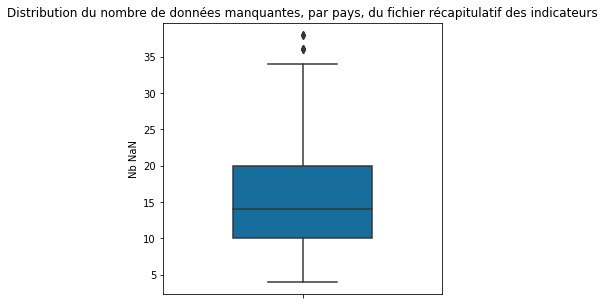

In [150]:
plt.figure(figsize=(5,5))
IndNan_plot=sns.boxplot(y='Nb NaN', data=workCountryHist, width=0.5, palette="colorblind")
#Indic_plot.set(ylabel="Dépenses % PIB")
IndNan_plot.set_title("Distribution du nombre de données manquantes, par pays, du fichier récapitulatif des indicateurs")

Distribution des NaN par régions géographiques :

Text(0.5, 1.0, 'Distribution du nombre de données manquantes, par régions, du fichier récapitulatif des indicateurs')

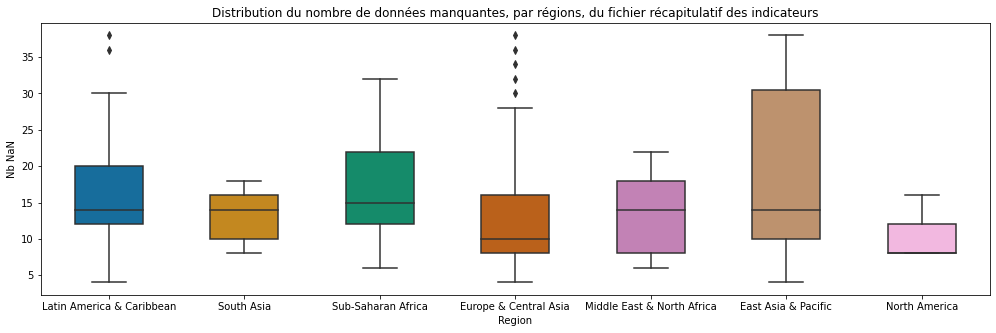

In [151]:
plt.figure(figsize=(17,5))
IndNanReg_plot=sns.boxplot(y='Nb NaN', x="Region", data=workCountryHist, width=0.5, palette="colorblind")
#Indic_plot.set(ylabel="Dépenses % PIB")
IndNanReg_plot.set_title("Distribution du nombre de données manquantes, par régions, du fichier récapitulatif des indicateurs")

#### D - Affinage des indicateurs observés & sélection des pays: <a name="D"></a>
Avec 20 indicateurs dans ce tableau il va falloir qu'on affine notre sélection d'indicateurs. En effet, si on a trop d'indicateurs, on risque de ne pas pouvoir avoir une sélection de pays qui remplissent tous les critères. Nous allons donc procéder à la manière d'un entonnoir. En premier lieu nous allons sélectionner les pays ayant une bonne couverture internet, en effet c'est une condition nécessaire pour pouvoir suivre une formation en ligne.
##### Internet Users 
**Fraicheur des données :**

In [152]:
workCountryHist["IT.NET.USER.P2 max year"]=pd.to_numeric(workCountryHist["IT.NET.USER.P2 max year"])
msk = workCountryHist["IT.NET.USER.P2 max year"].isna() == False
workCountryHist["IT.NET.USER.P2 max year"][msk].describe()

<ipython-input-152-41c987147b3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workCountryHist["IT.NET.USER.P2 max year"]=pd.to_numeric(workCountryHist["IT.NET.USER.P2 max year"])


count     207.000000
mean     2015.516908
std         3.242385
min      1990.000000
25%      2016.000000
50%      2016.000000
75%      2016.000000
max      2016.000000
Name: IT.NET.USER.P2 max year, dtype: float64

**Valeurs des indicateurs :**

In [153]:
workCountryHist["IT.NET.USER.P2 last value"]=pd.to_numeric(workCountryHist["IT.NET.USER.P2 last value"])
msk = workCountryHist["IT.NET.USER.P2 last value"].isna() == False
dsc = workCountryHist["IT.NET.USER.P2 last value"][msk].describe()
dsc

<ipython-input-153-1f949b018d0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workCountryHist["IT.NET.USER.P2 last value"]=pd.to_numeric(workCountryHist["IT.NET.USER.P2 last value"])


count    207.000000
mean      50.195395
std       28.959319
min        0.000000
25%       25.036652
50%       53.200000
75%       76.005180
max       98.240016
Name: IT.NET.USER.P2 last value, dtype: float64

In [154]:
grpBy=workCountryHist.groupby(['Region']).mean()
grpBy["IT.NET.USER.P2 last value"]

Region
East Asia & Pacific           45.638807
Europe & Central Asia         74.319663
Latin America & Caribbean     54.523335
Middle East & North Africa    57.957443
North America                 88.005579
South Asia                    28.313673
Sub-Saharan Africa            20.312099
Name: IT.NET.USER.P2 last value, dtype: float64

Text(0.5, 1.0, '% Internet users')

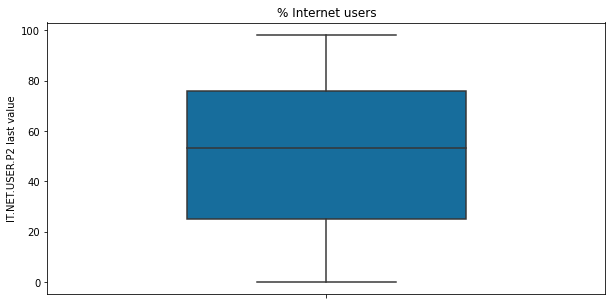

In [155]:
plt.figure(figsize=(10,5))
Indic_plot=sns.boxplot(y='IT.NET.USER.P2 last value', data=workCountryHist, width=0.5, palette="colorblind")
#Indic_plot.set(ylabel="Dépenses % PIB")
Indic_plot.set_title("% Internet users")

Text(0.5, 1.0, '% Internet users')

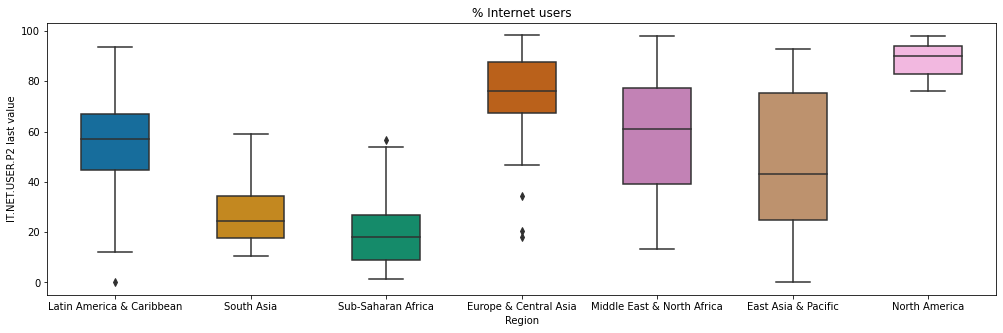

In [156]:
plt.figure(figsize=(17,5))
Indic_plot=sns.boxplot(y='IT.NET.USER.P2 last value', x='Region', data=workCountryHist, width=0.5, palette="colorblind")
#Indic_plot.set(ylabel="Dépenses % PIB")
Indic_plot.set_title("% Internet users")

Text(0.5, 1.0, '% Internet users')

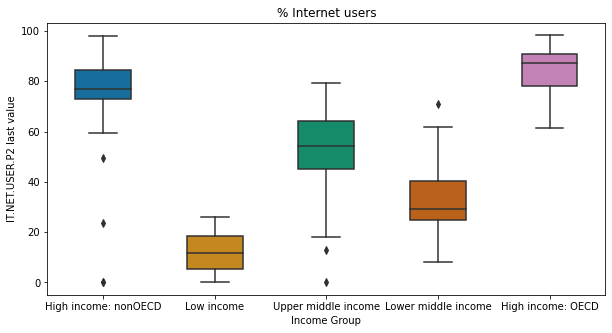

In [157]:
plt.figure(figsize=(10,5))
Indic_plot=sns.boxplot(y='IT.NET.USER.P2 last value', x='Income Group', data=workCountryHist, width=0.5, palette="colorblind")
#Indic_plot.set(ylabel="Dépenses % PIB")
Indic_plot.set_title("% Internet users")

On va maintenant sélectionner les pays faisant partis des 25% des pays ayant la meilleure couverture internet et dont la mesure à été effectuée, au moins, en 2016 :

In [158]:
#Selection des pays :
slct = workCountryHist.copy()
slct = slct[(slct['IT.NET.USER.P2 max year']>=2016)&(slct['IT.NET.USER.P2 last value']>=dsc[6])]
slct

,Country Code,Short Name,Region,Income Group,UIS.XGDP.4.FSGOV max year,UIS.XGDP.4.FSGOV last value,UIS.XGDP.56.FSGOV max year,UIS.XGDP.56.FSGOV last value,LO.PIAAC.NUM.YOU max year,LO.PIAAC.NUM.YOU last value,LO.PIAAC.LIT.YOU max year,LO.PIAAC.LIT.YOU last value,SE.SEC.ENRR.UP max year,SE.SEC.ENRR.UP last value,UIS.GER.4 max year,UIS.GER.4 last value,SE.TER.ENRR max year,SE.TER.ENRR last value,BAR.SEC.ICMP.15UP.ZS max year,BAR.SEC.ICMP.15UP.ZS last value,BAR.SEC.CMPT.15UP.ZS max year,BAR.SEC.CMPT.15UP.ZS last value,BAR.TER.ICMP.15UP.ZS max year,BAR.TER.ICMP.15UP.ZS last value,BAR.TER.CMPT.15UP.ZS max year,BAR.TER.CMPT.15UP.ZS last value,UIS.EA.4.AG25T99 max year,UIS.EA.4.AG25T99 last value,UIS.EA.5.AG25T99 max year,UIS.EA.5.AG25T99 last value,UIS.EA.5T8.AG25T99 max year,UIS.EA.5T8.AG25T99 last value,IT.NET.USER.P2 max year,IT.NET.USER.P2 last value,SP.POP.TOTL max year,SP.POP.TOTL last value,UIS.TRTP.3 max year,UIS.TRTP.3 last value,UIS.QUTP.3 max year,UIS.QUTP.3 last value,UIS.T.3 max year,UIS.T.3 last value,UIS.T.4 max year,UIS.T.4 last value,SE.TER.TCHR max year,SE.TER.TCHR last value,Nb NaN
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,NaN,NaN,2005,0.53760,NaN,NaN,NaN,NaN,2012,106.325500,2000,9.959840,2015,15.273780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,16.395081,2016.0,93.542454,2016,104822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,0.000820,26
4,AND,Andorra,Europe & Central Asia,High income: nonOECD,2011,0.03257,2014,0.18618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,11.430430,2014,10.27207,2015,21.129110,2016.0,97.930637,2016,77281.0,NaN,NaN,NaN,NaN,2005,0.000880,2014,0.000039,2015,0.001423,22
5,ARE,United Arab Emirates,Middle East & North Africa,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,67.383492,NaN,NaN,1993,6.113160,2010,53.27,2010,35.68,2010,14.39,2010,8.54,2005,4.626960,NaN,NaN,2005,17.956770,2016.0,90.600007,2016,9269612.0,NaN,NaN,NaN,NaN,2009,0.001328,NaN,NaN,2015,0.000949,18
10,AUS,Australia,East Asia & Pacific,High income: OECD,2013,0.09475,2013,1.36765,2012,270.06405,2012,284.12518,2014,186.427887,2013,88.581459,2014,90.306503,2010,60.71,2010,38.49,2010,30.98,2010,18.52,2014,4.402670,2014,9.68586,2015,40.472038,2016.0,88.238658,2016,24127159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,0.002098,8
11,AUT,Austria,Europe & Central Asia,High income: OECD,2013,0.01795,2013,1.79956,2012,279.26537,2012,277.71523,2015,99.619698,2014,6.953140,2015,81.540512,2010,59.96,2010,40.81,2010,15.36,2010,9.37,2014,1.977850,2014,14.18831,2015,26.934910,2016.0,84.323331,2016,8747358.0,NaN,NaN,NaN,NaN,2014,0.003519,2014,0.000119,2015,0.006961,4
12,AZE,Azerbaijan,Europe & Central Asia,Upper middle income,2007,0.13170,2011,0.35624,NaN,NaN,NaN,NaN,1997,58.004341,2014,24.730989,2015,25.483200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,4.650240,2014,9.72542,2015,25.411600,2016.0,78.200000,2016,9762274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,0.002154,20
14,BEL,Belgium,Europe & Central Asia,High income: OECD,NaN,NaN,2012,1.43382,NaN,NaN,NaN,NaN,2015,158.077530,2014,53.912941,2015,75.036827,2010,53.43,2010,33.24,2010,27.34,2010,17.69,2014,1.250600,2014,0.29379,2015,32.064571,2016.0,86.516500,2016,11348159.0,NaN,NaN,NaN,NaN,2014,0.007140,2014,0.000494,2014,0.002520,10
19,BHR,Bahrain,Middle East & North Africa,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,102.816643,2014,35.853901,2015,43.263229,2010,49.48,2010,32.11,2010,8.30,2010,7.76,2010,20.845590,2010,9.78845,2010,19.269880,2016.0,97.999981,2016,1425171.0,2015,83.652489,2014,97.67394,2014,0.003439,2014,0.000404,2015,0.001768,8
20,BHS,The Bahamas,Latin America & Caribbean,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,87.462700,2005,31.767040,1995,15.053030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,8.263540,2010,7.57454,2010,22.894291,2016.0,80.000000,2016,391232.0,2010,89.002930,NaN,NaN,2010,0.003486,2005,0.000181,1995,0.000532,18
24,BMU,Bermuda,North America,High income: nonOECD,2010,0.03641,2014,0.32508,NaN

In [159]:
len(slct)

52

Text(0.5, 1.0, '% Internet users')

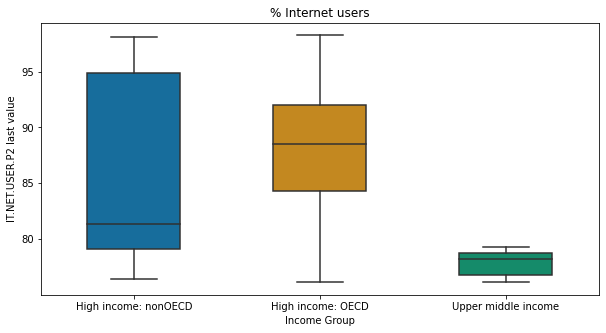

In [160]:
plt.figure(figsize=(10,5))
Indic_plot=sns.boxplot(y='IT.NET.USER.P2 last value', x='Income Group', data=slct, width=0.5, palette="colorblind")
#Indic_plot.set(ylabel="Dépenses % PIB")
Indic_plot.set_title("% Internet users")

Text(0.5, 1.0, 'Répartition des pays par Income Group')

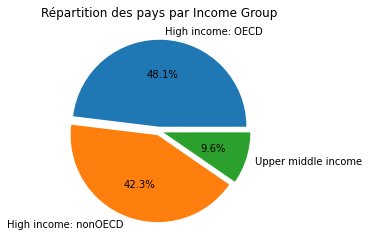

In [161]:
plt.pie(slct['Income Group'].value_counts(),labels=slct['Income Group'].value_counts().index, explode=[0.05]*3, normalize = True, autopct="%.1f%%")
plt.title("Répartition des pays par Income Group")

In [162]:
slct['Income Group'].value_counts().index

Index(['High income: OECD', 'High income: nonOECD', 'Upper middle income'], dtype='object')

52 pays correspondent donc aux critères. <br>
Intérressont nous maintenant à un autre indicateur. Étant une Start-Up le but est de pouvoir vendre des formations au plus grand nombre de personnes. Ce qui signifie que les personnes doivent avoir la capacité de pouvoir les acheter. Nous allons donc nous focaliser sur les pays ayant de fort revenus c'est à dire les pays faisant partie du groupe "High Income" qu'ils soient membre ou non de l'OCDE. <br>
**Income Group :**

In [163]:
slct = slct[(slct['Income Group']=='High income: nonOECD') | (slct['Income Group']=='High income: OECD')]
slct

,Country Code,Short Name,Region,Income Group,UIS.XGDP.4.FSGOV max year,UIS.XGDP.4.FSGOV last value,UIS.XGDP.56.FSGOV max year,UIS.XGDP.56.FSGOV last value,LO.PIAAC.NUM.YOU max year,LO.PIAAC.NUM.YOU last value,LO.PIAAC.LIT.YOU max year,LO.PIAAC.LIT.YOU last value,SE.SEC.ENRR.UP max year,SE.SEC.ENRR.UP last value,UIS.GER.4 max year,UIS.GER.4 last value,SE.TER.ENRR max year,SE.TER.ENRR last value,BAR.SEC.ICMP.15UP.ZS max year,BAR.SEC.ICMP.15UP.ZS last value,BAR.SEC.CMPT.15UP.ZS max year,BAR.SEC.CMPT.15UP.ZS last value,BAR.TER.ICMP.15UP.ZS max year,BAR.TER.ICMP.15UP.ZS last value,BAR.TER.CMPT.15UP.ZS max year,BAR.TER.CMPT.15UP.ZS last value,UIS.EA.4.AG25T99 max year,UIS.EA.4.AG25T99 last value,UIS.EA.5.AG25T99 max year,UIS.EA.5.AG25T99 last value,UIS.EA.5T8.AG25T99 max year,UIS.EA.5T8.AG25T99 last value,IT.NET.USER.P2 max year,IT.NET.USER.P2 last value,SP.POP.TOTL max year,SP.POP.TOTL last value,UIS.TRTP.3 max year,UIS.TRTP.3 last value,UIS.QUTP.3 max year,UIS.QUTP.3 last value,UIS.T.3 max year,UIS.T.3 last value,UIS.T.4 max year,UIS.T.4 last value,SE.TER.TCHR max year,SE.TER.TCHR last value,Nb NaN
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,NaN,NaN,2005,0.53760,NaN,NaN,NaN,NaN,2012,106.325500,2000,9.959840,2015,15.273780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,16.395081,2016.0,93.542454,2016,104822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,0.000820,26
4,AND,Andorra,Europe & Central Asia,High income: nonOECD,2011,0.03257,2014,0.18618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,11.430430,2014,10.27207,2015,21.129110,2016.0,97.930637,2016,77281.0,NaN,NaN,NaN,NaN,2005,0.000880,2014,0.000039,2015,0.001423,22
5,ARE,United Arab Emirates,Middle East & North Africa,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,67.383492,NaN,NaN,1993,6.113160,2010,53.27,2010,35.68,2010,14.39,2010,8.54,2005,4.626960,NaN,NaN,2005,17.956770,2016.0,90.600007,2016,9269612.0,NaN,NaN,NaN,NaN,2009,0.001328,NaN,NaN,2015,0.000949,18
10,AUS,Australia,East Asia & Pacific,High income: OECD,2013,0.09475,2013,1.36765,2012,270.06405,2012,284.12518,2014,186.427887,2013,88.581459,2014,90.306503,2010,60.71,2010,38.49,2010,30.98,2010,18.52,2014,4.402670,2014,9.68586,2015,40.472038,2016.0,88.238658,2016,24127159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,0.002098,8
11,AUT,Austria,Europe & Central Asia,High income: OECD,2013,0.01795,2013,1.79956,2012,279.26537,2012,277.71523,2015,99.619698,2014,6.953140,2015,81.540512,2010,59.96,2010,40.81,2010,15.36,2010,9.37,2014,1.977850,2014,14.18831,2015,26.934910,2016.0,84.323331,2016,8747358.0,NaN,NaN,NaN,NaN,2014,0.003519,2014,0.000119,2015,0.006961,4
14,BEL,Belgium,Europe & Central Asia,High income: OECD,NaN,NaN,2012,1.43382,NaN,NaN,NaN,NaN,2015,158.077530,2014,53.912941,2015,75.036827,2010,53.43,2010,33.24,2010,27.34,2010,17.69,2014,1.250600,2014,0.29379,2015,32.064571,2016.0,86.516500,2016,11348159.0,NaN,NaN,NaN,NaN,2014,0.007140,2014,0.000494,2014,0.002520,10
19,BHR,Bahrain,Middle East & North Africa,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,102.816643,2014,35.853901,2015,43.263229,2010,49.48,2010,32.11,2010,8.30,2010,7.76,2010,20.845590,2010,9.78845,2010,19.269880,2016.0,97.999981,2016,1425171.0,2015,83.652489,2014,97.67394,2014,0.003439,2014,0.000404,2015,0.001768,8
20,BHS,The Bahamas,Latin America & Caribbean,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,87.462700,2005,31.767040,1995,15.053030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,8.263540,2010,7.57454,2010,22.894291,2016.0,80.000000,2016,391232.0,2010,89.002930,NaN,NaN,2010,0.003486,2005,0.000181,1995,0.000532,18
24,BMU,Bermuda,North America,High income: nonOECD,2010,0.03641,2014,0.32508,NaN,NaN,NaN,NaN,2015,67.570938,NaN,NaN,2015,24.300699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,13.143690,2010,8.70917,2010,37.364891,2016.0,98.000000,2016,65331.0,2014,100.000000,2014,100.00000,2014,0.006215,NaN,NaN,2015,0.000796,16
27,BRB,Barbados,Latin America & Caribbean,High income: nonOECD,2012,0.15167,

In [164]:
len(slct)

47

On a donc retiré 5 pays, ce qui montre que la plupart des pays ayant une bonne couverture internet sont des pays à fort revenus.<br>
On va maintenant s'intéresser au niveau scolaire de la population de ces pays. En proposant des formations de niveau Lycée et Universitaire nous allons donc sélectionner les pays ayant une forte proportion de la population ayant atteint ces niveau. <br>
**Percentage of population age 15+, with secondary and tertiary schooling (Completed and Incomplete) :**<br>
*Secondary schooling (Niveau Lycée): BAR.SEC.ICMP.15UP.ZS*<br>

In [165]:
#nombre de données manquantes
len(slct[slct["BAR.SEC.ICMP.15UP.ZS max year"].isna()==True])

11

In [166]:
#distribution des années BAR.SEC.ICMP.15UP.ZS max year
slct["BAR.SEC.ICMP.15UP.ZS max year"]=pd.to_numeric(slct["BAR.SEC.ICMP.15UP.ZS max year"])
msk = slct["BAR.SEC.ICMP.15UP.ZS max year"].isna() == False
slct["BAR.SEC.ICMP.15UP.ZS max year"][msk].describe()

<ipython-input-166-13bcb3865b68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slct["BAR.SEC.ICMP.15UP.ZS max year"]=pd.to_numeric(slct["BAR.SEC.ICMP.15UP.ZS max year"])


count      36.0
mean     2010.0
std         0.0
min      2010.0
25%      2010.0
50%      2010.0
75%      2010.0
max      2010.0
Name: BAR.SEC.ICMP.15UP.ZS max year, dtype: float64

In [167]:
#Distribution des valeurs
msk = slct["BAR.SEC.ICMP.15UP.ZS last value"].isna() == False
dscS = slct["BAR.SEC.ICMP.15UP.ZS last value"][msk].describe()
dscS

count    36.000000
mean     56.704722
std      13.871902
min      31.090000
25%      45.262500
50%      58.550000
75%      64.497500
max      85.750000
Name: BAR.SEC.ICMP.15UP.ZS last value, dtype: float64

Text(0.5, 1.0, '% Secondary')

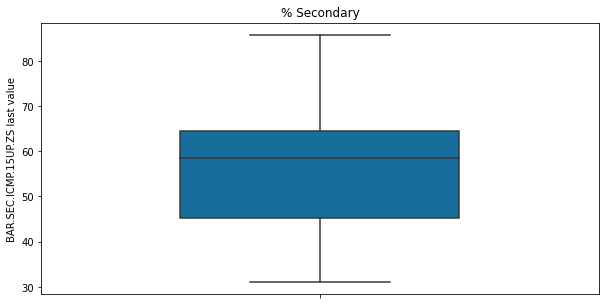

In [168]:
plt.figure(figsize=(10,5))
Indic_plot=sns.boxplot(y='BAR.SEC.ICMP.15UP.ZS last value', data=slct, width=0.5, palette="colorblind")
#Indic_plot.set(ylabel="Dépenses % PIB")
Indic_plot.set_title("% Secondary")

In [169]:
slct=slct[slct["BAR.SEC.ICMP.15UP.ZS last value"]>=dscS[5]]
slct

,Country Code,Short Name,Region,Income Group,UIS.XGDP.4.FSGOV max year,UIS.XGDP.4.FSGOV last value,UIS.XGDP.56.FSGOV max year,UIS.XGDP.56.FSGOV last value,LO.PIAAC.NUM.YOU max year,LO.PIAAC.NUM.YOU last value,LO.PIAAC.LIT.YOU max year,LO.PIAAC.LIT.YOU last value,SE.SEC.ENRR.UP max year,SE.SEC.ENRR.UP last value,UIS.GER.4 max year,UIS.GER.4 last value,SE.TER.ENRR max year,SE.TER.ENRR last value,BAR.SEC.ICMP.15UP.ZS max year,BAR.SEC.ICMP.15UP.ZS last value,BAR.SEC.CMPT.15UP.ZS max year,BAR.SEC.CMPT.15UP.ZS last value,BAR.TER.ICMP.15UP.ZS max year,BAR.TER.ICMP.15UP.ZS last value,BAR.TER.CMPT.15UP.ZS max year,BAR.TER.CMPT.15UP.ZS last value,UIS.EA.4.AG25T99 max year,UIS.EA.4.AG25T99 last value,UIS.EA.5.AG25T99 max year,UIS.EA.5.AG25T99 last value,UIS.EA.5T8.AG25T99 max year,UIS.EA.5T8.AG25T99 last value,IT.NET.USER.P2 max year,IT.NET.USER.P2 last value,SP.POP.TOTL max year,SP.POP.TOTL last value,UIS.TRTP.3 max year,UIS.TRTP.3 last value,UIS.QUTP.3 max year,UIS.QUTP.3 last value,UIS.T.3 max year,UIS.T.3 last value,UIS.T.4 max year,UIS.T.4 last value,SE.TER.TCHR max year,SE.TER.TCHR last value,Nb NaN
10,AUS,Australia,East Asia & Pacific,High income: OECD,2013,0.09475,2013,1.36765,2012,270.06405,2012,284.12518,2014,186.427887,2013,88.581459,2014,90.306503,2010.0,60.71,2010,38.49,2010,30.98,2010,18.52,2014,4.40267,2014,9.68586,2015,40.472038,2016.0,88.238658,2016,24127159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,0.002098,8
11,AUT,Austria,Europe & Central Asia,High income: OECD,2013,0.01795,2013,1.79956,2012,279.26537,2012,277.71523,2015,99.619698,2014,6.953140,2015,81.540512,2010.0,59.96,2010,40.81,2010,15.36,2010,9.37,2014,1.97785,2014,14.18831,2015,26.934910,2016.0,84.323331,2016,8747358.0,NaN,NaN,NaN,NaN,2014,0.003519,2014,0.000119,2015,0.006961,4
27,BRB,Barbados,Latin America & Caribbean,High income: nonOECD,2012,0.15167,2014,2.63617,NaN,NaN,NaN,NaN,2014,112.885910,2014,49.872162,2011,65.432228,2010.0,85.75,2010,21.76,2010,4.63,2010,2.07,2000,14.60052,NaN,NaN,2000,1.058230,2016.0,79.549398,2016,284996.0,NaN,NaN,NaN,NaN,NaN,NaN,2009,0.005309,2007,0.002758,12
33,CHE,Switzerland,Europe & Central Asia,High income: OECD,2007,0.02781,2012,1.32943,NaN,NaN,NaN,NaN,2015,97.843147,2014,13.237830,2015,57.672192,2010.0,65.75,2010,48.33,2010,29.47,2010,17.88,2012,5.25208,NaN,NaN,2015,36.949291,2016.0,89.405568,2016,8372098.0,NaN,NaN,NaN,NaN,2013,0.003714,NaN,NaN,2014,0.003903,12
49,CZE,Czech Republic,Europe & Central Asia,High income: OECD,2012,0.00635,2012,1.00012,2012,277.99000,2012,280.53099,2015,109.673653,2014,52.396992,2015,64.966713,2010.0,84.34,2010,68.77,2010,14.83,2010,7.59,2013,1.67571,2014,0.14051,2015,19.530531,2016.0,76.481201,2016,10561633.0,NaN,NaN,NaN,NaN,2013,0.003502,2013,0.000033,2013,0.001555,4
50,DEU,Germany,Europe & Central Asia,High income: OECD,2012,0.17205,2012,1.32298,2012,275.10122,2012,278.90608,2015,104.849243,2014,29.883671,2015,68.265587,2010.0,73.00,2010,54.75,2010,21.48,2010,13.14,2014,8.53929,2014,0.68878,2015,25.426121,2016.0,89.647101,2016,82667685.0,NaN,NaN,NaN,NaN,2014,0.002175,2014,0.000993,2015,0.004793,4
53,DNK,Denmark,Europe & Central Asia,High income: OECD,1998,0.03912,2011,2.38503,2012,273.09200,2012,276.05655,2015,143.508377,2012,0.955820,2015,82.786972,2010.0,66.69,2010,38.88,2010,24.81,2010,14.98,NaN,NaN,2014,4.22050,2015,34.507450,2016.0,96.967785,2016,5731118.0,NaN,NaN,NaN,NaN,2001,0.004088,NaN,NaN,2015,0.006469,8
60,EST,Estonia,Europe & Central Asia,High income: OECD,2012,0.24784,2012,1.02439,2012,278.53982,2012,287.06948,2015,117.871208,2013,32.816891,2015,69.550430,2010.0,64.08,2010,46.53,2010,30.40,2010,18.87,2014,52.58053,NaN,NaN,2015,37.604980,2016.0,87.237332,2016,1316481.0,NaN,NaN,NaN,NaN,2013,0.004037,2008,0.000147,2006,0.004830,6
62,FIN,Finland,Europe & Central Asia,High income: OECD,NaN,NaN,2013,2.01324,2012,284.76530,2012,296.70628,2015,194.101990,2014,33.281540,2015,87.289703,2010.0,72.69,2010,38.88,2010,27.31,2010,12.35,2013,0.67153,2013,11.79210,2014,34.100391,2016.0,87.703650,2016

In [170]:
len(slct)

18

*Tertiary schooling (Niveau Universitaire): BAR.TER.ICMP.15UP.ZS*<br>

In [171]:
#nombre de données manquantes
len(slct[slct["BAR.TER.ICMP.15UP.ZS max year"].isna()==True])

0

In [172]:
#distribution des années BAR.SEC.ICMP.15UP.ZS max year
slct["BAR.TER.ICMP.15UP.ZS max year"]=pd.to_numeric(slct["BAR.TER.ICMP.15UP.ZS max year"])
msk = slct["BAR.TER.ICMP.15UP.ZS max year"].isna() == False
slct["BAR.TER.ICMP.15UP.ZS max year"][msk].describe()

<ipython-input-172-388be81a1753>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slct["BAR.TER.ICMP.15UP.ZS max year"]=pd.to_numeric(slct["BAR.TER.ICMP.15UP.ZS max year"])


count      18.0
mean     2010.0
std         0.0
min      2010.0
25%      2010.0
50%      2010.0
75%      2010.0
max      2010.0
Name: BAR.TER.ICMP.15UP.ZS max year, dtype: float64

In [173]:
#Distribution des valeurs
msk = slct["BAR.TER.ICMP.15UP.ZS last value"].isna() == False
dscT = slct["BAR.TER.ICMP.15UP.ZS last value"][msk].describe()
dscT

count    18.000000
mean     21.887222
std       6.908480
min       4.630000
25%      18.117500
50%      23.880000
75%      26.180000
max      30.980000
Name: BAR.TER.ICMP.15UP.ZS last value, dtype: float64

Text(0.5, 1.0, '% Tertiary')

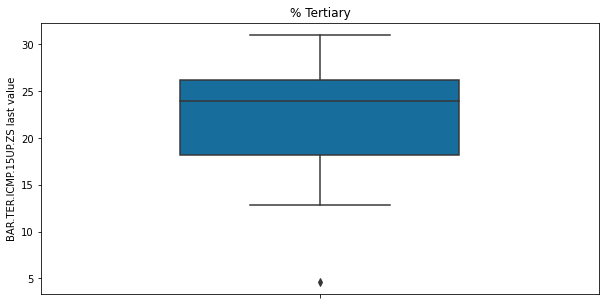

In [174]:
plt.figure(figsize=(10,5))
Indic_plot=sns.boxplot(y='BAR.TER.ICMP.15UP.ZS last value', data=slct, width=0.5, palette="colorblind")
#Indic_plot.set(ylabel="Dépenses % PIB")
Indic_plot.set_title("% Tertiary")

In [175]:
slct=slct[slct["BAR.TER.ICMP.15UP.ZS last value"]>=dscT[5]]
slct

,Country Code,Short Name,Region,Income Group,UIS.XGDP.4.FSGOV max year,UIS.XGDP.4.FSGOV last value,UIS.XGDP.56.FSGOV max year,UIS.XGDP.56.FSGOV last value,LO.PIAAC.NUM.YOU max year,LO.PIAAC.NUM.YOU last value,LO.PIAAC.LIT.YOU max year,LO.PIAAC.LIT.YOU last value,SE.SEC.ENRR.UP max year,SE.SEC.ENRR.UP last value,UIS.GER.4 max year,UIS.GER.4 last value,SE.TER.ENRR max year,SE.TER.ENRR last value,BAR.SEC.ICMP.15UP.ZS max year,BAR.SEC.ICMP.15UP.ZS last value,BAR.SEC.CMPT.15UP.ZS max year,BAR.SEC.CMPT.15UP.ZS last value,BAR.TER.ICMP.15UP.ZS max year,BAR.TER.ICMP.15UP.ZS last value,BAR.TER.CMPT.15UP.ZS max year,BAR.TER.CMPT.15UP.ZS last value,UIS.EA.4.AG25T99 max year,UIS.EA.4.AG25T99 last value,UIS.EA.5.AG25T99 max year,UIS.EA.5.AG25T99 last value,UIS.EA.5T8.AG25T99 max year,UIS.EA.5T8.AG25T99 last value,IT.NET.USER.P2 max year,IT.NET.USER.P2 last value,SP.POP.TOTL max year,SP.POP.TOTL last value,UIS.TRTP.3 max year,UIS.TRTP.3 last value,UIS.QUTP.3 max year,UIS.QUTP.3 last value,UIS.T.3 max year,UIS.T.3 last value,UIS.T.4 max year,UIS.T.4 last value,SE.TER.TCHR max year,SE.TER.TCHR last value,Nb NaN
10,AUS,Australia,East Asia & Pacific,High income: OECD,2013,0.09475,2013,1.36765,2012,270.06405,2012,284.12518,2014,186.427887,2013,88.581459,2014,90.306503,2010.0,60.71,2010,38.49,2010,30.98,2010,18.52,2014,4.40267,2014,9.68586,2015,40.472038,2016.0,88.238658,2016,24127159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,0.002098,8
33,CHE,Switzerland,Europe & Central Asia,High income: OECD,2007,0.02781,2012,1.32943,NaN,NaN,NaN,NaN,2015,97.843147,2014,13.237830,2015,57.672192,2010.0,65.75,2010,48.33,2010,29.47,2010,17.88,2012,5.25208,NaN,NaN,2015,36.949291,2016.0,89.405568,2016,8372098.0,NaN,NaN,NaN,NaN,2013,0.003714,NaN,NaN,2014,0.003903,12
53,DNK,Denmark,Europe & Central Asia,High income: OECD,1998,0.03912,2011,2.38503,2012,273.09200,2012,276.05655,2015,143.508377,2012,0.955820,2015,82.786972,2010.0,66.69,2010,38.88,2010,24.81,2010,14.98,NaN,NaN,2014,4.22050,2015,34.507450,2016.0,96.967785,2016,5731118.0,NaN,NaN,NaN,NaN,2001,0.004088,NaN,NaN,2015,0.006469,8
60,EST,Estonia,Europe & Central Asia,High income: OECD,2012,0.24784,2012,1.02439,2012,278.53982,2012,287.06948,2015,117.871208,2013,32.816891,2015,69.550430,2010.0,64.08,2010,46.53,2010,30.40,2010,18.87,2014,52.58053,NaN,NaN,2015,37.604980,2016.0,87.237332,2016,1316481.0,NaN,NaN,NaN,NaN,2013,0.004037,2008,0.000147,2006,0.004830,6
62,FIN,Finland,Europe & Central Asia,High income: OECD,NaN,NaN,2013,2.01324,2012,284.76530,2012,296.70628,2015,194.101990,2014,33.281540,2015,87.289703,2010.0,72.69,2010,38.88,2010,27.31,2010,12.35,2013,0.67153,2013,11.79210,2014,34.100391,2016.0,87.703650,2016,5495096.0,NaN,NaN,NaN,NaN,2013,0.004091,2013,0.000261,2014,0.002882,6
68,GBR,United Kingdom,Europe & Central Asia,High income: OECD,2009,0.00922,2013,1.36234,NaN,NaN,NaN,NaN,2014,138.235916,2009,0.477390,2014,56.476768,2010.0,59.45,2010,47.31,2010,25.50,2010,15.31,2010,0.11062,2014,8.00949,2014,38.980301,2016.0,94.775801,2016,65637239.0,NaN,NaN,NaN,NaN,2014,0.003954,NaN,NaN,2015,0.002263,10
143,NLD,Netherlands,Europe & Central Asia,High income: OECD,2013,0.00104,2013,1.62299,2012,285.39660,2012,294.61334,2015,134.458405,2014,0.279660,2012,78.501068,2010.0,63.63,2010,38.39,2010,25.79,2010,15.63,2014,0.28892,2014,2.22638,2015,30.961161,2016.0,90.410959,2016,17018408.0,NaN,NaN,NaN,NaN,2014,0.002875,2014,0.000002,2015,0.003677,4
144,NOR,Norway,Europe & Central Asia,High income: OECD,1998,0.01007,2011,1.92986,2012,270.92701,2012,275.03698,2015,125.488708,2014,9.175730,2015,76.696381,2010.0,67.70,2010,40.30,2010,26.31,2010,12.16,2014,1.74345,2014,9.60628,2015,36.518871,2016.0,97.298204,2016,5232929.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,0.005163,8
180,SWE,Sweden,Europe & Central Asia,High income: OECD,2013,0.04538,2013,1.95701,2012,278.21466,2012,282.76186,2015,163.634064,2014,8.594490,2015,62.300770,2010.0,62.02,2010,48.29,2010,24.89,2010,14.93,2014,5.39279,2014,8.41945,2015,31.651100,2016.0,91.506828,2016,9903122

In [176]:
len(slct)

9

Nous avons donc maintenant 9 pays qui correspondent à nos contraintes, afin d'établir un classement, j'ai trouvé intéressant de regarder le nombre de professeurs. En effet, un faible taux de professeur par habitant peut être un signe d'opportunité pour la Start-Up. Le seul indicateur du taux de professeur présent chez tous les individus sélectionnés est le taux de professeur dans l'enseignement tertiaire (Université)<br>
**Professeurs dans l'enseignement tertiaire (en proportion de la population totale) : SE.TER.TCHR**<br>
*Fraicheur des données :*

In [177]:
#distribution des années BAR.SEC.ICMP.15UP.ZS max year
slct["SE.TER.TCHR max year"]=pd.to_numeric(slct["SE.TER.TCHR max year"])
msk = slct["SE.TER.TCHR max year"].isna() == False
slct["SE.TER.TCHR max year"][msk].describe()

<ipython-input-177-58bd73edd903>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slct["SE.TER.TCHR max year"]=pd.to_numeric(slct["SE.TER.TCHR max year"])


count       9.000000
mean     2013.555556
std         2.920236
min      2006.000000
25%      2014.000000
50%      2015.000000
75%      2015.000000
max      2015.000000
Name: SE.TER.TCHR max year, dtype: float64

In [178]:
slct.sort_values(by = 'SE.TER.TCHR last value', ascending = True).reset_index(drop=True)

,Country Code,Short Name,Region,Income Group,UIS.XGDP.4.FSGOV max year,UIS.XGDP.4.FSGOV last value,UIS.XGDP.56.FSGOV max year,UIS.XGDP.56.FSGOV last value,LO.PIAAC.NUM.YOU max year,LO.PIAAC.NUM.YOU last value,LO.PIAAC.LIT.YOU max year,LO.PIAAC.LIT.YOU last value,SE.SEC.ENRR.UP max year,SE.SEC.ENRR.UP last value,UIS.GER.4 max year,UIS.GER.4 last value,SE.TER.ENRR max year,SE.TER.ENRR last value,BAR.SEC.ICMP.15UP.ZS max year,BAR.SEC.ICMP.15UP.ZS last value,BAR.SEC.CMPT.15UP.ZS max year,BAR.SEC.CMPT.15UP.ZS last value,BAR.TER.ICMP.15UP.ZS max year,BAR.TER.ICMP.15UP.ZS last value,BAR.TER.CMPT.15UP.ZS max year,BAR.TER.CMPT.15UP.ZS last value,UIS.EA.4.AG25T99 max year,UIS.EA.4.AG25T99 last value,UIS.EA.5.AG25T99 max year,UIS.EA.5.AG25T99 last value,UIS.EA.5T8.AG25T99 max year,UIS.EA.5T8.AG25T99 last value,IT.NET.USER.P2 max year,IT.NET.USER.P2 last value,SP.POP.TOTL max year,SP.POP.TOTL last value,UIS.TRTP.3 max year,UIS.TRTP.3 last value,UIS.QUTP.3 max year,UIS.QUTP.3 last value,UIS.T.3 max year,UIS.T.3 last value,UIS.T.4 max year,UIS.T.4 last value,SE.TER.TCHR max year,SE.TER.TCHR last value,Nb NaN
0,AUS,Australia,East Asia & Pacific,High income: OECD,2013,0.09475,2013,1.36765,2012,270.06405,2012,284.12518,2014,186.427887,2013,88.581459,2014,90.306503,2010.0,60.71,2010,38.49,2010,30.98,2010,18.52,2014,4.40267,2014,9.68586,2015,40.472038,2016.0,88.238658,2016,24127159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,0.002098,8
1,GBR,United Kingdom,Europe & Central Asia,High income: OECD,2009,0.00922,2013,1.36234,NaN,NaN,NaN,NaN,2014,138.235916,2009,0.477390,2014,56.476768,2010.0,59.45,2010,47.31,2010,25.50,2010,15.31,2010,0.11062,2014,8.00949,2014,38.980301,2016.0,94.775801,2016,65637239.0,NaN,NaN,NaN,NaN,2014,0.003954,NaN,NaN,2015,0.002263,10
2,FIN,Finland,Europe & Central Asia,High income: OECD,NaN,NaN,2013,2.01324,2012,284.76530,2012,296.70628,2015,194.101990,2014,33.281540,2015,87.289703,2010.0,72.69,2010,38.88,2010,27.31,2010,12.35,2013,0.67153,2013,11.79210,2014,34.100391,2016.0,87.703650,2016,5495096.0,NaN,NaN,NaN,NaN,2013,0.004091,2013,0.000261,2014,0.002882,6
3,SWE,Sweden,Europe & Central Asia,High income: OECD,2013,0.04538,2013,1.95701,2012,278.21466,2012,282.76186,2015,163.634064,2014,8.594490,2015,62.300770,2010.0,62.02,2010,48.29,2010,24.89,2010,14.93,2014,5.39279,2014,8.41945,2015,31.651100,2016.0,91.506828,2016,9903122.0,NaN,NaN,NaN,NaN,2012,0.003951,2012,0.000083,2015,0.003447,4
4,NLD,Netherlands,Europe & Central Asia,High income: OECD,2013,0.00104,2013,1.62299,2012,285.39660,2012,294.61334,2015,134.458405,2014,0.279660,2012,78.501068,2010.0,63.63,2010,38.39,2010,25.79,2010,15.63,2014,0.28892,2014,2.22638,2015,30.961161,2016.0,90.410959,2016,17018408.0,NaN,NaN,NaN,NaN,2014,0.002875,2014,0.000002,2015,0.003677,4
5,CHE,Switzerland,Europe & Central Asia,High income: OECD,2007,0.02781,2012,1.32943,NaN,NaN,NaN,NaN,2015,97.843147,2014,13.237830,2015,57.672192,2010.0,65.75,2010,48.33,2010,29.47,2010,17.88,2012,5.25208,NaN,NaN,2015,36.949291,2016.0,89.405568,2016,8372098.0,NaN,NaN,NaN,NaN,2013,0.003714,NaN,NaN,2014,0.003903,12
6,EST,Estonia,Europe & Central Asia,High income: OECD,2012,0.24784,2012,1.02439,2012,278.53982,2012,287.06948,2015,117.871208,2013,32.816891,2015,69.550430,2010.0,64.08,2010,46.53,2010,30.40,2010,18.87,2014,52.58053,NaN,NaN,2015,37.604980,2016.0,87.237332,2016,1316481.0,NaN,NaN,NaN,NaN,2013,0.004037,2008,0.000147,2006,0.004830,6
7,NOR,Norway,Europe & Central Asia,High income: OECD,1998,0.01007,2011,1.92986,2012,270.92701,2012,275.03698,2015,125.488708,2014,9.175730,2015,76.696381,2010.0,67.70,2010,40.30,2010,26.31,2010,12.16,2014,1.74345,2014,9.60628,2015,36.518871,2016.0,97.298204,2016,5232929.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,0.005163,8
8,DNK,Denmark,Europe & Central Asia,High income: OECD,1998,0.03912,2011,2.38503,2012,273.09200,2012,276.05655,2015,143.508377,2012,0.955820,2015,82.786972,2010.0,66.69,2010,38.88,2010,24.81,2010,14.98,NaN,NaN,2014,4.22050,2015,34.507450,2016.0,96.967785,2016,5731118.0,NaN

#### E - Projections : <a name="E"></a>
Projection : Wittgenstein Projection : Percentage of the total population by highest level of educational attainment
- Upper Secondary (Lycée) : PRJ.ATT.ALL.3.MF
- Post Secondary (Post-Bac) : PRJ.ATT.ALL.4.MF

In [179]:
# On stocke les années correspondantes à des projections
yearPrj = ['2025', '2030', '2035', '2040', '2045','2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']
len(yearPrj)

16

In [180]:
#On récupère notre sélection de pays :
tabBasePrj = pd.DataFrame(slct, columns=["Country Code","Short Name"]).reset_index(drop=True)
tabBasePrj

,Country Code,Short Name
0,AUS,Australia
1,CHE,Switzerland
2,DNK,Denmark
3,EST,Estonia
4,FIN,Finland
5,GBR,United Kingdom
6,NLD,Netherlands
7,NOR,Norway
8,SWE,Sweden


##### Upper Secondary (Lycée) : PRJ.ATT.ALL.3.MF

In [181]:
tabPrjSec = tabBasePrj.copy()
df_tmp = data[data['Indicator Code'] == 'PRJ.ATT.ALL.3.MF'].reset_index(drop=True) 
for yrs in yearPrj:
    nomCol = yrs
    df_tmp[nomCol] = df_tmp[yrs]
    tabPrjSec = tabPrjSec.merge(df_tmp[['Country Code', nomCol]], on="Country Code", how='left')
tabPrjSec

,Country Code,Short Name,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,AUS,Australia,0.37,0.37,0.38,0.38,0.38,0.37,0.37,0.36,0.36,0.35,0.34,0.34,0.33,0.32,0.31,0.30
1,CHE,Switzerland,0.45,0.45,0.45,0.46,0.45,0.45,0.45,0.44,0.43,0.42,0.42,0.41,0.40,0.39,0.37,0.36
2,DNK,Denmark,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.39,0.39,0.38,0.38,0.37,0.36,0.35,0.34
3,EST,Estonia,0.41,0.43,0.43,0.43,0.43,0.42,0.41,0.40,0.40,0.39,0.38,0.37,0.36,0.35,0.34,0.33
4,FIN,Finland,0.30,0.30,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29
5,GBR,United Kingdom,0.12,0.13,0.14,0.15,0.16,0.16,0.17,0.18,0.19,0.19,0.20,0.20,0.21,0.21,0.21,0.21
6,NLD,Netherlands,0.36,0.37,0.37,0.38,0.38,0.38,0.38,0.38,0.38,0.37,0.36,0.36,0.35,0.34,0.34,0.33
7,NOR,Norway,0.33,0.32,0.31,0.30,0.29,0.29,0.28,0.27,0.26,0.26,0.25,0.25,0.24,0.24,0.23,0.23
8,SWE,Sweden,0.36,0.35,0.35,0.34,0.33,0.32,0.31,0.30,0.29,0.28,0.28,0.27,0.26,0.25,0.24,0.24


In [182]:
tabPrjSec.set_index('Country Code')

,Short Name,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Country Code,,,,,,,,,,,,,,,,,
AUS,Australia,0.37,0.37,0.38,0.38,0.38,0.37,0.37,0.36,0.36,0.35,0.34,0.34,0.33,0.32,0.31,0.30
CHE,Switzerland,0.45,0.45,0.45,0.46,0.45,0.45,0.45,0.44,0.43,0.42,0.42,0.41,0.40,0.39,0.37,0.36
DNK,Denmark,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.39,0.39,0.38,0.38,0.37,0.36,0.35,0.34
EST,Estonia,0.41,0.43,0.43,0.43,0.43,0.42,0.41,0.40,0.40,0.39,0.38,0.37,0.36,0.35,0.34,0.33
FIN,Finland,0.30,0.30,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29
GBR,United Kingdom,0.12,0.13,0.14,0.15,0.16,0.16,0.17,0.18,0.19,0.19,0.20,0.20,0.21,0.21,0.21,0.21
NLD,Netherlands,0.36,0.37,0.37,0.38,0.38,0.38,0.38,0.38,0.38,0.37,0.36,0.36,0.35,0.34,0.34,0.33
NOR,Norway,0.33,0.32,0.31,0.30,0.29,0.29,0.28,0.27,0.26,0.26,0.25,0.25,0.24,0.24,0.23,0.23
SWE,Sweden,0.36,0.35,0.35,0.34,0.33,0.32,0.31,0.30,0.29,0.28,0.28,0.27,0.26,0.25,0.24,0.24


In [183]:
tabPrjSec=tabPrjSec.drop(columns=["Short Name"])

In [184]:
tabPrjSec=tabPrjSec.rename(columns={'Country Code':'Years'})

In [185]:
tabPrjSec=tabPrjSec.set_index('Years')

In [186]:
tabPrjSec=tabPrjSec.T

In [187]:
tabPrjSec

Years,AUS,CHE,DNK,EST,FIN,GBR,NLD,NOR,SWE
2025,0.37,0.45,0.40,0.41,0.30,0.12,0.36,0.33,0.36
2030,0.37,0.45,0.40,0.43,0.30,0.13,0.37,0.32,0.35
2035,0.38,0.45,0.40,0.43,0.29,0.14,0.37,0.31,0.35
2040,0.38,0.46,0.40,0.43,0.29,0.15,0.38,0.30,0.34
2045,0.38,0.45,0.40,0.43,0.29,0.16,0.38,0.29,0.33
2050,0.37,0.45,0.40,0.42,0.29,0.16,0.38,0.29,0.32
2055,0.37,0.45,0.40,0.41,0.29,0.17,0.38,0.28,0.31
2060,0.36,0.44,0.40,0.40,0.29,0.18,0.38,0.27,0.30
2065,0.36,0.43,0.39,0.40,0.29,0.19,0.38,0.26,0.29
2070,0.35,0.42,0.39,0.39,0.29,0.19,0.37,0.26,0.28


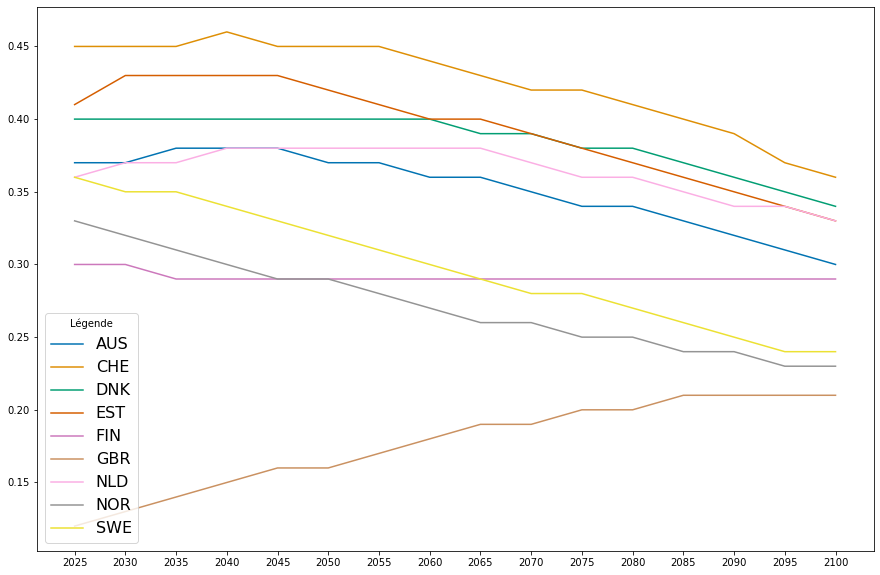

In [188]:
plt.figure(figsize=(15,10))
sns.lineplot(data=tabPrjSec, palette='colorblind', dashes=['','','','','','','','',''])
plt.legend(loc='best', fontsize=16, title='Légende')

##### Post Secondary (Post-Bac) : PRJ.ATT.ALL.4.MF

In [189]:
tabPrjTer = tabBasePrj.copy()
df_tmp = data[data['Indicator Code'] == 'PRJ.ATT.ALL.4.MF'].reset_index(drop=True) 
for yrs in yearPrj:
    nomCol = yrs
    df_tmp[nomCol] = df_tmp[yrs]
    tabPrjTer = tabPrjTer.merge(df_tmp[['Country Code', nomCol]], on="Country Code", how='left')
tabPrjTer

,Country Code,Short Name,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,AUS,Australia,0.30,0.32,0.34,0.36,0.38,0.39,0.41,0.43,0.45,0.46,0.48,0.50,0.51,0.53,0.54,0.55
1,CHE,Switzerland,0.22,0.23,0.25,0.26,0.28,0.29,0.31,0.33,0.34,0.36,0.38,0.40,0.41,0.43,0.45,0.47
2,DNK,Denmark,0.22,0.23,0.25,0.26,0.27,0.29,0.30,0.32,0.33,0.35,0.36,0.38,0.40,0.41,0.43,0.44
3,EST,Estonia,0.31,0.32,0.34,0.35,0.36,0.37,0.39,0.40,0.41,0.43,0.44,0.45,0.46,0.47,0.48,0.50
4,FIN,Finland,0.35,0.36,0.37,0.38,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.48
5,GBR,United Kingdom,0.25,0.27,0.29,0.31,0.33,0.35,0.37,0.38,0.40,0.42,0.44,0.46,0.47,0.49,0.51,0.52
6,NLD,Netherlands,0.25,0.27,0.28,0.29,0.31,0.33,0.35,0.36,0.38,0.40,0.42,0.43,0.45,0.47,0.48,0.50
7,NOR,Norway,0.30,0.32,0.34,0.36,0.38,0.40,0.42,0.44,0.46,0.47,0.49,0.50,0.52,0.53,0.54,0.56
8,SWE,Sweden,0.32,0.34,0.36,0.38,0.40,0.42,0.44,0.46,0.47,0.49,0.51,0.52,0.54,0.55,0.56,0.57


In [190]:
tabPrjTer.set_index('Country Code')

,Short Name,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Country Code,,,,,,,,,,,,,,,,,
AUS,Australia,0.30,0.32,0.34,0.36,0.38,0.39,0.41,0.43,0.45,0.46,0.48,0.50,0.51,0.53,0.54,0.55
CHE,Switzerland,0.22,0.23,0.25,0.26,0.28,0.29,0.31,0.33,0.34,0.36,0.38,0.40,0.41,0.43,0.45,0.47
DNK,Denmark,0.22,0.23,0.25,0.26,0.27,0.29,0.30,0.32,0.33,0.35,0.36,0.38,0.40,0.41,0.43,0.44
EST,Estonia,0.31,0.32,0.34,0.35,0.36,0.37,0.39,0.40,0.41,0.43,0.44,0.45,0.46,0.47,0.48,0.50
FIN,Finland,0.35,0.36,0.37,0.38,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.48
GBR,United Kingdom,0.25,0.27,0.29,0.31,0.33,0.35,0.37,0.38,0.40,0.42,0.44,0.46,0.47,0.49,0.51,0.52
NLD,Netherlands,0.25,0.27,0.28,0.29,0.31,0.33,0.35,0.36,0.38,0.40,0.42,0.43,0.45,0.47,0.48,0.50
NOR,Norway,0.30,0.32,0.34,0.36,0.38,0.40,0.42,0.44,0.46,0.47,0.49,0.50,0.52,0.53,0.54,0.56
SWE,Sweden,0.32,0.34,0.36,0.38,0.40,0.42,0.44,0.46,0.47,0.49,0.51,0.52,0.54,0.55,0.56,0.57


In [191]:
tabPrjTer=tabPrjTer.drop(columns=["Short Name"])

In [192]:
tabPrjTer=tabPrjTer.rename(columns={'Country Code':'Years'})

In [193]:
tabPrjTer=tabPrjTer.set_index('Years')

In [194]:
tabPrjTer=tabPrjTer.T

In [195]:
tabPrjTer

Years,AUS,CHE,DNK,EST,FIN,GBR,NLD,NOR,SWE
2025,0.30,0.22,0.22,0.31,0.35,0.25,0.25,0.30,0.32
2030,0.32,0.23,0.23,0.32,0.36,0.27,0.27,0.32,0.34
2035,0.34,0.25,0.25,0.34,0.37,0.29,0.28,0.34,0.36
2040,0.36,0.26,0.26,0.35,0.38,0.31,0.29,0.36,0.38
2045,0.38,0.28,0.27,0.36,0.38,0.33,0.31,0.38,0.40
2050,0.39,0.29,0.29,0.37,0.39,0.35,0.33,0.40,0.42
2055,0.41,0.31,0.30,0.39,0.40,0.37,0.35,0.42,0.44
2060,0.43,0.33,0.32,0.40,0.41,0.38,0.36,0.44,0.46
2065,0.45,0.34,0.33,0.41,0.42,0.40,0.38,0.46,0.47
2070,0.46,0.36,0.35,0.43,0.43,0.42,0.40,0.47,0.49


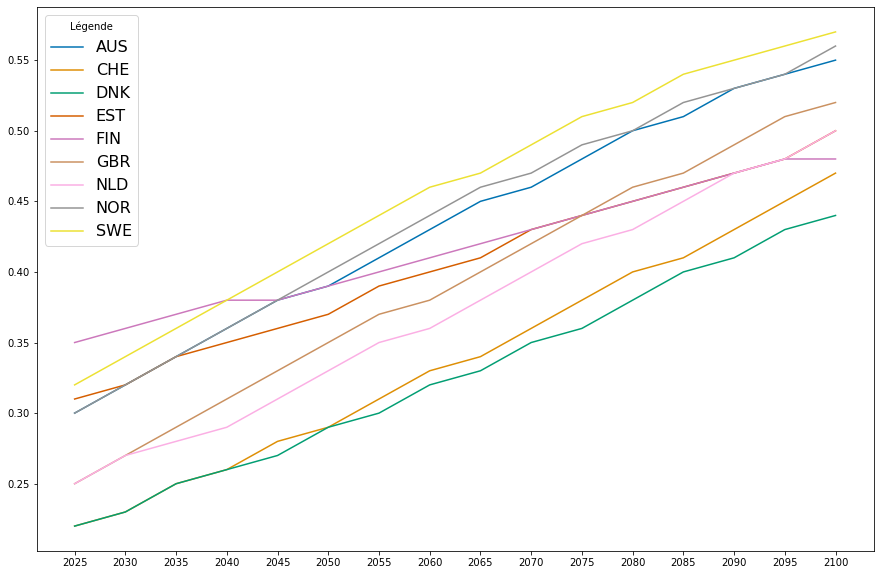

In [196]:
plt.figure(figsize=(15,10))
sns.lineplot(data=tabPrjTer, palette='colorblind', dashes=['','','','','','','','',''])
plt.legend(loc='best',fontsize=16, title='Légende')